# Social Network Analysis - Amber Heard Case - YouTube

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>YouTube - Social Network Analysis on Amber Heard's Case 

In [1]:
import pandas as pd
import os
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import pickle
import re
import warnings
import datetime
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")
%matplotlib inline

import plotly.io as pio
pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550


import helpers

# To Apply helpers updates without resarting the kernel
import importlib
importlib.reload(helpers)

# # To keep track of any module updates
# %load_ext autoreload
# %autoreload2

%config InlineBackend.figure_format = 'retina'

https://stackoverflow.com/questions/24719368/syntaxerror-non-default-argument-follows-default-argument/39942121

In [2]:
cd ../Filtered Data/comments_cleaned

/Users/mnagy99/jupyter/AH/YouTube_Bot_Analysis/Filtered Data/comments_cleaned


|          Column          |                          Definition                          |
| :----------------------- | :----------------------------------------------------------- |
| etag                     | Record (entity tag); **Unique for each record**                 |
| tl_etag                  | Top Level Comment eTag                                       |
| tl_id                    | Top Level Comment ID                                         |
| tl_video_id              | Top Level Comment Video ID                                   |
| tl_text                  | Top Level Comment Text                                       |
| tl_author_display_name   | Top Level Comment Display name **Not Unique**                |
| tl_author_channed_id     | Top Level Comment Channel ID   **Unique for each Author**    |
| tl_n_likes               | Top Level Comment Number of Likes                            |
| tl_comment_puplish_dtime | Top Level Comment Number Publish Date Time                   |
| tl_comment_update_time   | Top Level Comment Number Update Date Time                    |
| n_replies                | Number of Replies of each record                             |
| replies.comments         | UNDER INVESTIGATIONS                                         |
| tl_moderation_status     | Top Level Comment Moderation Status (Classified Spam or Not) |

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [3]:
df_comments = pd.read_csv("comments_cleaned_zipped.csv", compression='zip',
                          low_memory=False, lineterminator='\n')

df_comments["p_dtime"] = pd.to_datetime(df_comments["p_dtime"])
df_comments["date"] = pd.to_datetime(df_comments["date"])
df_comments["u_dtime"] = pd.to_datetime(df_comments["u_dtime"])

print(df_comments.shape)
df_comments.head()

(2176543, 20)


video_id                 comment_etag            comment_id  \
0  DiXRVYRZchs  mvtTos5huTqXhtAs-JPzt7mls_A  UgjyORuX3p35VXgCoAEC   
1  VPUUrdgxIa8  XpsHQJXeW3QznSOnkHg2LFrp-dU  UggV-BvKpFaaaHgCoAEC   
2  VPUUrdgxIa8  VRefhV-4H8413hvRHP5-zKWyNuQ  Ugio47Mc-eG0dHgCoAEC   
3  VPUUrdgxIa8  auBUVEx3Zm2I35CN0iASII7-3V4  Ugj0tLP9hfrMkXgCoAEC   
4  VPUUrdgxIa8  6NhfYEJJ6zK5ieP-jD9dB25SC-k  Ughdfu9Z390BW3gCoAEC   

                                                text  \
0                                         good work!   
1                     fake lesbian career boost fail   
2  so during movie shoots some actresses use dild...   
3  god liam hemsworth looks insanely a lot like h...   
4                        i'd watch her day and night   

                                           username              author_ch_id  \
0                                     Shocka Delica  UC6cJzw3ChENHVREKzpx1e3Q   
1                                      Vincent Lyle  UCSKuFV9GWVXgh3dtdKCxZoQ   
2  Soluchi {Michael Jackson Lookalike, Dancer, VFX}  UCQb__wEpi5q8_xhkuk2jm5g   
3                                     Chris Andreev  UCseIHRwQ0oAAXK2-e8E2_FA   
4                                Dzimka Bujiashvili  UCzPTU13Mb7dO1jgIbHp2ABw   

   nlikes                   p_dtime                   u_dtime  nreplies  \
0     9.0 2013-11-29 05:18:47+00:00 2013-11-29 05:18:47+00:00       1.0   
1     2.0 2013-12-27 21:05:54+00:00 2013-12-27 21:05:54+00:00       0.0   
2  2093.0 2013-12-26 01:24:40+00:00 2013-12-26 01:24:40+00:00       7.0   
3     0.0 2013-12-07 21:22:41+00:00 2013-12-07 21:22:41+00:00       3.0   
4     7.0 2013-12-04 23:01:35+00:00 2013-12-04 23:01:35+00:00       0.0   

  moderation_status comment_reply parent_id author_ch_url  \
0               NaN       comment      none          none   
1               NaN       comment      none          none   
2               NaN       comment      none          none   
3               NaN       comment      none          none   
4               NaN       comment      none          none   

  author_profile_image  year       date month  dayofmonth  hour  
0                 none  2013 2013-11-29   Nov          29     5  
1                 none  2013 2013-12-27   Dec          27    21  
2                 none  2013 2013-12-26   Dec          26     1  
3                 none  2013 2013-12-07   Dec           7    21  
4                 none  2013 2013-12-04   Dec           4    23

In [4]:
df_comments.p_dtime.dt.date.min(), df_comments.p_dtime.dt.date.max()

(datetime.date(2008, 3, 26), datetime.date(2021, 12, 8))

In [5]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176543 entries, 0 to 2176542
Data columns (total 20 columns):
 #   Column                Dtype              
---  ------                -----              
 0   video_id              object             
 1   comment_etag          object             
 2   comment_id            object             
 3   text                  object             
 4   username              object             
 5   author_ch_id          object             
 6   nlikes                float64            
 7   p_dtime               datetime64[ns, UTC]
 8   u_dtime               datetime64[ns, UTC]
 9   nreplies              float64            
 10  moderation_status     object             
 11  comment_reply         object             
 12  parent_id             object             
 13  author_ch_url         object             
 14  author_profile_image  object             
 15  year                  int64              
 16  date                  datetime64[ns]

In [6]:
helpers.isnull(df_comments)

The number of NaNs in video_id: 0
The number of NaNs in comment_etag: 0
The number of NaNs in comment_id: 0
The number of NaNs in text: 532
The number of NaNs in username: 49
The number of NaNs in author_ch_id: 23
The number of NaNs in nlikes: 0
The number of NaNs in p_dtime: 0
The number of NaNs in u_dtime: 0
The number of NaNs in nreplies: 0
The number of NaNs in moderation_status: 2174298
The number of NaNs in comment_reply: 0
The number of NaNs in parent_id: 0
The number of NaNs in author_ch_url: 0
The number of NaNs in author_profile_image: 0
The number of NaNs in year: 0
The number of NaNs in date: 0
The number of NaNs in month: 0
The number of NaNs in dayofmonth: 0
The number of NaNs in hour: 0


In [7]:
df_comments.dropna(subset=['text'], inplace=True)

In [8]:
sum(df_comments.p_dtime != df_comments.u_dtime)

133253

In [9]:
for col in ['year', 'username', 'moderation_status', 'comment_reply']:
    print('The value counts of ' + col)
    print(df_comments[col].value_counts().head())
    print('\n')

The value counts of year
2020    893138
2021    792578
2018    192108
2019    118408
2016     54618
Name: year, dtype: int64


The value counts of username
Johnny Depp       15986
eHacker            8343
JOHNNY DEPP        3921
Stevie J Raw       3516
LaraCroftEyes1     3270
Name: username, dtype: int64


The value counts of moderation_status
likelySpam    2240
Name: moderation_status, dtype: int64


The value counts of comment_reply
comment    1692570
reply       483441
Name: comment_reply, dtype: int64




<br>

In [10]:
df_creations = pd.read_csv('daily_creations.csv')
df_creations.date = pd.to_datetime(df_creations.date)
print(df_creations.shape)
df_creations.head()

(76597, 8)


date  year month  dayofmonth  hour  ncomments  nreplies  nlikes
0 2018-07-21  2018   Jul          21    20       6998      2994   38909
1 2018-07-21  2018   Jul          21    19       4877      2181   30351
2 2020-10-24  2020   Oct          24     8       4404      1121   24569
3 2018-07-21  2018   Jul          21    21       3153      1087   16811
4 2018-11-19  2018   Nov          19    17       2673      1775   21042

<br>

In [11]:
# Create an empty set of negatively commenting users
neg_users = set()

In [12]:
# To Load the set of negativly commented users
with open('negative_users.pkl', 'rb') as f:
    neg_users = pickle.load(f)

In [13]:
# Those users were checked and did not find negative comments
checked_set = {'eHacker', 'Stevie J Raw', 'DarthN3ws', "Nerdette's NewsStand", 'Sunshine', 'Binge Central',
               'Abbey Sharp', 'ko 3', 'Mary Shephard', 'Madison Beer', 'Baby Bunny', 'LadyDominion',
               'Tom Harlock', 'Gus Johnson', 'Mr. Bruhhh', 'Crypto Info 2', 'demi demi', '8-Bit Tex', 'Ty Y', 
               'Incredibly Average', 'DELCARAJO TV', 'Flashback FM','Funeral bug', 'Stranger In the Alps', 
               "Nerdette's NewsStand"}

In [14]:
neg_users = neg_users - checked_set

In [15]:
len(neg_users)

228339

<br>

<a id='over_time'></a>
> ## Exploring Comments Created OVER TIME
> <ul>
 <li><a href="#over_time"><b>Comments Created OVER TIME</b></a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

<a id='all_years'></a>
>>### Comments Created in Each Year
> <ul>
 <li><a href="#all_years"><b>Comments Created in Each Year</b></a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>    
 </ul>

YouTube was officially launched on December 15, 2005

In [16]:
df_creations.date.min(), df_creations.date.max()

(Timestamp('2008-03-26 00:00:00'), Timestamp('2021-12-08 00:00:00'))

In [17]:
df_years = df_creations.groupby('year')['ncomments'].sum().reset_index()

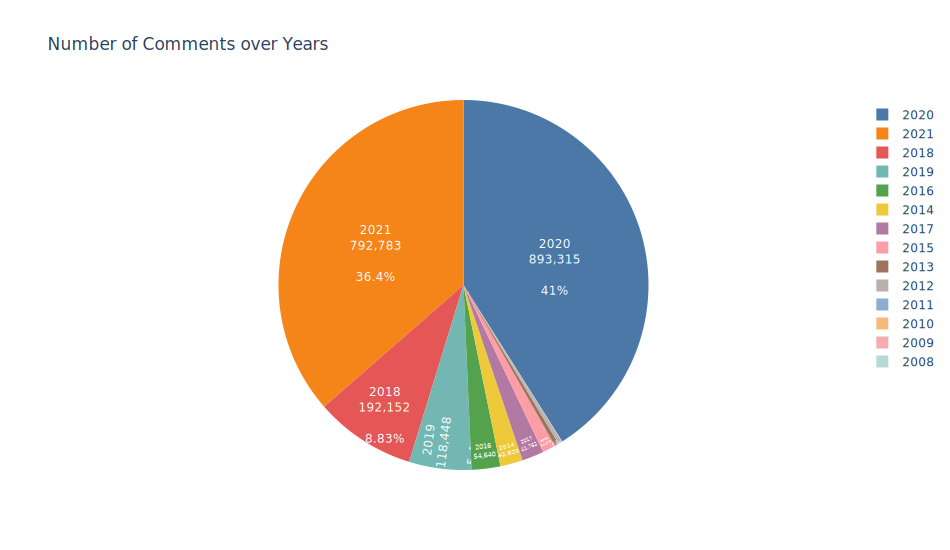

In [18]:
helpers.pie(df_years, "Number of Comments over Years")

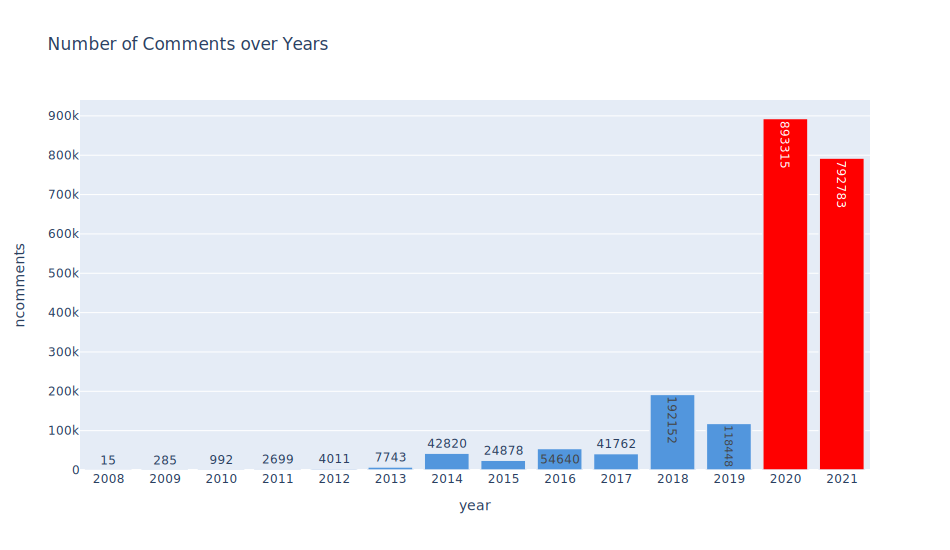


Note: Not All replies are included (only a sample of the replies)

Total Replies: 935770.0


In [19]:
helpers.bar(df_years, "year", "ncomments", "Number of Comments over Years", text=0, margin=250000)

print('\nNote: Not All replies are included (only a sample of the replies)\n')
print(f'Total Replies: {df_comments.nreplies.sum()}')

<a id='all_months'></a>
>>### Comments Created in Each Month
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months"><b>Comments Created in Each Month</b></a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

In [20]:
df_month = df_creations.groupby(['month', 'year'])['ncomments'].sum().reset_index()

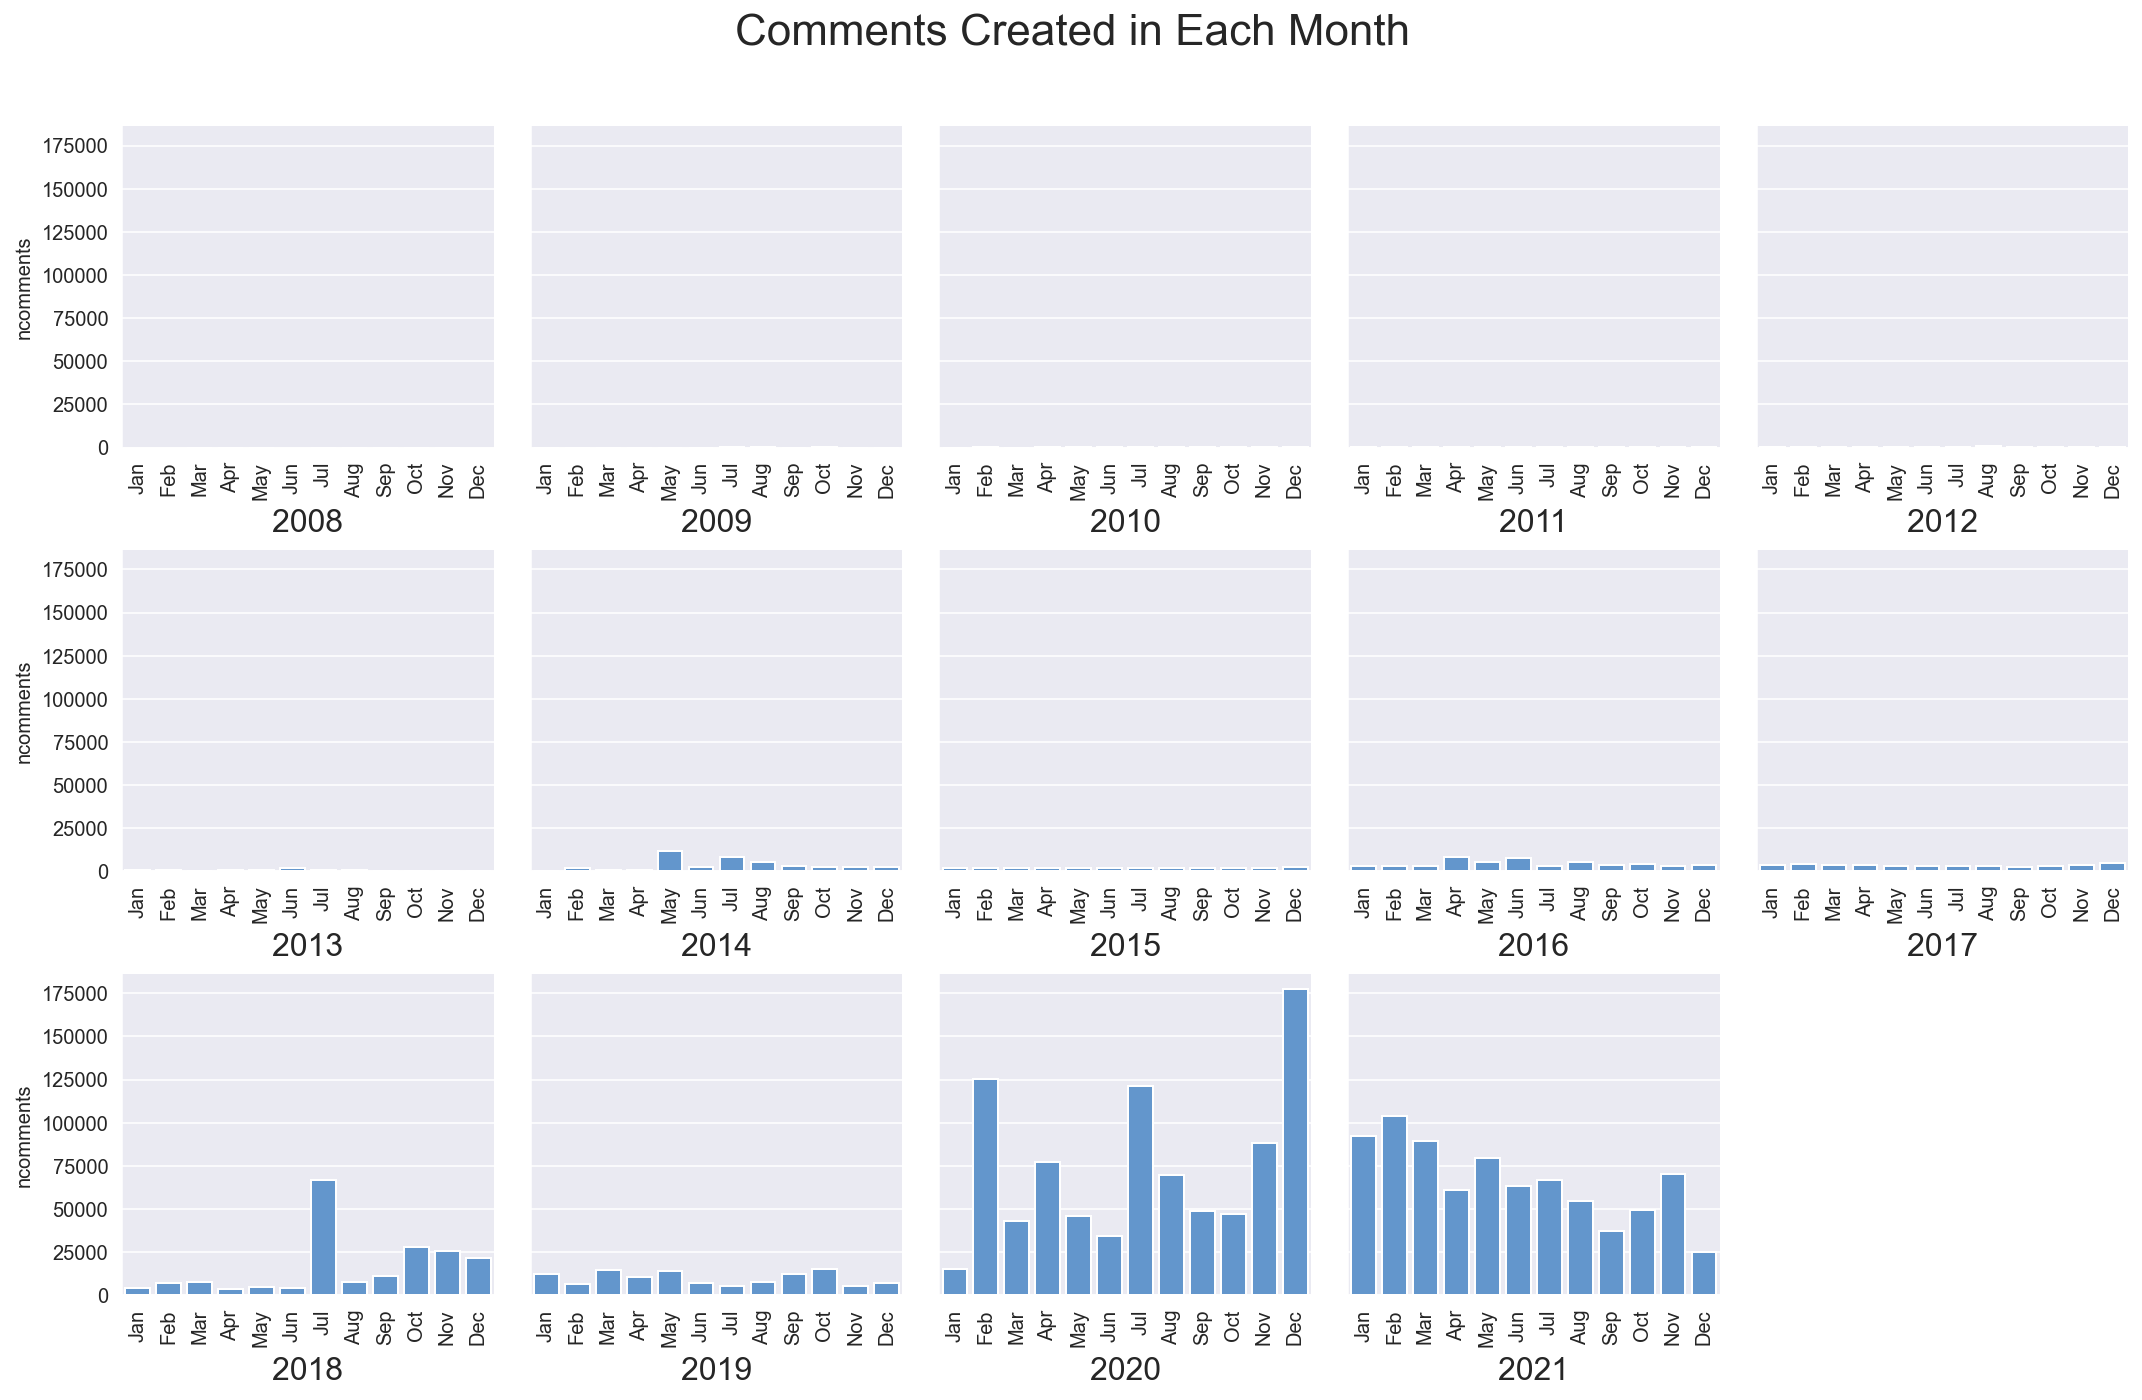

In [21]:
helpers.facet_day_month(df_month, "month", "ncomments", facet_on='year', n_col=5)

**NOTE:**
- 2018 Peaks --> Jul
- 2020 Peaks --> Feb, Jul, Dec
- 2021 Peaks --> Jan, Feb, Mar, Nov

<a id='all_days'></a>
>>### Comments Created in Each Day
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days"><b>Comments Created in Each Day</b></a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

In [22]:
df_daily = df_creations.groupby(['date', 'year', 'month', 'dayofmonth'])['ncomments'].sum().reset_index()
df_daily.head(1)

date  year month  dayofmonth  ncomments
0 2008-03-26  2008   Mar          26          1

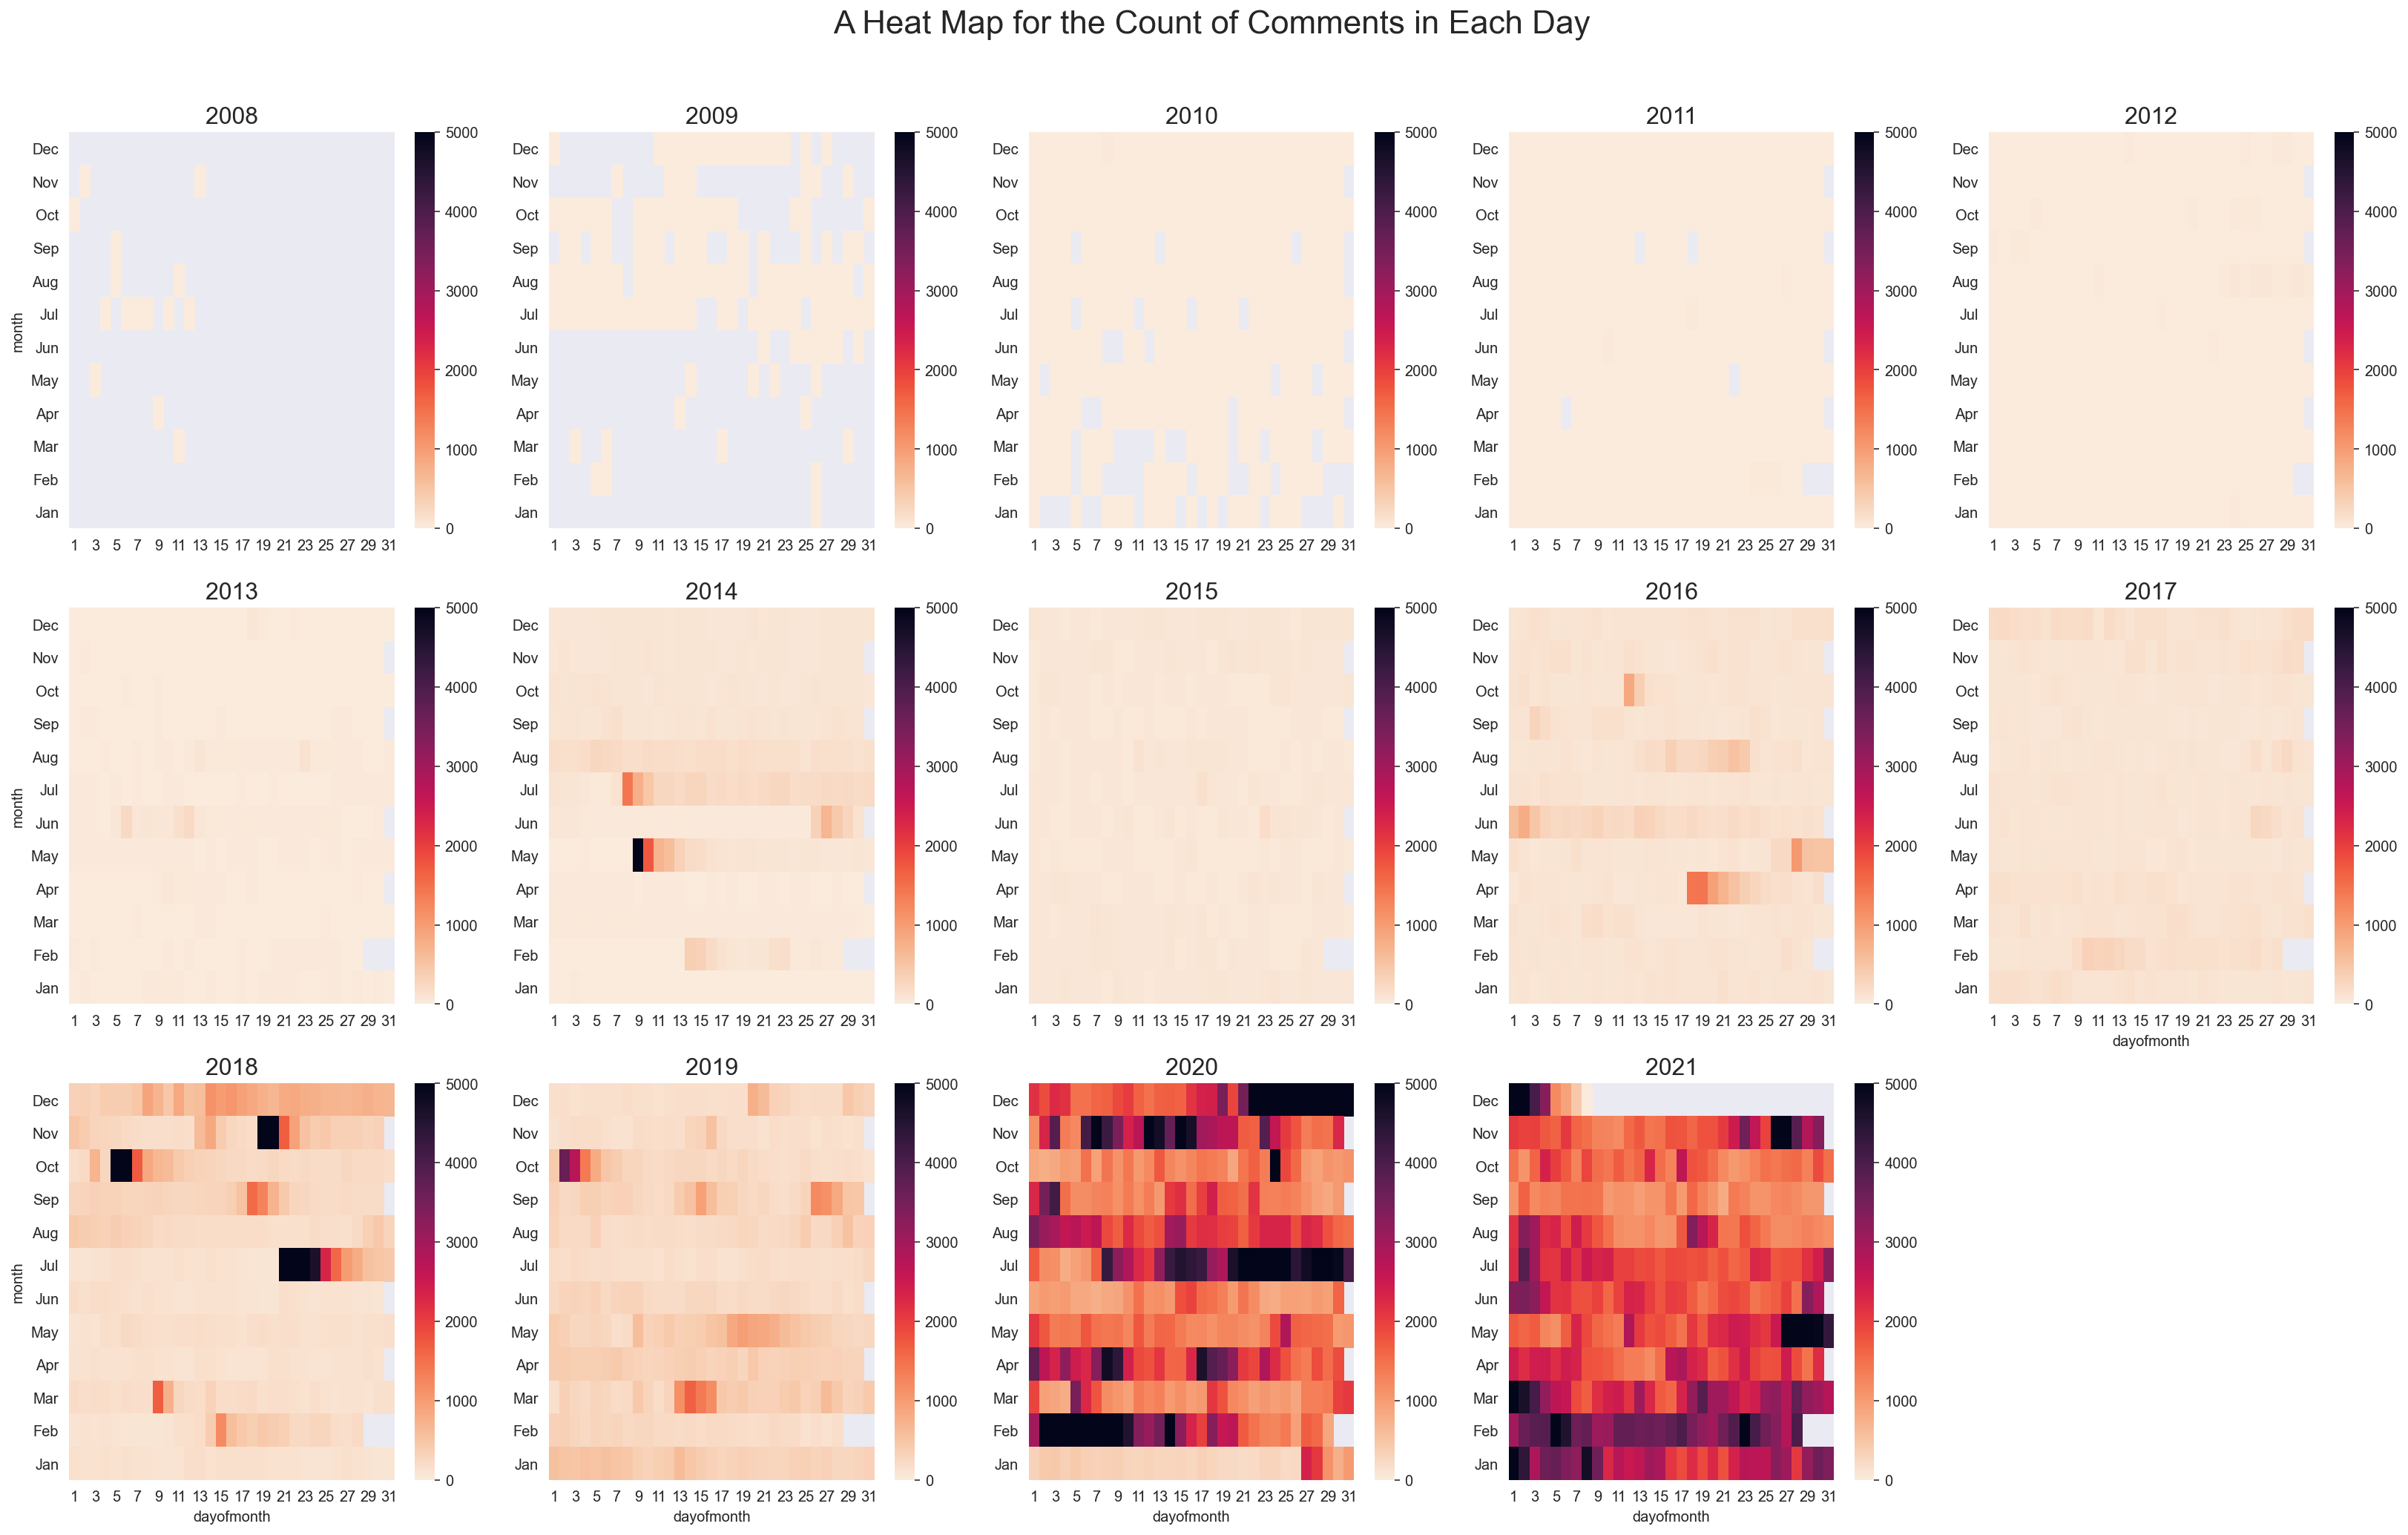

In [23]:
title = 'A Heat Map for the Count of Comments in Each Day'
helpers.facet_heat(df_daily, title, n_col=5, vmax=5000)

In [24]:
df_daily_18 = df_daily[df_daily["year"] == 2018]
df_daily_19 = df_daily[df_daily["year"] == 2019]
df_daily_20 = df_daily[df_daily["year"] == 2020]
df_daily_21 = df_daily[df_daily["year"] == 2021]

<a id='2018_days'></a>
>>### Comments Created in Each Day of 2018
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days"><b>Comments Created in Each Day of 2018</b></a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

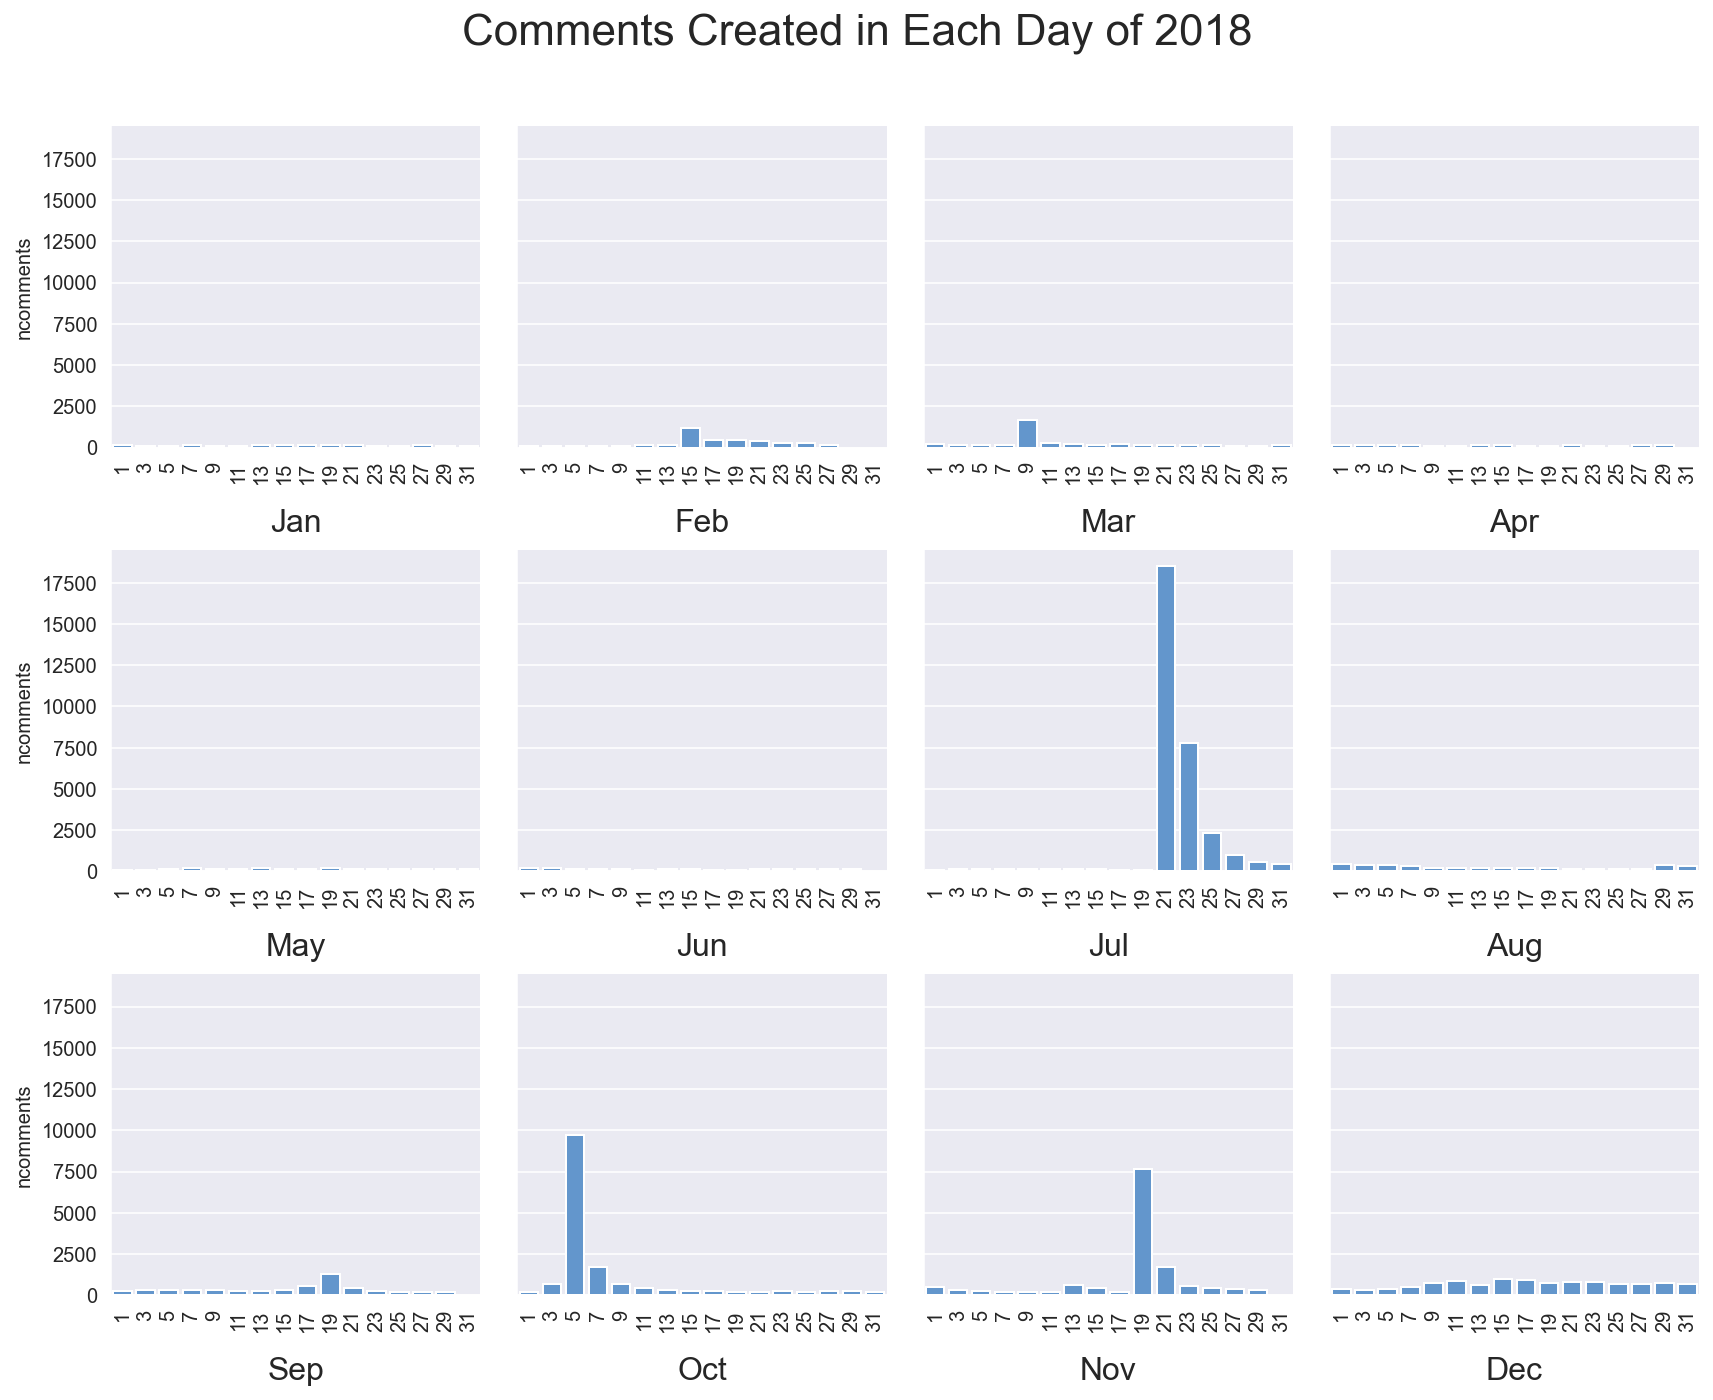

In [25]:
helpers.facet_day_month(df_daily_18, "dayofmonth", "ncomments", facet_on='month', n_col=4, year_str='2018')

<a id='2019_days'></a>
>>### Comments Created in Each Day of 2019
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days"><b>Comments Created in Each Day of 2019</b></a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

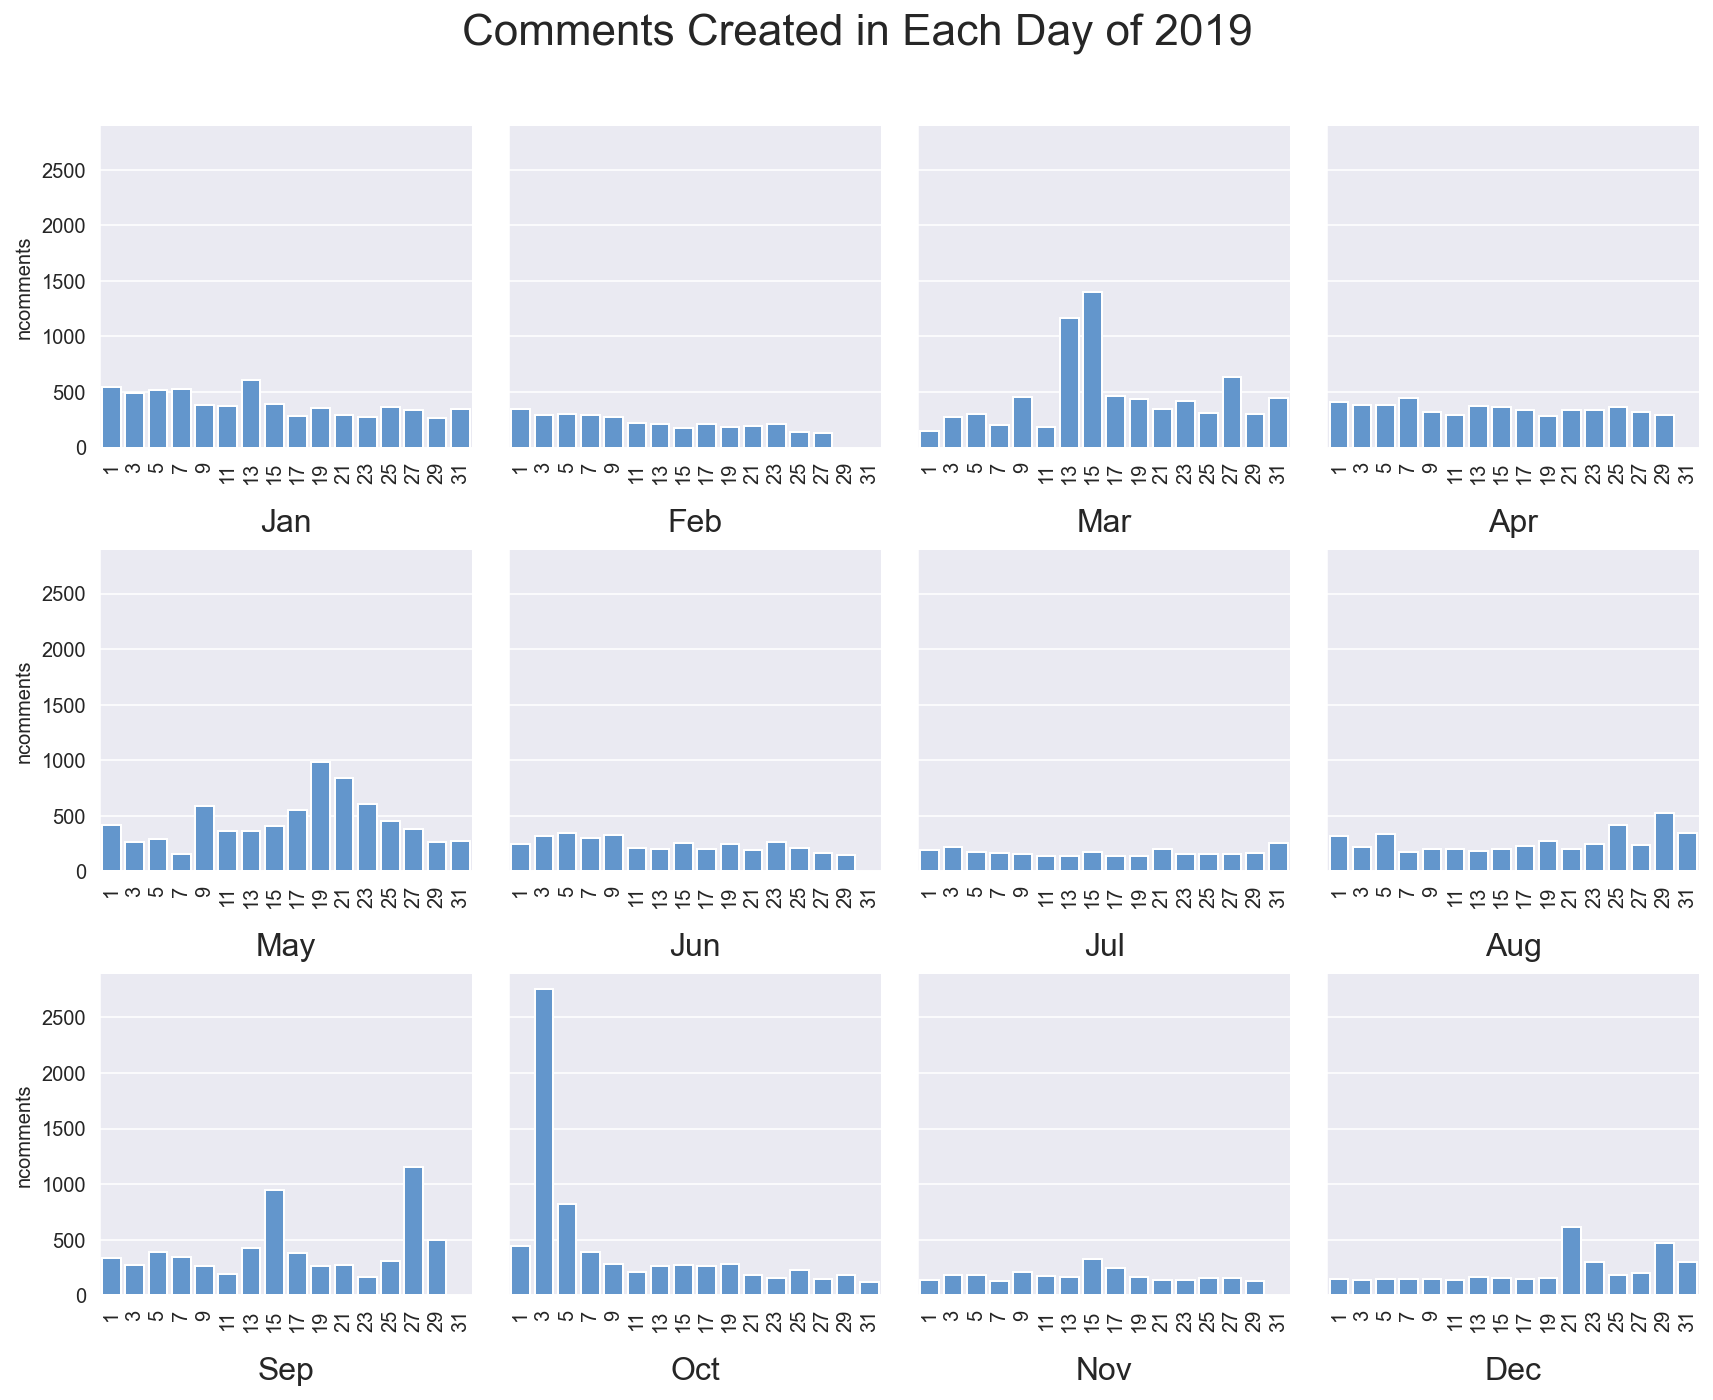

In [26]:
helpers.facet_day_month(df_daily_19, "dayofmonth", "ncomments", facet_on='month', n_col=4, year_str='2019')

<a id='2020_days'></a>
>>### Comments Created in Each Day of 2020
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days"><b>Comments Created in Each Day of 2020</b></a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

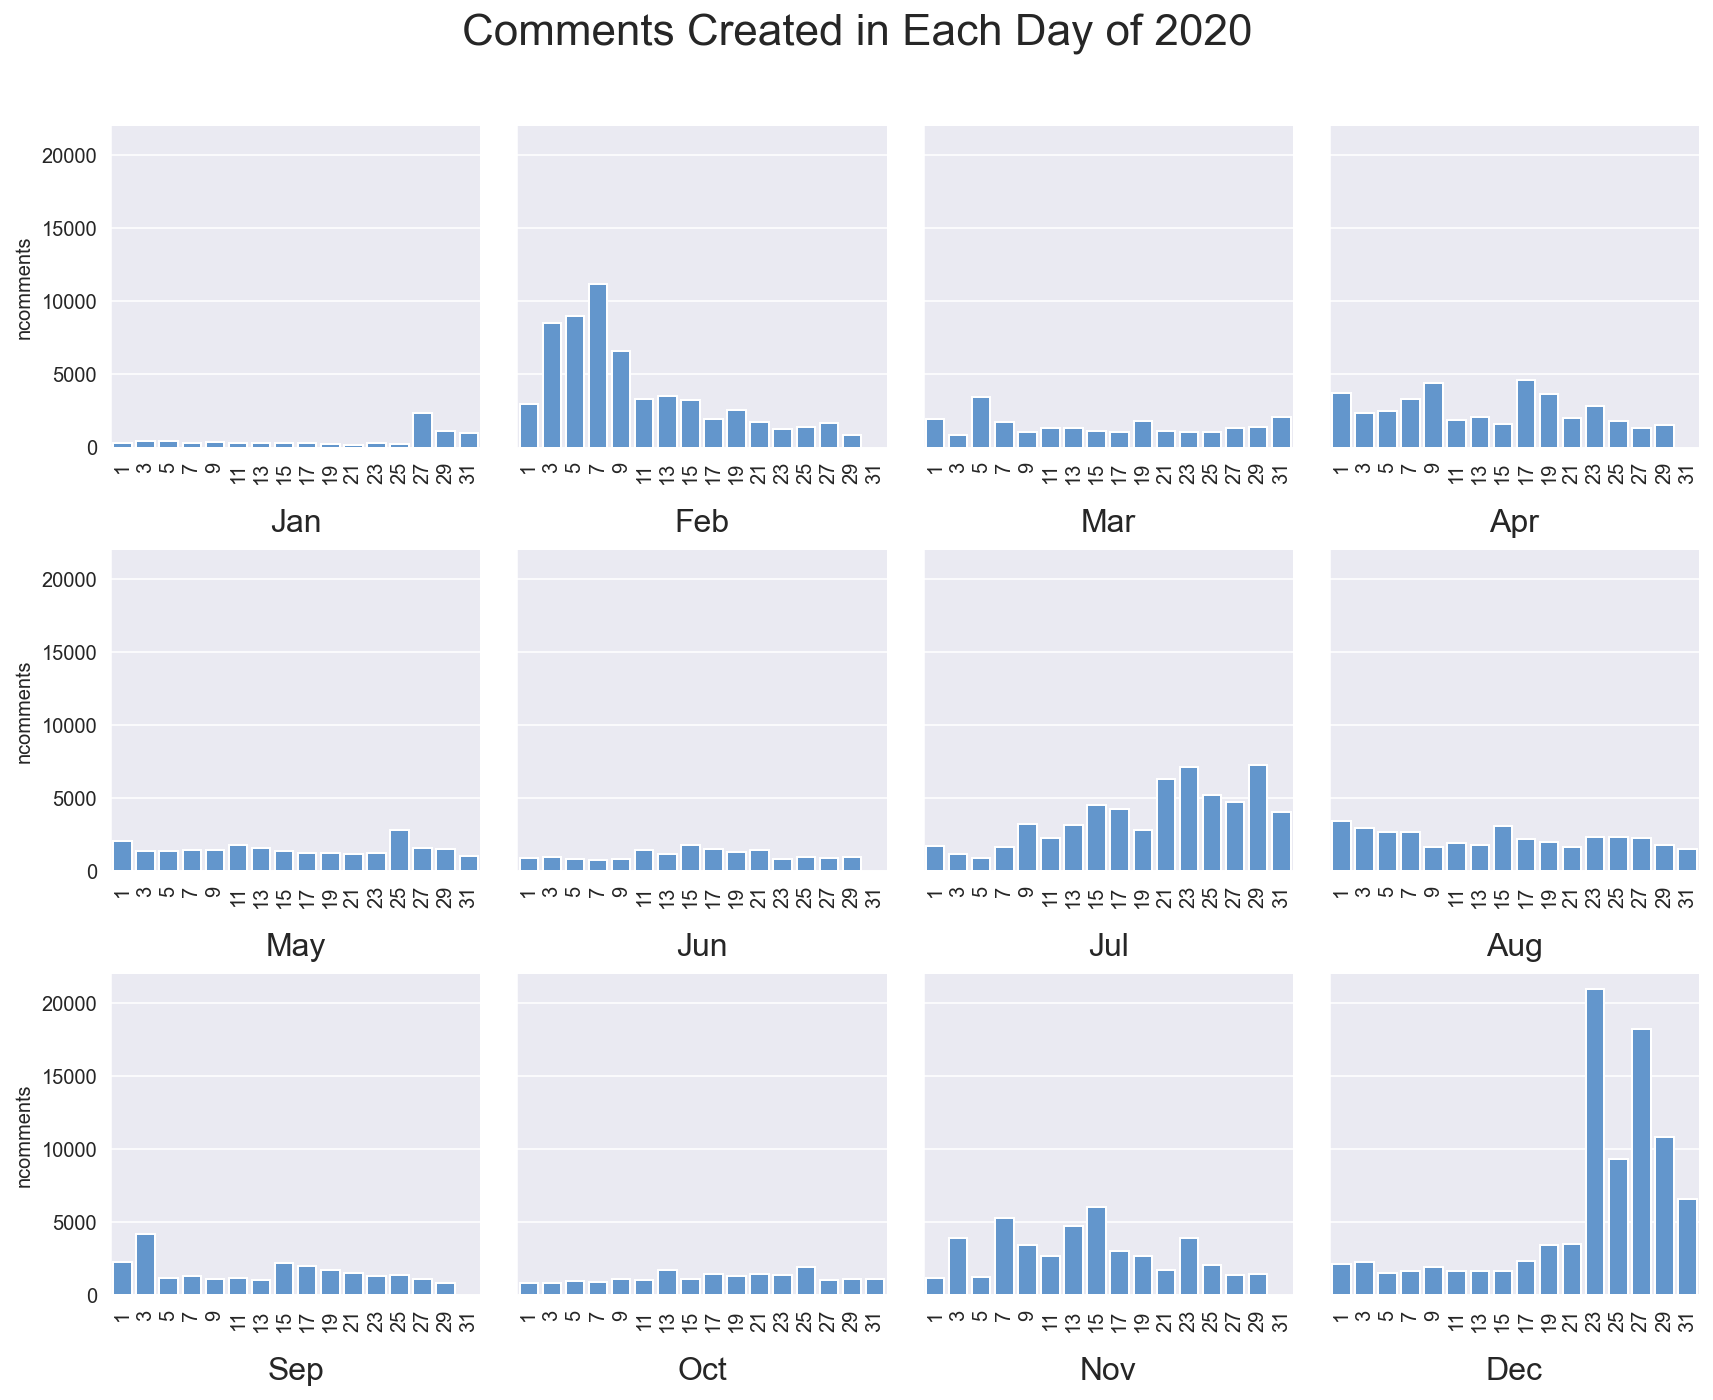

In [27]:
helpers.facet_day_month(df_daily_20, "dayofmonth", "ncomments", facet_on='month', n_col=4, year_str='2020')

<a id='2021_days'></a>
>>### Comments Created in Each Day of 2021
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days"><b>Comments Created in Each Day of 2021</b></a></li>
 </ul>


Note: December data is not complete



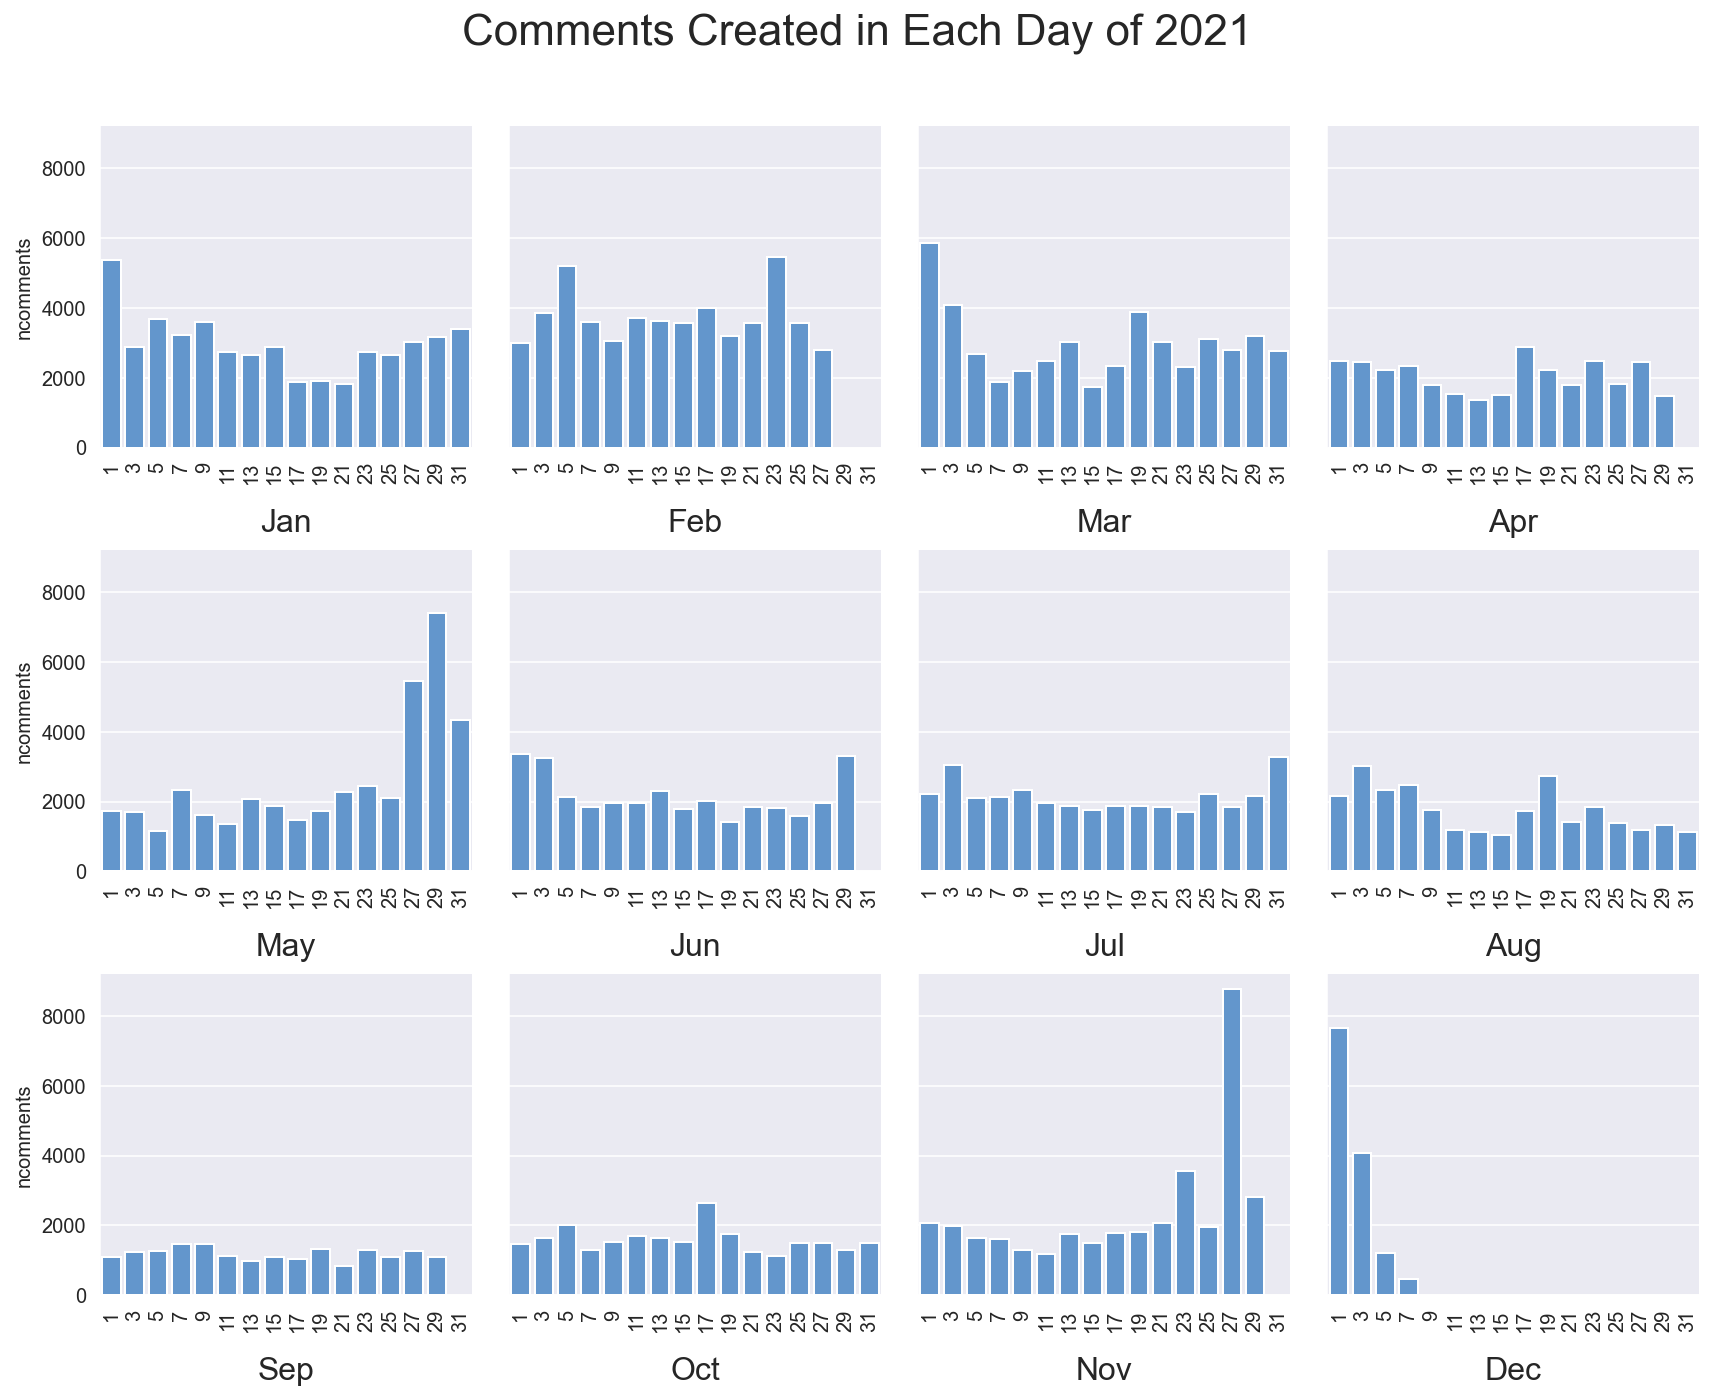

In [28]:
helpers.facet_day_month(df_daily_21, "dayofmonth", "ncomments", facet_on='month', n_col=4, year_str='2021')
print('\nNote: December data is not complete\n') 

<a id='peaks'></a>
>## Investigate Peaks
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks"><b>Peak Dates</b></a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

**NOTE:**
- 2018 Peaks --> Jul
- 2020 Peaks --> Feb, Jul, Dec
- 2021 Peaks --> Jan, Feb, Mar, Nov

In [29]:
df_peaks = df_daily.sort_values('ncomments', ascending=False)
df_peaks.head()

date  year month  dayofmonth  ncomments
3220 2018-07-22  2018   Jul          22      26021
4105 2020-12-23  2020   Dec          23      20907
3219 2018-07-21  2018   Jul          21      18536
4109 2020-12-27  2020   Dec          27      18206
4106 2020-12-24  2020   Dec          24      16771

In [30]:
# filter on dates with peaks
df_peaks = df_peaks[['date', 'ncomments']]
df_peaks_18 = df_peaks[df_peaks.date.dt.year == 2018]
df_peaks_19 = df_peaks[df_peaks.date.dt.year == 2019]
df_peaks_20 = df_peaks[df_peaks.date.dt.year == 2020]
df_peaks_21 = df_peaks[df_peaks.date.dt.year == 2021]

In [31]:
df_jul_18 = df_peaks[(df_peaks.date.dt.year == 2018) & (df_peaks.date.dt.month == 7)]
df_oct_19 = df_peaks[(df_peaks.date.dt.year == 2019) & (df_peaks.date.dt.month == 10)]
df_feb_20 = df_peaks[(df_peaks.date.dt.year == 2020) & (df_peaks.date.dt.month == 2)]
df_jul_20 = df_peaks[(df_peaks.date.dt.year == 2020) & (df_peaks.date.dt.month == 7)]
df_dec_20 = df_peaks[(df_peaks.date.dt.year == 2020) & (df_peaks.date.dt.month == 12)]
df_jan_21 = df_peaks[(df_peaks.date.dt.year == 2021) & (df_peaks.date.dt.month == 1)]
df_feb_21 = df_peaks[(df_peaks.date.dt.year == 2021) & (df_peaks.date.dt.month == 2)]
df_mar_21 = df_peaks[(df_peaks.date.dt.year == 2021) & (df_peaks.date.dt.month == 3)]
df_nov_21 = df_peaks[(df_peaks.date.dt.year == 2021) & (df_peaks.date.dt.month == 11)]

<a id='all'></a>
>>### Peaks in All Years
> <ul>
 <li><a href="#all"><b>All Years</b></a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

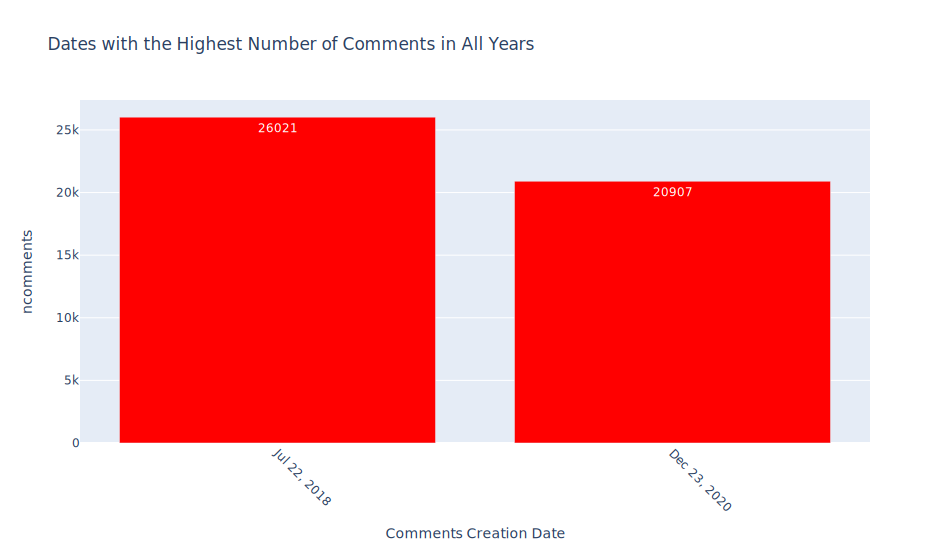

In [32]:
helpers.bar_peaks(df_peaks.head(2), "Dates with the Highest Number of Comments in All Years", threshold=0)

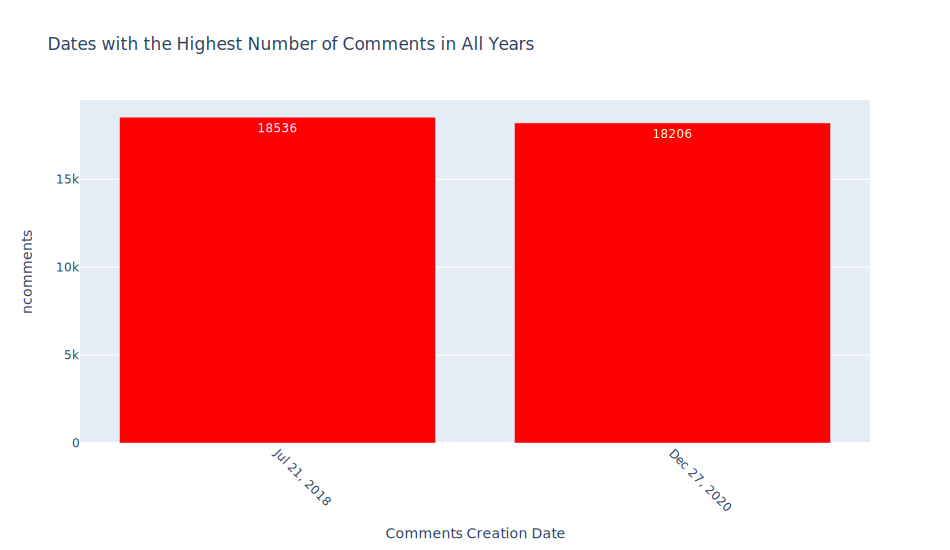

In [33]:
helpers.bar_peaks(df_peaks[2:].head(2), "Dates with the Highest Number of Comments in All Years")

<a id='2018'></a>
>>### 2018 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018"><b>2018</b></a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

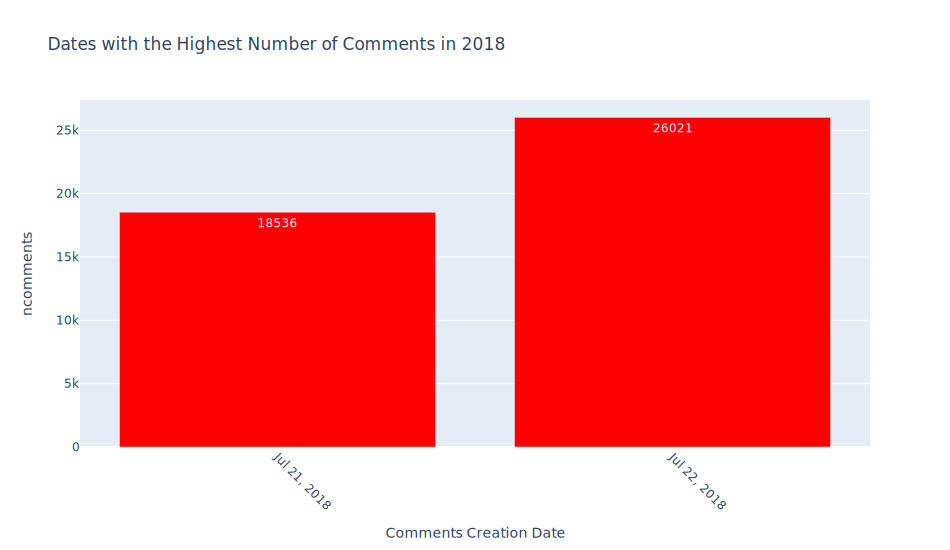

In [34]:
helpers.bar_peaks(df_peaks_18.head(2), "Dates with the Highest Number of Comments in 2018")

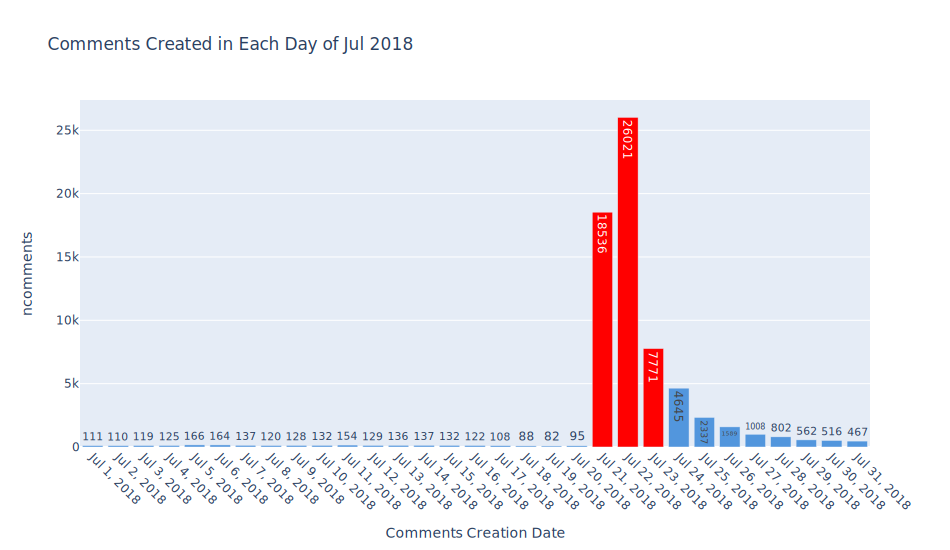

In [35]:
helpers.bar_peaks(df_jul_18, "Comments Created in Each Day of Jul 2018", 5000)

<a id='2019'></a>
>>### 2019 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019"><b>2019</b></a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

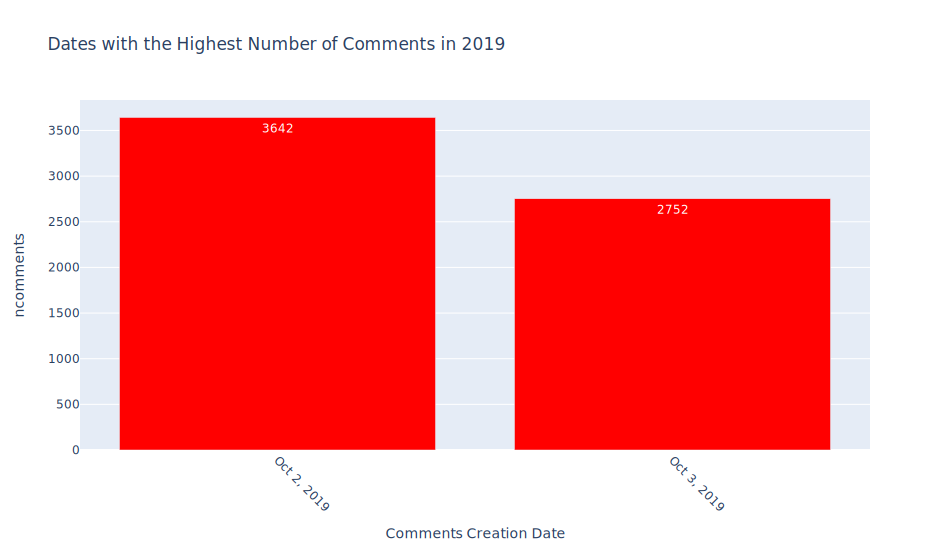

In [36]:
helpers.bar_peaks(df_peaks_19.head(2), "Dates with the Highest Number of Comments in 2019")

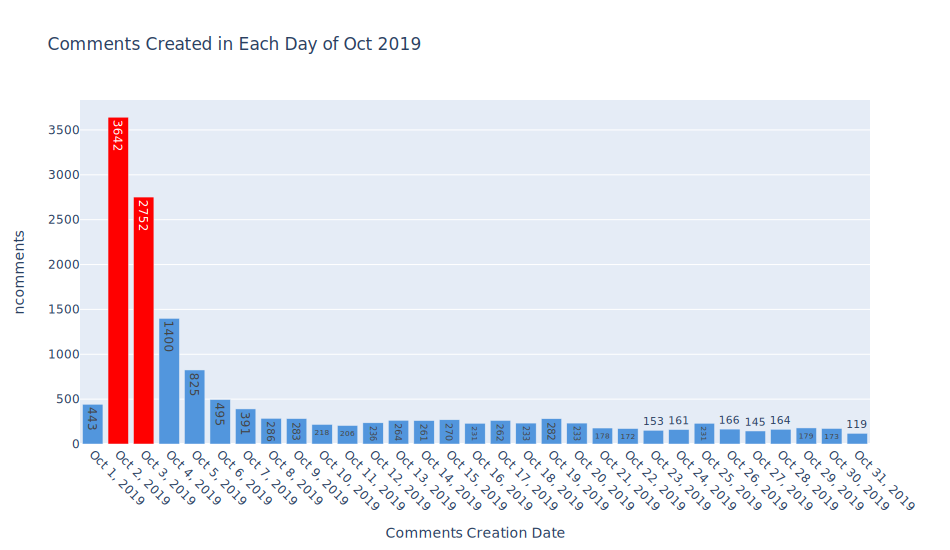

In [37]:
helpers.bar_peaks(df_oct_19, "Comments Created in Each Day of Oct 2019", 2500)

**NOTE:**
- 2019 Peaks --> 
  - Oct 2, 2019
  - Oct 3, 2019
  - Oct 4, 2019

<a id='2020'></a>
>>### 2020 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020"><b>2020</b></a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

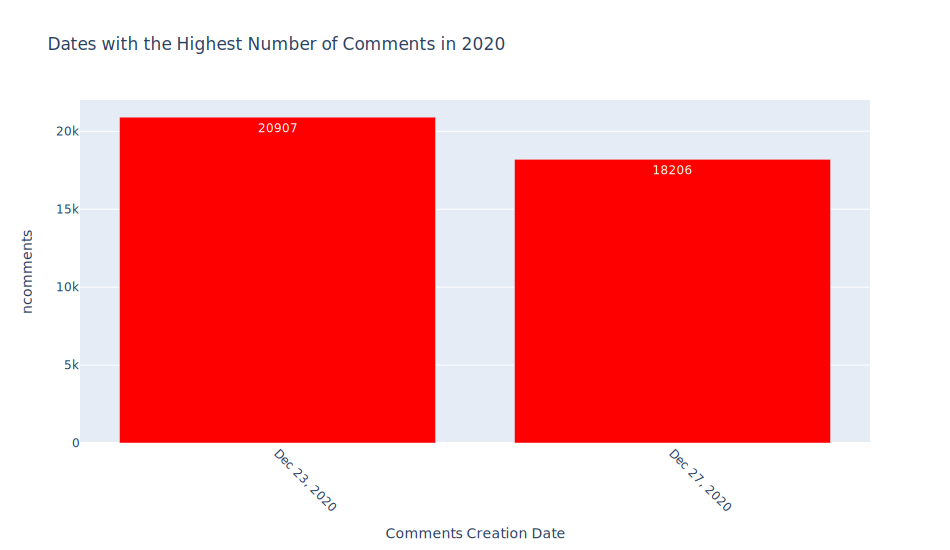

In [38]:
helpers.bar_peaks(df_peaks_20.head(2), "Dates with the Highest Number of Comments in 2020")

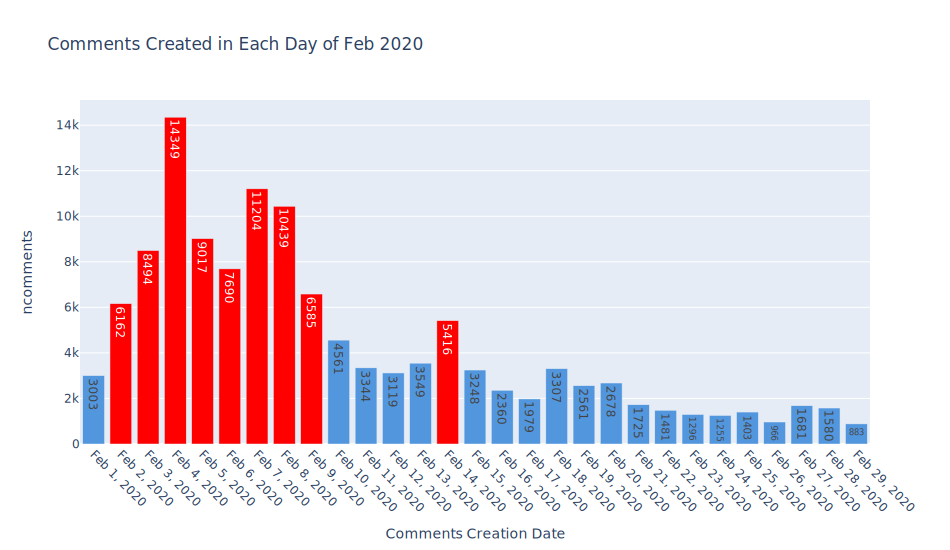

In [39]:
helpers.bar_peaks(df_feb_20, "Comments Created in Each Day of Feb 2020", 5000)

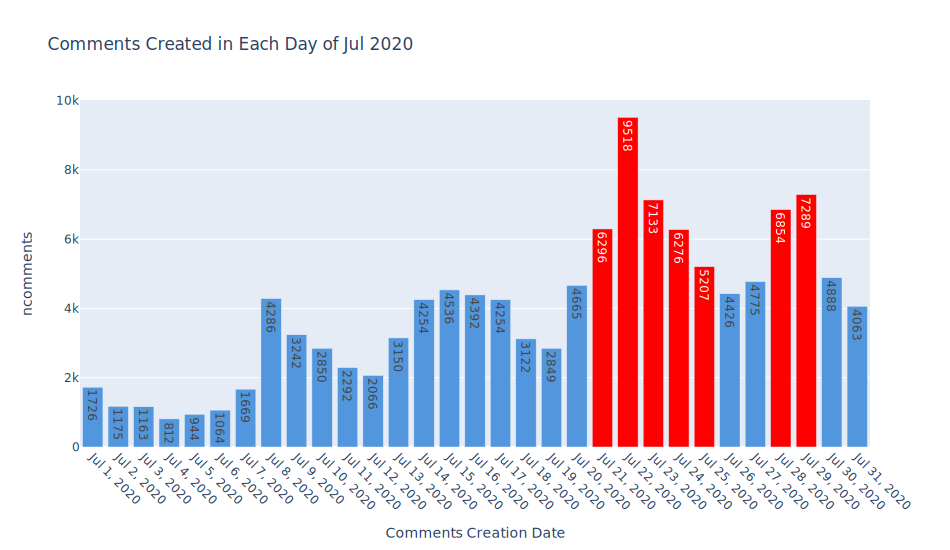

In [40]:
helpers.bar_peaks(df_jul_20, "Comments Created in Each Day of Jul 2020", 5000)

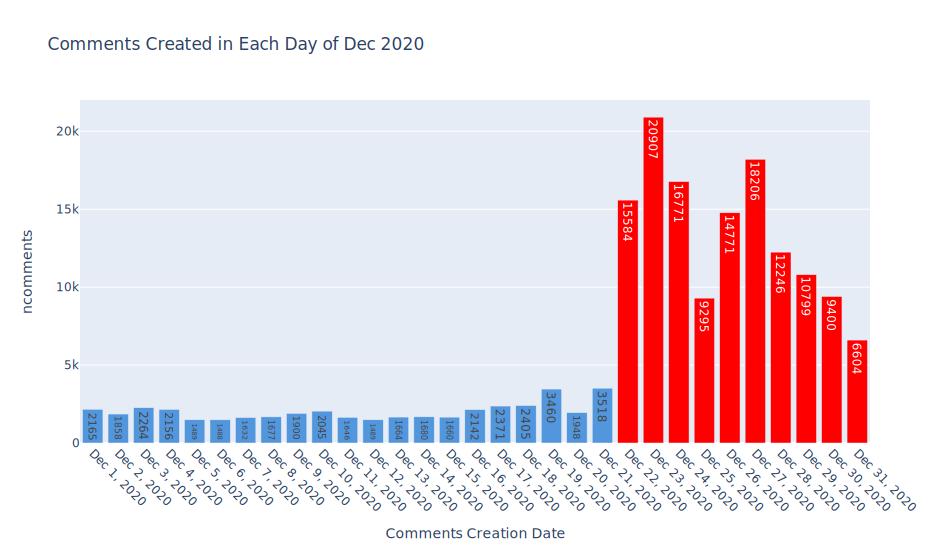

In [41]:
helpers.bar_peaks(df_dec_20, "Comments Created in Each Day of Dec 2020", 5000)

<a id='2021'></a>
>>### 2021 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021"><b>2021</b></a></li>
 </ul>

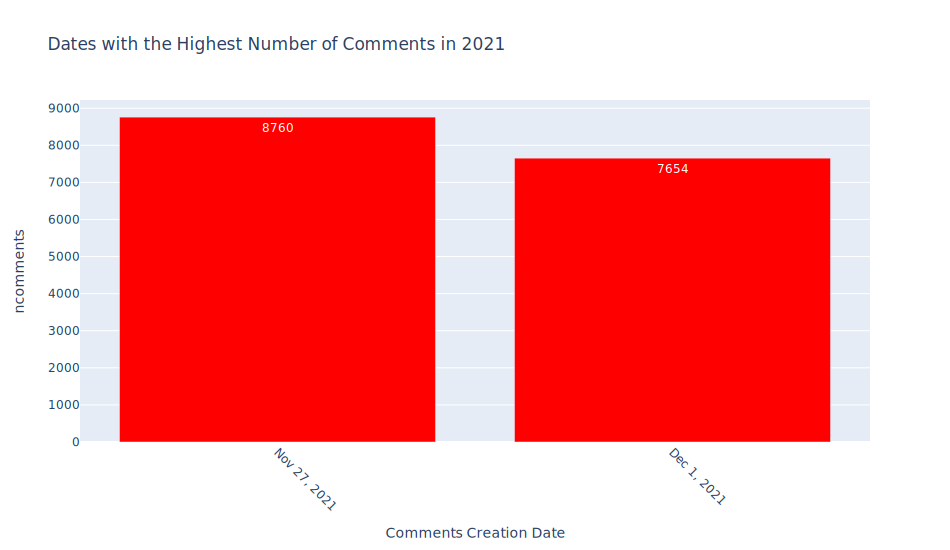

In [42]:
helpers.bar_peaks(df_peaks_21.head(2), "Dates with the Highest Number of Comments in 2021")

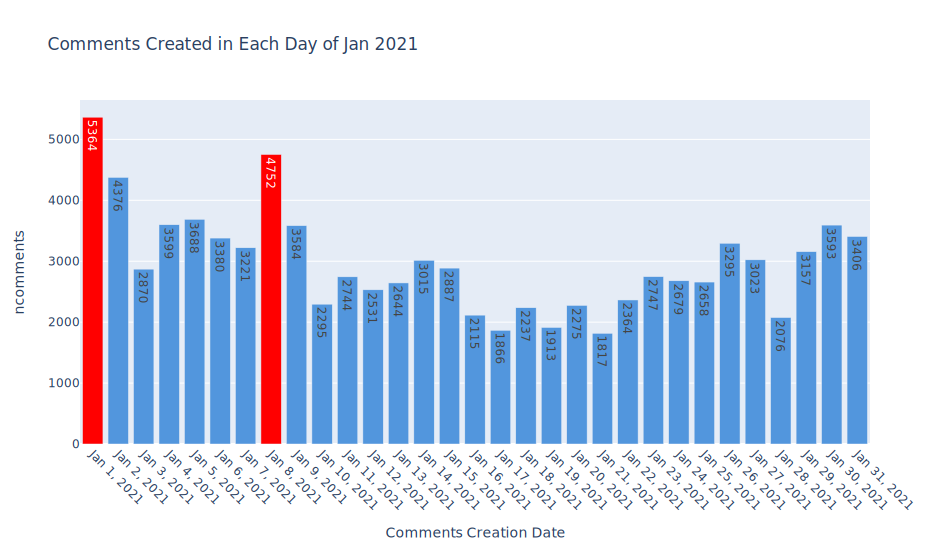

In [43]:
helpers.bar_peaks(df_jan_21, "Comments Created in Each Day of Jan 2021", 4500)

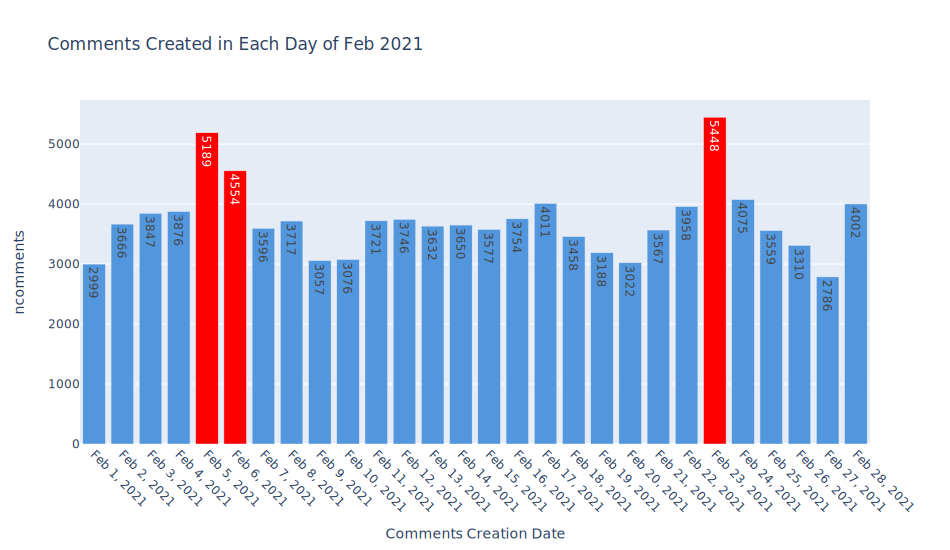

In [44]:
helpers.bar_peaks(df_feb_21, "Comments Created in Each Day of Feb 2021", 4500)

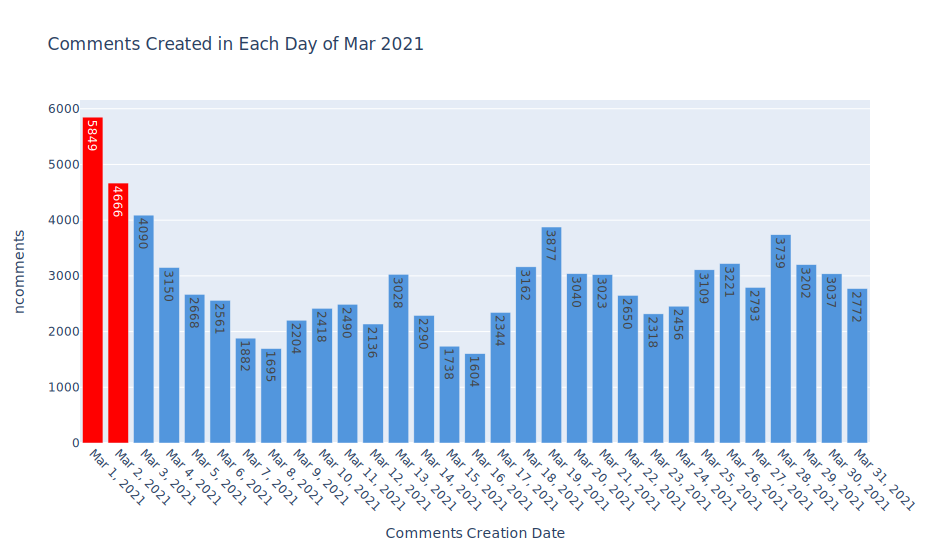

In [45]:
helpers.bar_peaks(df_mar_21, "Comments Created in Each Day of Mar 2021", 4500)

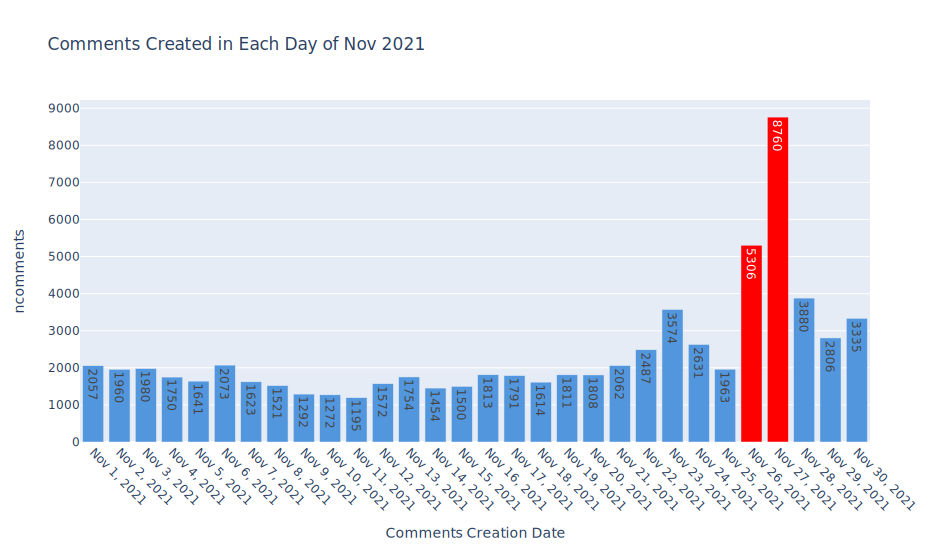

In [46]:
helpers.bar_peaks(df_nov_21, "Comments Created in Each Day of Nov 2021", 5000)

<br>

<a id='text_investigation'></a>
> ## Primary Text Investigation
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation"><b>Primary Text Investigation</b></a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In This Section: 
- We will investigate the text related to Amber in the data to extract the most repeated "keywords" to further use in the analysis.

### Contains Amber

In [47]:
df_comments[df_comments.text.str.contains('amber')].text.value_counts().head(60)

they won't believe you because you are a man amber heard                                                                                                                                                                                                                                                                                                                                                                                                                                 2253
they won't believe you because you are a man amber heard she is not a victim                                                                                                                                                                                                                                                                                                                                                                                                             1599
amber turd                                  

In [48]:
df_comments[df_comments.text.str.contains('with amber')].text.value_counts().head(60)

i will never watch a movie with amber heard i won't support an abuser and a liar #justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

### Contains Johnny

In [49]:
df_comments[df_comments.text.str.contains('johnny')].text.value_counts().head()

#justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                 2800
ًں’“thanks for your utmost love and support which has brought me this far it has been a hard time for me but your support has got me standing even in difficult times i can't appreciate enough the support of fans who have been really active with issues relating to meprivate message on telegram @johnnydeppllofficial  ًں’“ much love â‌¤ï¸ڈ    2786
justice for johnny                                                                                                                                                                                                                                                                                                

### Contains F*ck

In [50]:
df_fuck = df_comments[df_comments.text.str.contains('fuck')]
print(f'{df_fuck.shape[0]} contributions, on {df_fuck.video_id.nunique()} Videos, made by {df_fuck.username.nunique()} Users')


39421 contributions, on 2161 Videos, made by 32874 Users


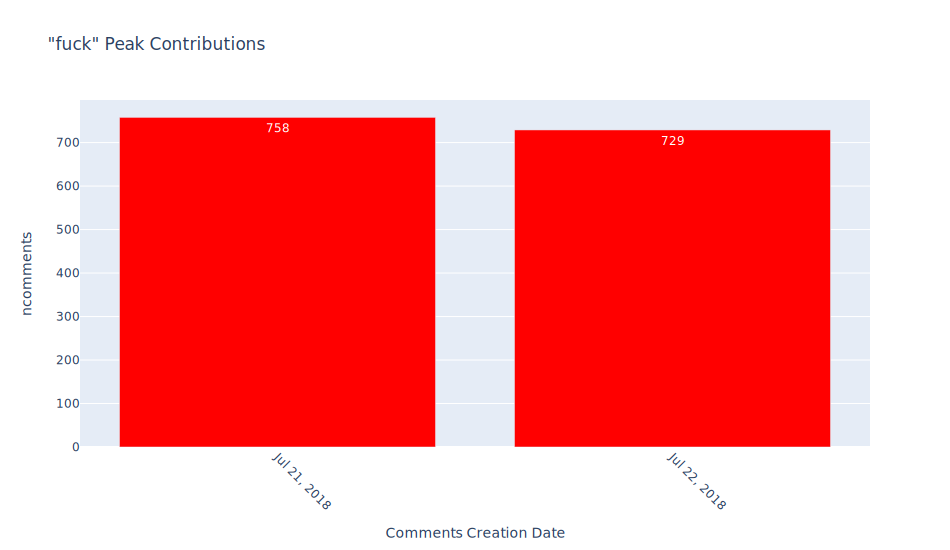

In [51]:
helpers.keyword_peaks(df_comments, 'fuck', n=2, threshold=0)

In [52]:
df_fuck.text.value_counts().head(60)

fuck amber heard                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

### Contains B*tch

In [53]:
df_bitch = df_comments[df_comments.text.str.contains('bitch')]
print(f'{df_bitch.shape[0]} contributions, on {df_bitch.video_id.nunique()} Videos, made by {df_bitch.username.nunique()} Users')


19839 contributions, on 1856 Videos, made by 16322 Users


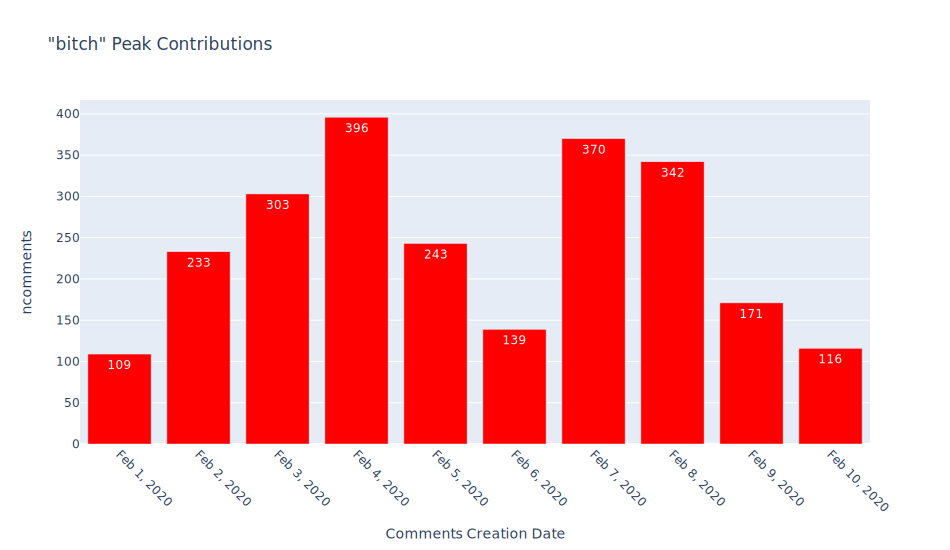

In [54]:
helpers.keyword_peaks(df_comments, 'bitch', n=10, threshold=0)

In [55]:
df_bitch.text.value_counts().head(60)

bitch                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

### Contains Abuser

In [56]:
df_abuser = df_comments[df_comments.text.str.contains('abus')]
print(f'{df_abuser.shape[0]} contributions, on {df_abuser.video_id.nunique()} Videos, made by {df_abuser.username.nunique()} Users')


100415 contributions, on 3503 Videos, made by 57256 Users


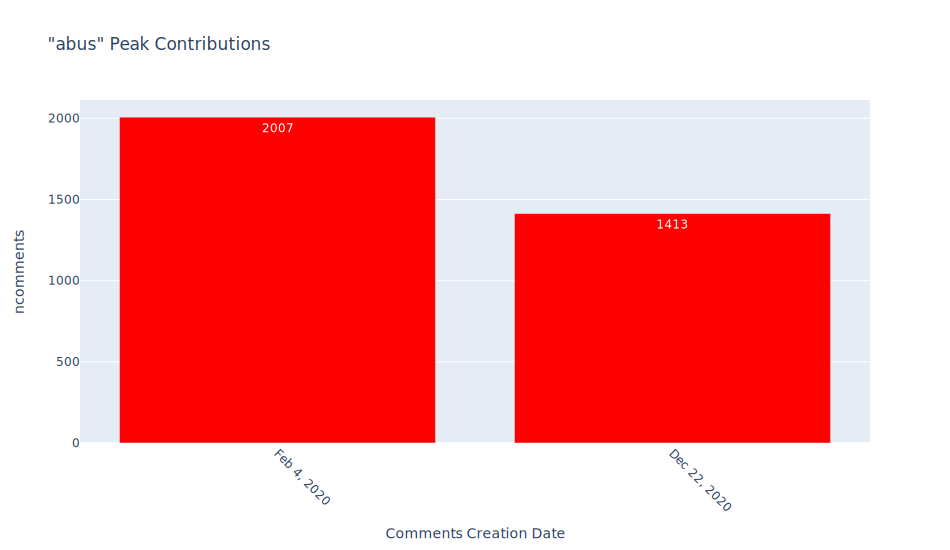

In [57]:
helpers.keyword_peaks(df_comments, 'abus', n=2, threshold=0)

In [58]:
df_abuser.text.value_counts().head(60)

abuser                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

### Contains Liar

In [59]:
df_liar = df_comments[df_comments.text.str.contains('liar')]
print(f'{df_liar.shape[0]} contributions, on {df_liar.video_id.nunique()} Videos, made by {df_liar.username.nunique()} Users')


19020 contributions, on 2565 Videos, made by 12767 Users


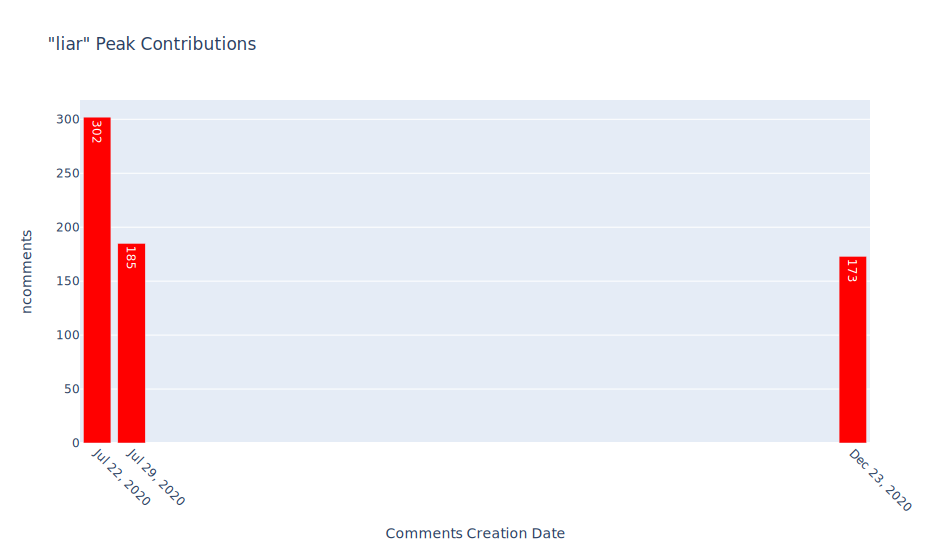

In [60]:
helpers.keyword_peaks(df_comments, 'liar', n=3, threshold=0)

In [61]:
df_liar.text.value_counts().head(60)

liar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Contains Crazy

In [62]:
df_crazy = df_comments[df_comments.text.str.contains('crazy')]
print(f'{df_crazy.shape[0]} contributions, on {df_crazy.video_id.nunique()} Videos, made by {df_crazy.username.nunique()} Users')


33681 contributions, on 2179 Videos, made by 26678 Users


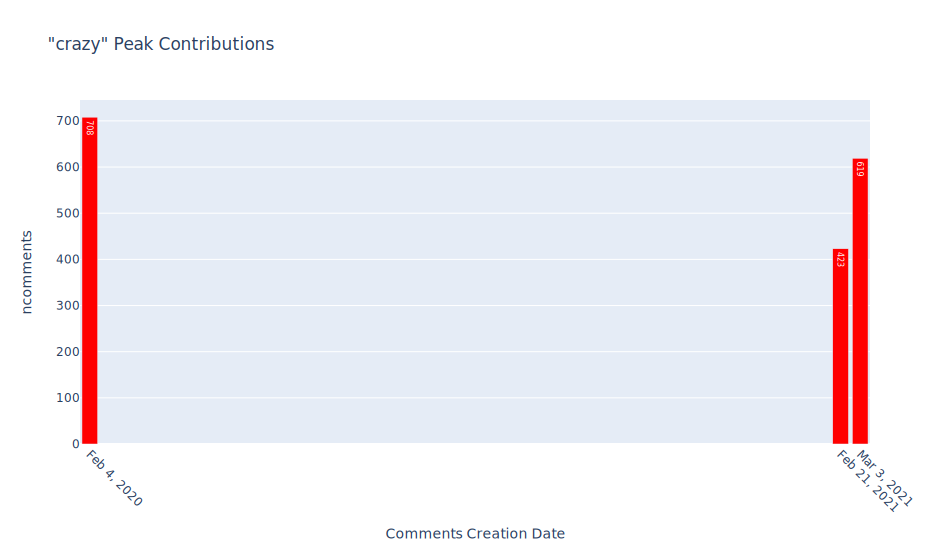

In [63]:
helpers.keyword_peaks(df_comments, 'crazy', n=3, threshold=0)

In [64]:
df_crazy.text.value_counts().head(60)

that's crazy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### Contains Disgusting

In [65]:
df_disgusting = df_comments[df_comments.text.str.contains('disgusting')]
print(f'{df_disgusting.shape[0]} contributions, on {df_disgusting.video_id.nunique()} Videos, made by {df_disgusting.username.nunique()} Users')


12716 contributions, on 1937 Videos, made by 9763 Users


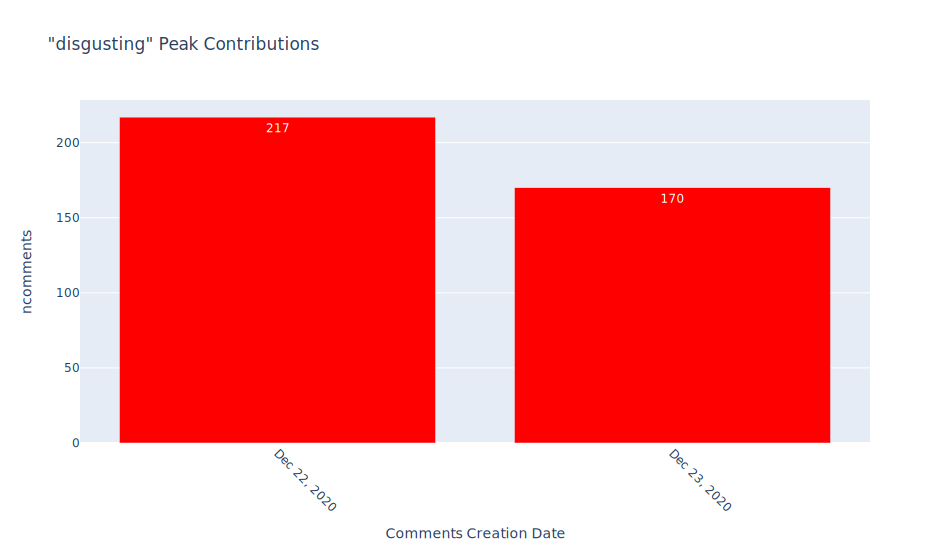

In [66]:
# importlib.reload(helpers)
helpers.keyword_peaks(df_comments, 'disgusting', n=2, threshold=0)

In [67]:
df_disgusting.text.value_counts().head(60)

disgusting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

### Contains Jail

In [68]:
df_jail = df_comments[df_comments.text.str.contains('jail')]
print(f'{df_jail.shape[0]} contributions, on {df_jail.video_id.nunique()} Videos, made by {df_jail.username.nunique()} Users')


18937 contributions, on 2203 Videos, made by 13168 Users


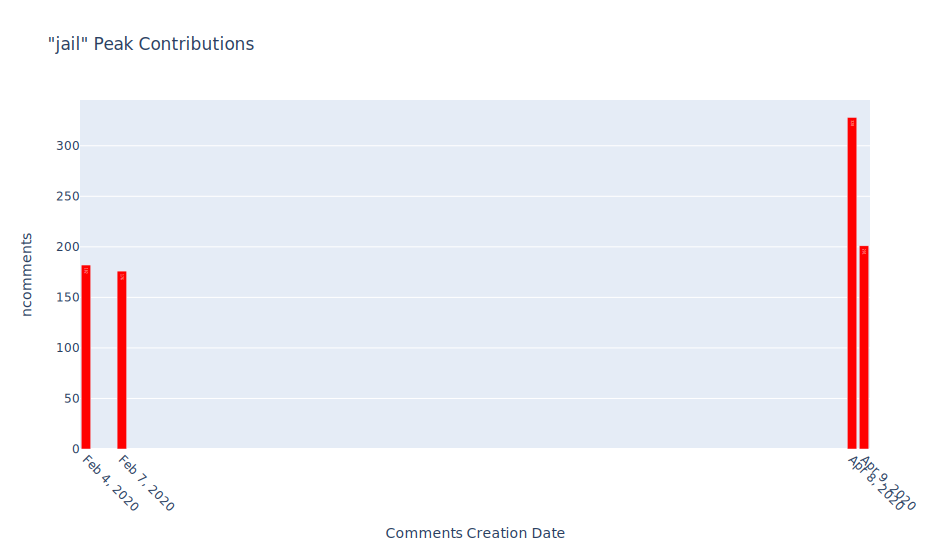

In [69]:
helpers.keyword_peaks(df_comments, 'jail', n=4, threshold=0)

In [70]:
df_jail.text.value_counts().head(60)

she should be in jail                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

<br>

<a id='spam'></a>
> ## Exploring Likely Spam Comments
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam"><b>Likely Spam</b></a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

**Note:** These Comments are classified as likelySpam in youtube moderation_status

In [71]:
df_comments.moderation_status.value_counts()

likelySpam    2240
Name: moderation_status, dtype: int64

In [72]:
df_spam = df_comments.query(" moderation_status == 'likelySpam' ")
print(df_spam.shape)
df_spam.head()

(2240, 20)


video_id                 comment_etag            comment_id  \
15856  RZ9pdYUENBg  2ytSk1FE1AJA97Q2Madd1n98VHI  Ugh_5obtRQF8R3gCoAEC   
15874  EYo38Ffrzxk  Sf1VnkAphb--YodRkkQ1aT3moO0  Ugg8MVtx6Qxvg3gCoAEC   
16069  V07XevGKH5k  u4C1TEulypSdrp_D_ISLHILt8VI  UgjJ-c4hBX9NRngCoAEC   
16203  hFU-vcdwRMw  vKz_q216ZrAvj3G7PrhmzYYpkFA  UggZjr6ZeWNAg3gCoAEC   
16229  D24p1rQ-yo4  QufN8e7Ymk2uvxAZcCcL2zlTYn4  Uggm7RoSoQQ6YngCoAEC   

                                                    text           username  \
15856                                she is so beautiful           esvhgvtr   
15874  she kinda looks like scarlett johansson here b...        blinkatreyu   
16069              johnny is so hoooooooooootoh my godآ          Firko Depp   
16203  johny depp ruined vanessa paradis kate moss an...     Hanah Hamilton   
16229  nicolas cagein a 3d moviehe's gonna eat the au...  Shanethefilmmaker   

                   author_ch_id  nlikes                   p_dtime  \
15856  UClld9-rBfNePAy8647U2MQw     9.0 2014-01-18 04:57:12+00:00   
15874  UCJZHrLO0zTL_Udgb9CbVMww     1.0 2014-05-27 02:26:16+00:00   
16069  UCYDTxSvgndy3sJ3M6Z9cCjA    14.0 2014-01-28 11:53:37+00:00   
16203  UCidXyburWKIjXcGmwylrfDA     0.0 2014-02-26 03:00:30+00:00   
16229  UCaoGpMOT6ZkYcIElEKVoICQ     0.0 2014-01-15 18:57:09+00:00   

                        u_dtime  nreplies moderation_status comment_reply  \
15856 2014-01-18 04:57:12+00:00       1.0        likelySpam       comment   
15874 2014-05-27 02:26:16+00:00       0.0        likelySpam       comment   
16069 2014-01-28 11:53:37+00:00       1.0        likelySpam       comment   
16203 2014-02-26 03:00:30+00:00       0.0        likelySpam       comment   
16229 2014-01-15 18:57:09+00:00       0.0        likelySpam       comment   

      parent_id author_ch_url author_profile_image  year       date month  \
15856      none          none                 none  2014 2014-01-18   Jan   
15874      none          none                 none  2014 2014-05-27   May   
16069      none          none                 none  2014 2014-01-28   Jan   
16203      none          none                 none  2014 2014-02-26   Feb   
16229      none          none                 none  2014 2014-01-15   Jan   

       dayofmonth  hour  
15856          18     4  
15874          27     2  
16069          28    11  
16203          26     3  
16229          15    18

In [73]:
df_spam.username.value_counts().head(15)

Well, well, well, how the turntables    73
LaraCroftEyes1                          51
Disney Takes Huge Dix                   41
Vladimir Manosalvas IG: TheVladMan      23
k. _nf                                  21
george washington                       19
Chris Corley                            18
Muerte Anunciada                        16
Josuأ© Veguilla                         14
BobbyDuke                               14
Sam Kresil                              12
bosnis                                  12
Pommie ًںگ» Bears                       11
The Amber Heard Playlist!!              11
Lindsey Depp                             9
Name: username, dtype: int64

In [74]:
df_spam.text.value_counts().head(60)

#justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

<br>

<a id='pos_comments'></a>
> ## Primary Text Investigation
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments"><b>Positive Comments</b></a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

This positive comments section is to be deducted later from the negative comments data to increase the counts accuracy

In [75]:
pos_text = {'love amber', 'stand with amber', 'standwithamber', 'support amber', 'supportamber', 'justiceforamber', 
            'johnnydeppisawifebeater', 'boycottwomenbeaters', 'wearewithamber', 'justice for amber', 
            'istandwithamber','wearewithyouamber'}

In [76]:
df_pos = df_comments[df_comments.text.str.contains('|'.join(pos_text))]
print(df_pos.shape)
df_pos.head(2)

(1982, 20)


video_id                 comment_etag                  comment_id  \
414  EYo38Ffrzxk  lszA-zsDuxsipz45LAZdRc8DYOc  UgyeKlHSK2ubb7uaQH14AaABAg   
470  yrTk-BEQ4kA  RkYh4qVNclPg1LnIAlGL8VHaEok  UgyQYAZ2Lf0islXlSsJ4AaABAg   

                                                  text           username  \
414  she is gorgeous top looking natural beauty i l...  Abdelyamine kamel   
470  nice video im glad my beautiful baby is happy ...      Lorena Correa   

                 author_ch_id  nlikes                   p_dtime  \
414  UC6UwWh45hW84f2tU8X-H3-g     0.0 2013-03-30 20:06:28+00:00   
470  UC-U0b5opsXnGRyHBzRSSLjw     0.0 2013-08-23 18:51:31+00:00   

                      u_dtime  nreplies moderation_status comment_reply  \
414 2013-03-30 20:06:28+00:00       0.0               NaN       comment   
470 2013-08-23 18:51:31+00:00       1.0               NaN       comment   

    parent_id author_ch_url author_profile_image  year       date month  \
414      none          none                 none  2013 2013-03-30   Mar   
470      none          none                 none  2013 2013-08-23   Aug   

     dayofmonth  hour  
414          30    20  
470          23    18

In [77]:
df_pos.username.nunique()

1488

In [78]:
df_pos.text.value_counts().head(60)

i love amber                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [79]:
pos_users = list(df_pos.username) 

In [80]:
'Worldie - Social Media for Good' in pos_users

True

In [81]:
'Christina Taft' in pos_users

True

<br>

<a id='threat_comments'></a>
> ## Exploring Threat Comments
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
    <li><a href="#threat_comments"><b>Threat Comments</b></a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [82]:
# KYS is an internet acronym standing for “kill yourself
threat_text = {' death', ' death ', 'burn', 'burninhell', 'burn in hell', 'kys', ' go kys', ' raped', 'get raped', 
               'go die', 'diecunt', 'go to hell', 'gotohell', 'beaten', 'beaten up', 'deserves it', 'kill amber',
               'kill her', 'deathtoamber', 'death to amber', 'to death amber', 'she’s trying to kill him',
               'kill yourself', ' deserves', 'ambich'}

In [83]:
df_threat = df_comments[df_comments.text.str.contains('|'.join(threat_text))]
print(df_threat.shape)

(26889, 20)


In [84]:
# exclude all the users with positive comments
df_threat = df_threat[~df_threat.username.isin(pos_users)]
print(df_threat.shape)
df_threat.head(2)

(25804, 20)


video_id                 comment_etag                  comment_id  \
1266  NEOT2-tgqNw  ei_6b9ETAGwxjtn2MWW8SgIHAaI  UgzHq7DvPxKkQZ26lrl4AaABAg   
1562  y9lA94P7shQ  -lUzlikm3Pax-9ehiiEHuWT_Y8Y  UgzDVoKhS57zDlWwarZ4AaABAg   

                                                   text     username  \
1266  amber is wonderful and beautiful paparazzis is...  mila cruice   
1562   imdb appears to list its production date as 2...       Nicola   

                  author_ch_id  nlikes                   p_dtime  \
1266  UCPH2JPL42MZcxeMjKJLpmvw     0.0 2013-03-15 09:30:52+00:00   
1562  UC_i3VqUyr48Fq6P-KMxKUaw     0.0 2013-10-06 02:47:31+00:00   

                       u_dtime  nreplies moderation_status comment_reply  \
1266 2013-03-15 09:30:52+00:00       0.0               NaN       comment   
1562 2013-10-06 02:47:31+00:00       0.0               NaN       comment   

     parent_id author_ch_url author_profile_image  year       date month  \
1266      none          none                 none  2013 2013-03-15   Mar   
1562      none          none                 none  2013 2013-10-06   Oct   

      dayofmonth  hour  
1266          15     9  
1562           6     2

In [85]:
df_threat.username.value_counts().head(15)

Bobby Campbell aka (The Oracle)    68
Galit Weissman                     65
Megan O'Shea                       63
Julie Lea                          60
The Amber Heard Playlist!!         58
Rob's Rules                        47
darrell holland                    45
Laura Peterson                     41
Drage_jdeppsupporter20             37
Ashely Holmes                      37
Jesus is God                       33
Rocio Pazos Martinez               31
Stevie J Raw                       31
Jayne Conlon                       29
Gilma Worldcitizen                 29
Name: username, dtype: int64

In [86]:
df_threat.text.value_counts().head(60)

go to hell                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

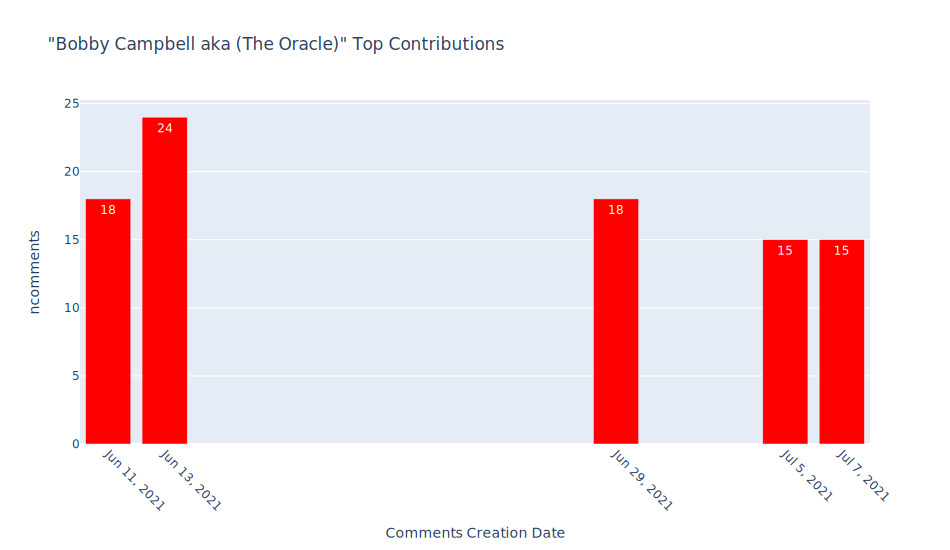

In [87]:
helpers.contr_peaks(df_comments, "Bobby Campbell aka (The Oracle)", n=5, threshold=0)

In [88]:
df_threat.query(" username == 'Bobby Campbell aka (The Oracle)' ").text.value_counts().head()

i super hate amber heard with a burning passionًںک،ًں“©ًں“¤                                                                    2
i ultra hate ah with a burning passionًںک،                                                                                     2
i ultra hate amber heard with a burning passionًںک،ًں“©ًں“¤                                                                    1
i ultra ultra ultra ultra hate amber heard with a burning passionًںک،                                                          1
i ultra ultra ultra ultra hate censorship feminism identity politics amber heard and tmz with a burning passionًںک،ًں“©ًں“¤    1
Name: text, dtype: int64

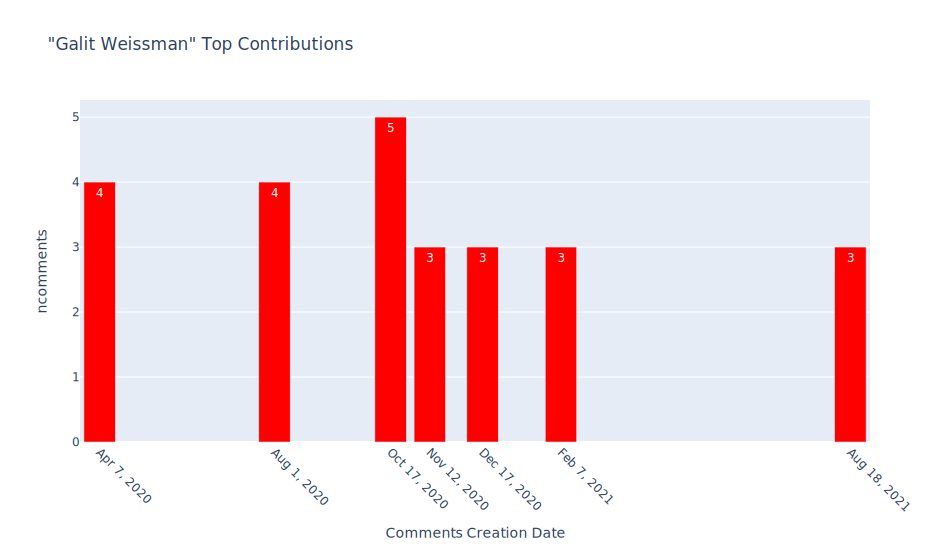

In [89]:
helpers.contr_peaks(df_comments, "Galit Weissman", n=7, threshold=0)

In [90]:
df_threat.query(" username == 'Galit Weissman' ").text.value_counts().head()

amber is a peace of trash johnny will get his justice that he deserves!!                                                                                                                                2
johnny has evidence and witnesses that have said that his never hurt amber she is the lair i hope that amber gets what she deserves she is nothing but a glod driggers johnny will get his justice!!    1
amber should be fired from aquaman!! johnny will get his justice that he deserves!!                                                                                                                     1
johnny don't not deserves any of this i know he will get his justice i just want to give him a huge the text messages are heart breaking johnny is an amazing man with a heart of gold â‌¤â‌¤           1
amber is a selfish person johnny will get his justice that he deserves!! she had nothing                                                                                                        

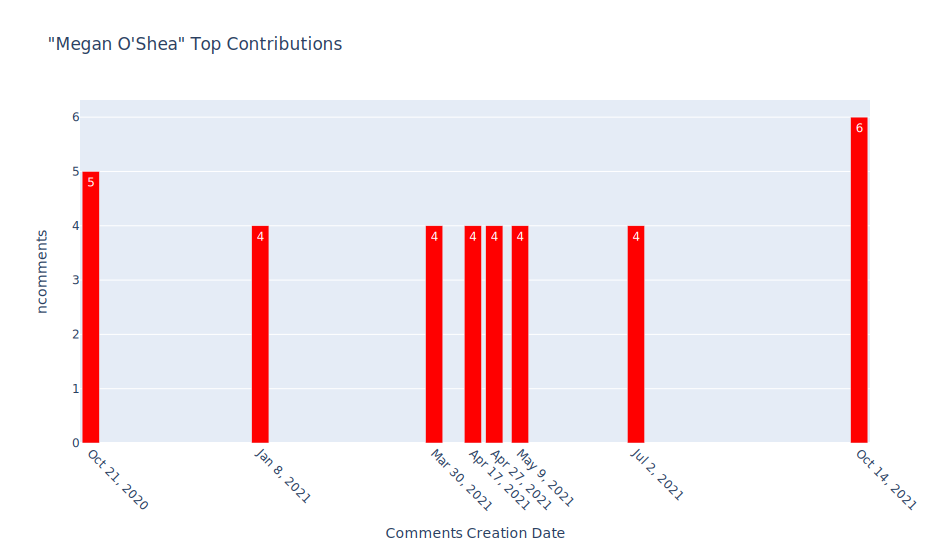

In [91]:
helpers.contr_peaks(df_comments, "Megan O'Shea", n=8, threshold=0)

In [92]:
name = "Megan O'Shea"
df_threat.query(" username == @name ").text.value_counts().head()

i really hope they get her for perjury she deserves to go to jail                                   3
i really hope they get ah for perjury she deserves to go to jail                                    2
i really hope he gets the appeal so he can get the justice he deserves                              1
i'm so glad to hear this johnny depp deserves this he will win this case                            1
i'm so glad to hear this about amber heard she deserves this because what she did to johnny depp    1
Name: text, dtype: int64

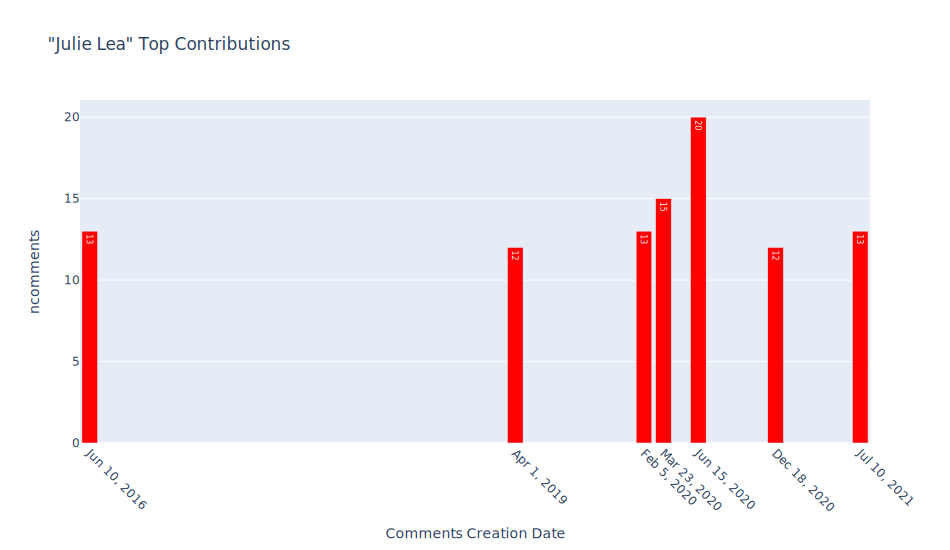

In [93]:
helpers.contr_peaks(df_comments, "Julie Lea", n=7, threshold=0)

In [94]:
df_threat.query(" username == 'Julie Lea' ").text.value_counts().head()

@jeremia bogislaus if only a few men come forward he's made the world a better place!! at great personal sacrifice on his part as someone who has worked as a psychologist for over 20 yrs & had my entire family destroyed by 1 ah personality disordered individual including the death of my best friend separately this makes him a modern day hero in my eyes i got involved in this case in the hope my loved one would get help but no such luck too deeply embedded in our culture we raise our sons not to hit women they are punished by it like jd all ah's should be in jail preferably prior to killing a loved one much loveâ™¥ï¸ڈâ™¥ï¸ڈًںœژًںœژ                                                                                                                                                                                                                                                                                                                                                                          

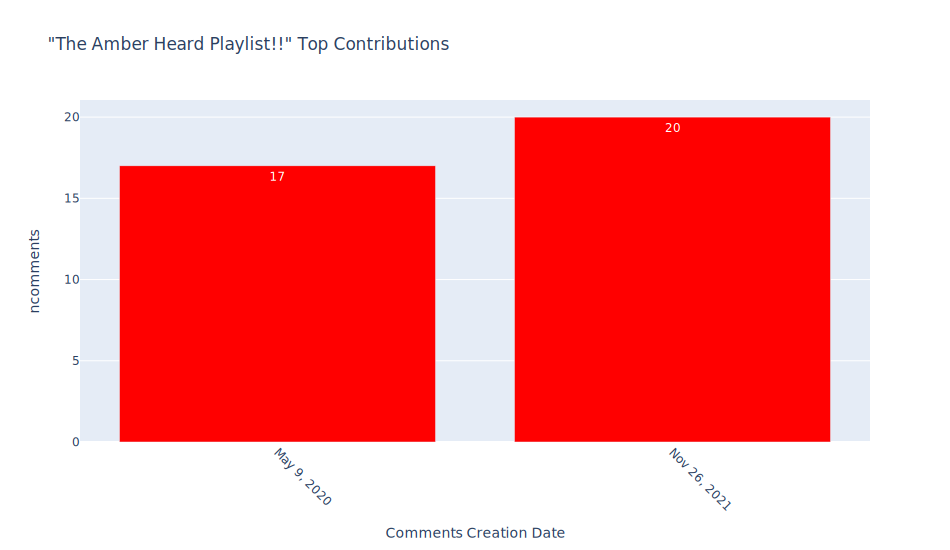

In [95]:
helpers.contr_peaks(df_comments, "The Amber Heard Playlist!!", n=2, threshold=0)

In [96]:
df_threat.query(" username == 'The Amber Heard Playlist!!' ").text.value_counts().head()

this is why you should believe amber washington postopinions amber heard: i spoke up against sexual violence ” and faced our culture's wrath that has to change by amber heard  dec 18 2018 at 3:58 pm mst amber heard is an actress and ambassador on women's rights at the american civil liberties union i was exposed to abuse at a very young age i knew certain things early on without ever having to be told i knew that men have the power ” physically socially and financially ” and that a lot of institutions support that arrangement i knew this long before i had the words to articulate it and i bet you learned it young too like many women i had been harassed and sexually assaulted by the time i was of college age but i kept quiet ” i did not expect filing complaints to bring justice and i didn't see myself as a victim then two years ago i became a public figure representing domestic abuse and i felt the full force of our culture's wrath for women who speak out friends and advisers told me i w

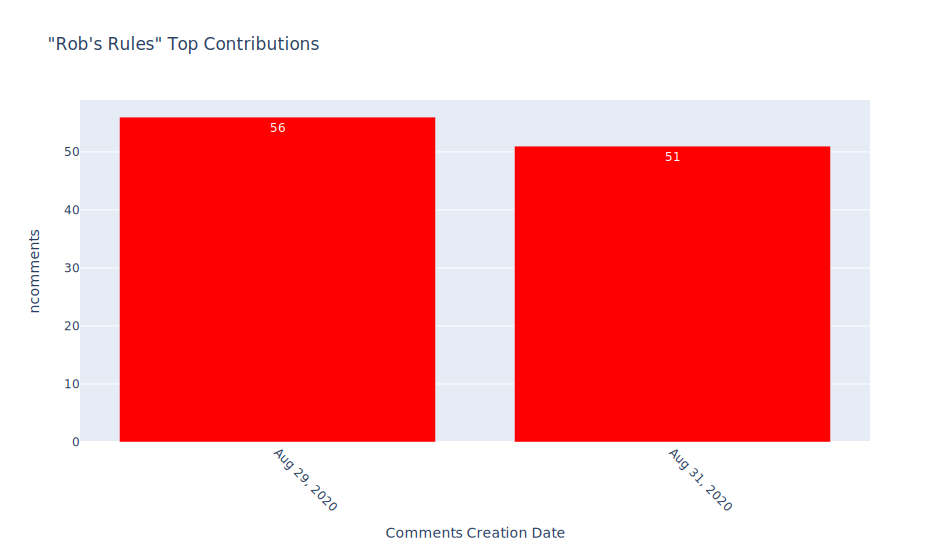

In [97]:
helpers.contr_peaks(df_comments, "Rob's Rules", n=2, threshold=0)

In [98]:
name = "Rob's Rules"
df_threat.query(" username == @name ").text.value_counts().head()

i hope they take him back that is if he wants to do it she hopefully will be exposed and will get what she deserves                                          1
he deserves so much better hopefully in the future he will find it she is just evil to do all this and feel no remorse ? how does she live with herself ?    1
james stewart well hopefully he wins the case against her and she will feel it she deserves it karma always peeks it's head sooner or later                  1
moonshayde yes i thought it was a very smart move they went where they had to go to get the justice that depp deserves and i hope he wins                    1
chelle motsinger she should she deserves it !!                                                                                                               1
Name: text, dtype: int64

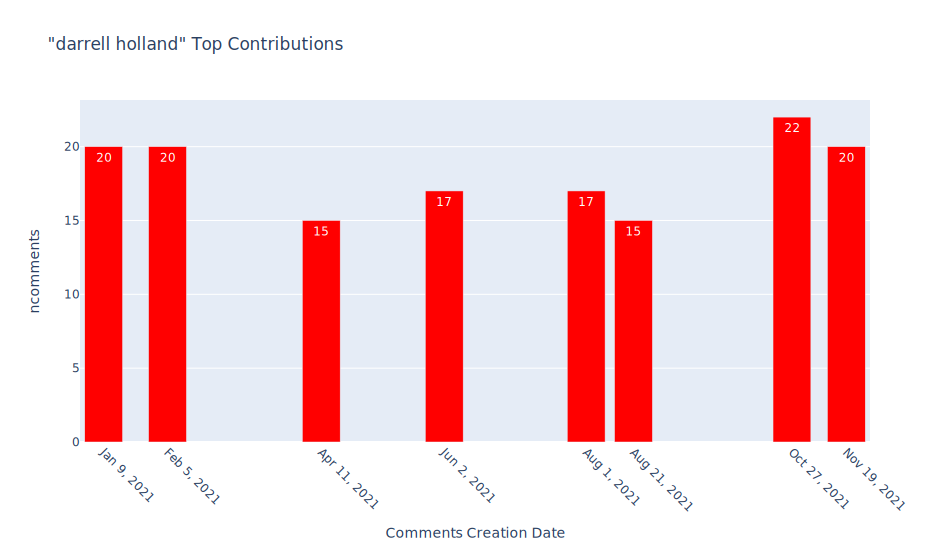

In [99]:
helpers.contr_peaks(df_comments, "darrell holland", n=8, threshold=0)

In [100]:
df_threat.query(" username == 'darrell holland' ").text.value_counts().head()

burn hollywood ًں”¥             3
burn disney                     2
@j0 m4m4 burn amber             1
@saladass s burn disney         1
@isobelle paniora burn money    1
Name: text, dtype: int64

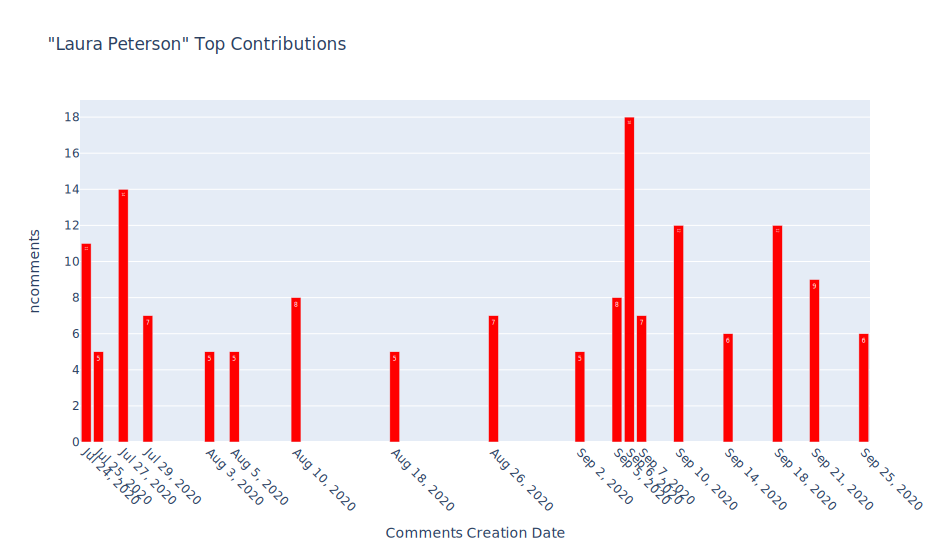

In [101]:
helpers.contr_peaks(df_comments, "Laura Peterson", n=18, threshold=0)

In [102]:
df_threat.query(" username == 'Laura Peterson' ").text.value_counts().head()

macy r i went through a near death experience with dv i was so young and so incredibly stupid back then it wasn't spoken about and help wasn't it readily available i was severely abused then stalked after i left                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          1
yeah that's the hard part

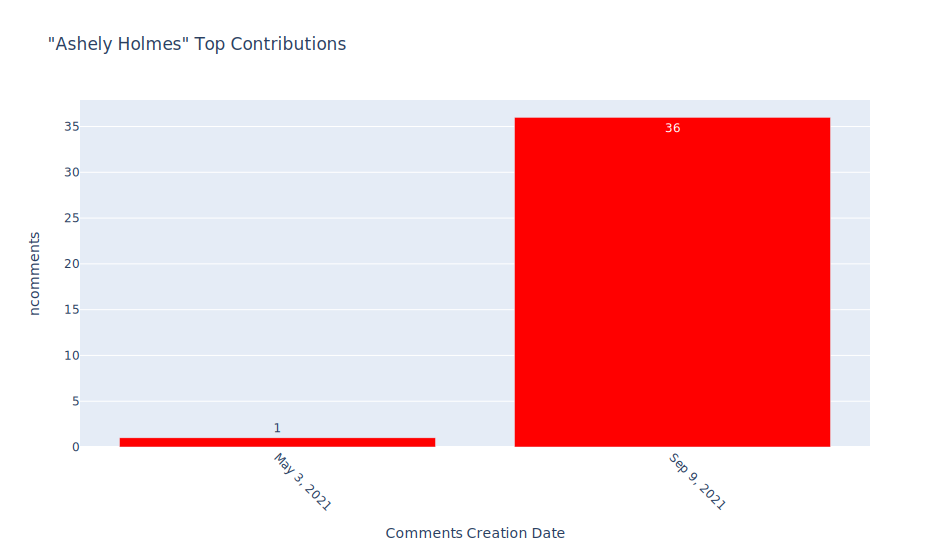

In [103]:
helpers.contr_peaks(df_comments, "Ashely Holmes", n=5, threshold=0)

In [104]:
df_threat.query(" username == 'Ashely Holmes' ").text.value_counts().head()

they have proof that she was the one being violent proof that she got makeup done to make it look like bruises proof that jd was the only one who had physical abuse and proof that jd is completely calm while she is trying to get a rise out of him because she wants to fight and he doesn't and proof that she was actively trying to ruin his career because she is a psychotic person who can't stand being dumped by a man!!! how is this still a question on who's the abuser?! how has this case not been solved? how is her career thriving while his is ending? all of his ex's came forward to tell everyone that jd was never abusive to them and always kind! how with all of this proof is she still the victim?! how has she not lost the case yet?! i'm completely baffled! this is the most ridiculous thing i've ever heard and seen! she is nothing but a complete and total psychopath who gets off on ruining the lives of anyone who dare try to get her out of their lives! she not only gets off on it but abs

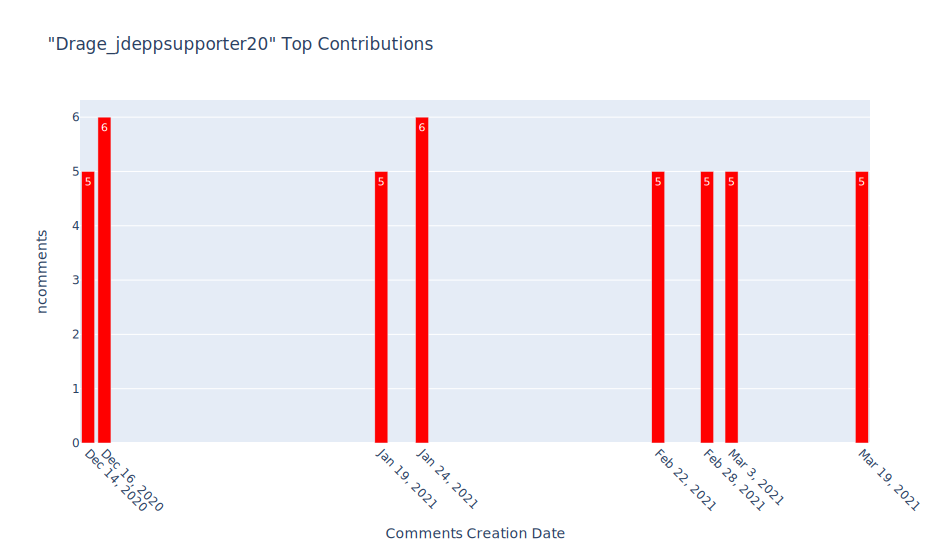

In [105]:
helpers.contr_peaks(df_comments, "Drage_jdeppsupporter20", n=8, threshold=0)

In [106]:
df_threat.query(" username == 'Drage_jdeppsupporter20' ").text.value_counts().head()

her and wb dusney deserves each other                                                                                  1
makes me want to fly over there and rescue johnny no one deserves that                                                 1
good on dior wb your burning down your house l support johnny                                                          1
johnny was trying to do the right thing he deserves better plus its not only johnny shes hurting its his kids too      1
thankgod jerry was there but it should never had happened johnny deserves justice deserves betterit breaks my heart    1
Name: text, dtype: int64

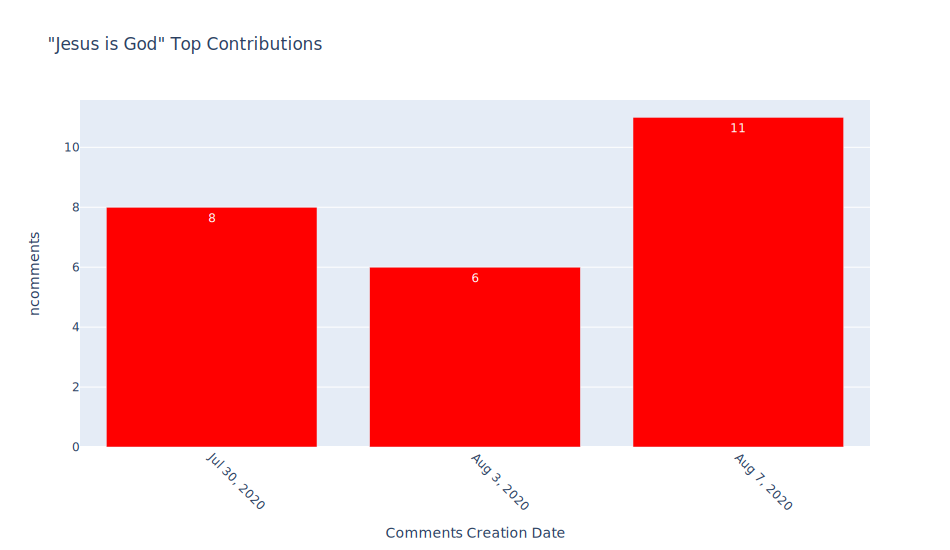

In [107]:
helpers.contr_peaks(df_comments, "Jesus is God", n=3, threshold=0)

In [108]:
df_threat.query(" username == 'Jesus is God' ").text.value_counts().head()

are you saved friend? if you died tonight will you go to heaven or hell? god almighty the creator was manifest in the flesh he came into the world to take away the sin of the world he gave up his own life to save yours his sacrifice on the cross paid the price for your redemption with his own blood on the third day he rose from dead and offers the gift of salvation and forgiveness to those that repent and trust in him this is the gospel which means the good news john 1:1 310 kjv in the beginning was the word and the word was with god and the word was god [2] the same was in the beginning with god [3] all things were made by him; and without him was not any thing made that was made [10] he was in the world and the world was made by him and the world knew him not isaiah 44:6 kjv thus saith the lord the king of israel and his redeemer the lord of hosts; i am the first and i am the last; and beside me there is no god revelation 1:17 18 kjv and when i saw him i fell at his feet as dead and 

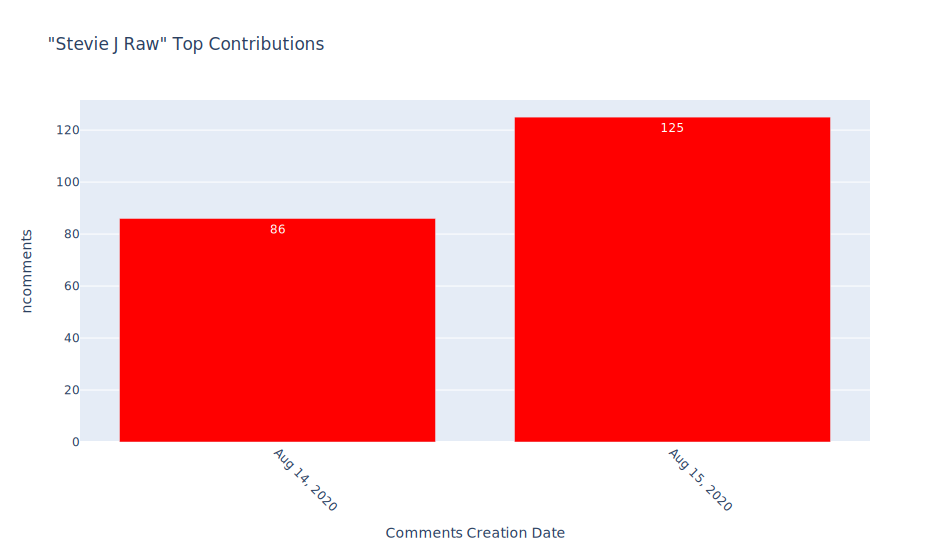

In [109]:
helpers.contr_peaks(df_comments, "Stevie J Raw", n=2, threshold=0)

In [110]:
df_threat.query(" username == 'Stevie J Raw' ").text.value_counts().head()

you are spot on she looks completely guilty and not at all like a real victim eating chocolate and smirking throughout her deposition she is a vial human being who deserves to be locked up           1
sorry to hear about your son i hope things get better johnny certainly deserves justice and i hope he will get it soon                                                                                 1
thanks ًں™ڈ and no problem at all i'm glad i could share this awesome closing argument he really nailed it! i agree that johnny now deserves to win the case and the sun should be held accountable    1
100% she deserves to lose this like johnny lost his work                                                                                                                                               1
yep i think it has begun and she deserves everything she gets                                                                                                                                       

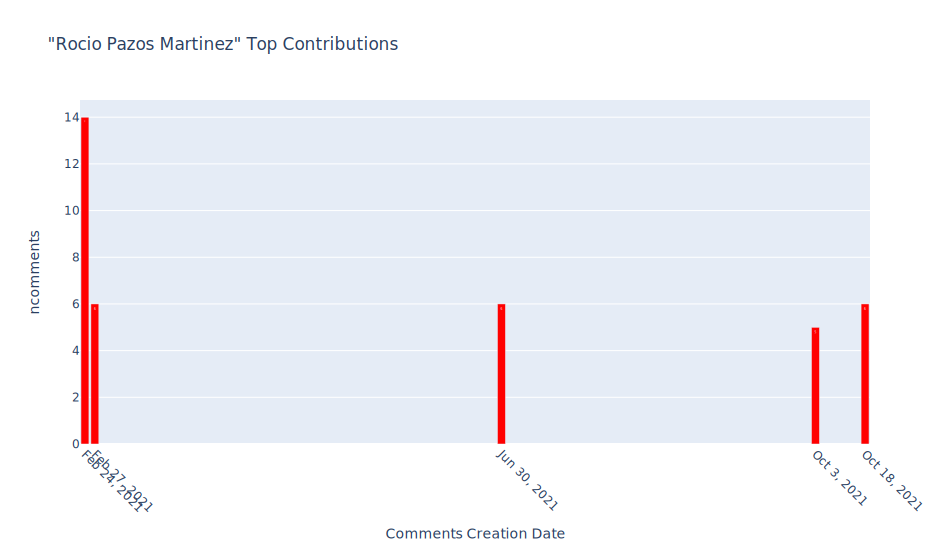

In [111]:
helpers.contr_peaks(df_comments, "Rocio Pazos Martinez", n=5, threshold=0)

In [112]:
df_threat.query(" username == 'Rocio Pazos Martinez' ").text.value_counts().head()

it's time she has the nightmares and no jd she deserves all the poo is coming in her way it's what she threw before ًںک‚ ًںک‚ ًںک‚                              1
its necessary to fire ah she deserves                                                                                                                           1
she is bad very bad but the karma will give her what she deserves poor johnny i feel pity for him he's a good person                                            1
she is an abuser and a liar she ruined jd he lost character in movies for she be more rich sorry but ah deserves be fired and stay in jail for lied in court    1
fingers crossed that it will be justice and she will finish in jail she deserves it                                                                             1
Name: text, dtype: int64

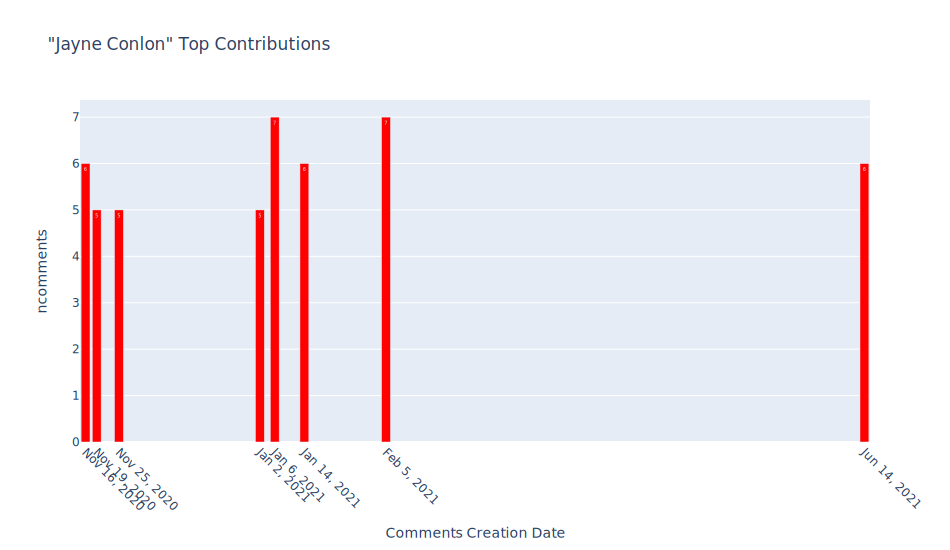

In [113]:
helpers.contr_peaks(df_comments, "Jayne Conlon", n=8, threshold=0)

In [114]:
df_threat.query(" username == 'Jayne Conlon' ").text.value_counts().head()

this doesn't surprise me just more fiction and lies from anger turd surely she must be charged now this proves what we have all said in the beginning johnny is innocent let's hope he gets the justice he deserves now ًں‘ڈ ًں‘چ ًںک‰                  1
its about time johnny got some justice anger turd is a gold digging lying narcissist i hope she gets what she deserves an orange jump suit and handcuffs to match ًں¤®ًں¤®ًں¤®ًں’©ًں’©ًں’© justice for johnny ًں’•ًں’•ًں’•ًں’•ًں’•                      1
can't believe it says only 4 years she deserves a lot more justice for johnny                                                                                                                                                                           1
at least johnny is know for being a generous kind human being all anger turd is known for is being an abusive narcissistic lying thieving cheating scum bag that can't act she'll get whats coming to and johnny will get the justice he so deserves    1


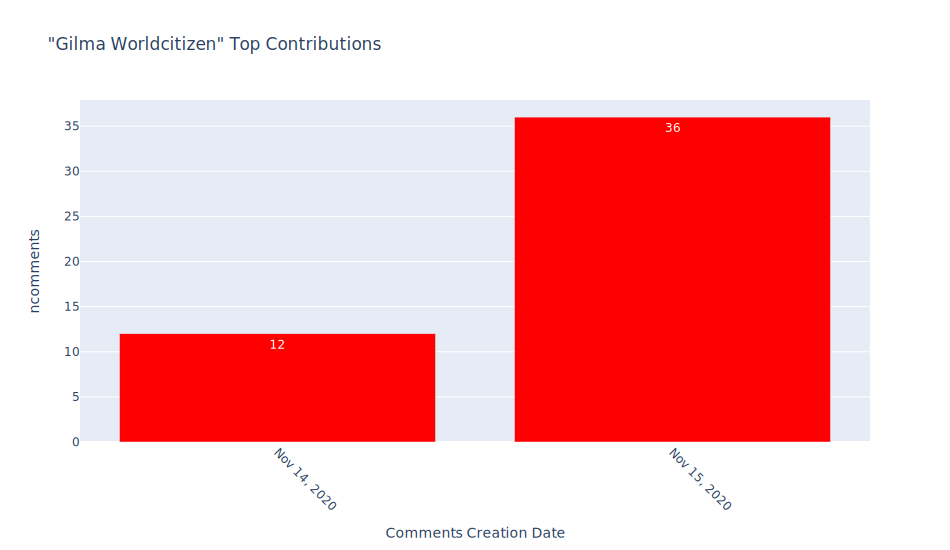

In [115]:
helpers.contr_peaks(df_comments, "Gilma Worldcitizen", n=2, threshold=0)

In [116]:
df_threat.query(" username == 'Gilma Worldcitizen' ").text.value_counts().head()

this case is going to be exemple for all men who suffer for abuse women we have to fight for men rights against domestic violence we are losing the freedom of communication!!! hope his team will be loyal until the end as rupert murdoch the owner of sun talkradio and many other newspapers and media companies he is a very influential and powerful man in europe maybe in america is well his position put him a predator and nowadays people do anything even kill their own family for money it is published by the news group newspapers division of news uk itself a wholly owned subsidiary of rupert murdoch's news corp since the sun on sunday was launched in february 2012 the paper has been a seven day operation judge andrew nicol's son robert palmer works @ talkradio uk talkradio employs dan wooton who wrote the article jonny deep sued for libel (sun and talkradio belong to rupert murdoch's news corp) judge andrew nicol controversial cases innocent judget guilty and after many years innocented by

<br>

<a id='neg_comments'></a>
> ## Exploring Negative Comments
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments"><b>Negative Comments</b></a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

<a id='negative_comments'></a>
>> ## Negative Comments
> <ul>
    <li><a href="#negative_comments"><b>Negative Comments</b></a></li>
 <li><a href="#victim">Contains "Victim"</a></li>
 <li><a href="#no_victim">Negative Comments Without "Victim"</a></li>
 </ul>

In [117]:
# To Load the dictionary of negative text    
with open('negative_text.pkl', 'rb') as f:
    neg_dict = pickle.load(f) 
    neg_text = set(neg_dict.keys())

In [118]:
neg_text = neg_text | threat_text

In [119]:
neg_text = neg_text | {'narcissist', 'cancelamber', 'cancel amber', 'amber sucks', 'hate amber heard', 'scamber', 
                       'boycott amber', 'amber heard sucks', "i remind that amber heard craped on jonny depp's bed",
                       'amber heard is trash', 'deleteamber', 'delete amber', 'amber heard is a monster'}

In [120]:
neg_text

{' death',
 ' death ',
 ' deserves',
 ' go kys',
 ' raped',
 '#fuckamberheard',
 '50 million',
 '7 million',
 '@amberheard fuck you',
 'abus',
 'abuse',
 'abuser',
 'abusing',
 'aggressive',
 'aggressively pull',
 'alcoholic',
 'amber abus',
 'amber heard abus',
 'amber heard is a monster',
 'amber heard is trash',
 'amber heard sucks',
 'amber lunge',
 'amber sucks',
 'amber turd',
 'amber-heard-abus',
 'amberheardisaliar',
 'amberheardisanabuser',
 'amberheardisanabuserandliar',
 'amberisanabuser',
 'ambertheabuser',
 'amberturd',
 'ambich',
 'assault',
 'assaulted johnny',
 'beaten',
 'beaten up',
 'because she is a woman',
 'because she’s a woman',
 'bitch',
 'boycott amber',
 'boycottamber',
 'boycottamberheard',
 'bullshit',
 'burn',
 'burn in hell',
 'burninhell',
 'cancel amber',
 'cancelamber',
 'change.org',
 'clawing',
 'clown',
 'cunt',
 'death',
 'death to amber',
 'deathtoamber',
 'delete amber',
 'deleteamber',
 'deserves it',
 'diecunt',
 'disgusting',
 'domestic violen

# Negative Comments

In [121]:
df_neg_total = df_comments[df_comments.text.str.contains('|'.join(neg_text))]
print(df_neg_total.shape)

(394697, 20)


In [122]:
# exclude all the users with positive comments
df_neg_total = df_neg_total[~df_neg_total.username.isin(pos_users)]
print(df_neg_total.shape)
df_neg_total.head(2)

(381226, 20)


video_id                 comment_etag                  comment_id  \
39   VPUUrdgxIa8  N0IcnfXWAATmNc7PATmVsXq5-58  UgycOQe20TUYIOyB5zR4AaABAg   
120  VPUUrdgxIa8  qorqkViON0Ig3VMl0EmlAvX5H3E  UgztIGiBkAiBgyO03rR4AaABAg   

                                                  text            username  \
39   whoa hold on there buddy are you saying that p...  lowdownshakinchill   
120  it was part of an idiotic series of comments w...               jsssm   

                 author_ch_id  nlikes                   p_dtime  \
39   UCCOdIP_feMgW00kp1fiE8fg     0.0 2013-09-01 18:55:13+00:00   
120  UCv0UUMS3TZgn68PnWDWAVpw     0.0 2013-08-15 22:56:15+00:00   

                      u_dtime  nreplies moderation_status comment_reply  \
39  2013-09-01 18:55:13+00:00       0.0               NaN       comment   
120 2013-08-15 22:56:15+00:00       0.0               NaN       comment   

    parent_id author_ch_url author_profile_image  year       date month  \
39       none          none                 none  2013 2013-09-01   Sep   
120      none          none                 none  2013 2013-08-15   Aug   

     dayofmonth  hour  
39            1    18  
120          15    22

In [123]:
df_neg_total.to_csv('total_negative_comments.csv', compression="zip", index=False)

In [124]:
users_negative_set = set(df_neg_total.username) - {np.nan}
len(users_negative_set)

227750

In [125]:
neg_users = neg_users | users_negative_set

In [126]:
df_neg_total.text.value_counts().head(60)

they won't believe you because you are a man she is not a victim                                                                               43276
they won't believe you because you are a man amber heard she is not a victim                                                                    1595
they won't believe you because you are a man she is not the victim                                                                              1331
she is not a victim                                                                                                                             1109
they wont believe you because you are a man she is not a victim                                                                                 1019
they won't believe you because your a man she is not a victim                                                                                   1010
they won't believe you because you are a man she is not a victim!                                         

### Likely-Spam Negative Comments

In [127]:
df_neg_total.moderation_status.value_counts()

likelySpam    405
Name: moderation_status, dtype: int64

In [128]:
df_neg_spam = df_neg_total.query(" moderation_status == 'likelySpam' ")
print(df_neg_spam.shape)
df_neg_spam.head(2)

(405, 20)


video_id                 comment_etag            comment_id  \
34335  NRlp5njBZyw  lN_sY5UexLfnmvfeCGUwWJ-yGCc  UghRoax9kwxbA3gCoAEC   
79489  Y4Xh2KBI4I0  dTzx5tbiBn6_QIvdti-xAe7bKIo  UghfIXDT_Ut1C3gCoAEC   

                                                    text     username  \
34335  mr4:3 and 1440p strike again getting real tire...   PaperManga   
79489                these are some god acting skills!!!  id104335409   

                   author_ch_id  nlikes                   p_dtime  \
34335  UCZOawtPKJPig3HfwGWVzeRw     0.0 2014-02-23 11:50:01+00:00   
79489  UCptxRTUw5NZx7gtrIlbYZYw     1.0 2016-04-18 09:46:24+00:00   

                        u_dtime  nreplies moderation_status comment_reply  \
34335 2014-02-23 11:50:01+00:00       0.0        likelySpam       comment   
79489 2016-04-18 09:46:24+00:00       0.0        likelySpam       comment   

      parent_id author_ch_url author_profile_image  year       date month  \
34335      none          none                 none  2014 2014-02-23   Feb   
79489      none          none                 none  2016 2016-04-18   Apr   

       dayofmonth  hour  
34335          23    11  
79489          18     9

In [129]:
df_neg_spam.text.value_counts().head(60)

please sign this petition to remove abuser heard from aquaman 2 over 400000 signatures so far! https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2?fbclid=iwar2kn9zpj azwunc96oivouhbytonesxogxv2wlytirfkghm_0paltjuyh8                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [130]:
df_nneg_spam = df_neg_spam.groupby('username').agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'})

print(df_nneg_spam.shape)
df_nneg_spam = df_nneg_spam.sort_values('ncomments', ascending=False)
df_nneg_spam.head(15)


(241, 4)


username  ncomments  nreplies  nlikes
189  Well, well, well, how the turntables         44       0.0     7.0
188    Vladimir Manosalvas IG: TheVladMan         23       0.0    27.0
202                                bosnis         12       0.0     6.0
212                     george washington         10       1.0     2.0
173            The Amber Heard Playlist!!          9       0.0     1.0
26                              BobbyDuke          8       0.0    11.0
115                         London Pastel          8       0.0     9.0
146                     Pommie ًںگ» Bears          5       0.0    29.0
226                          mashermancan          5       0.0     1.0
147               Portal Distant Kingdoms          5       0.0     6.0
205                        chantall meyer          4       0.0     2.0
65                              Finnilebo          4       0.0     1.0
42                          Connie Savage          4       0.0     0.0
107                    LidiaBellaItaliana          4       1.0     2.0
223                                k. _nf          3       0.0    47.0

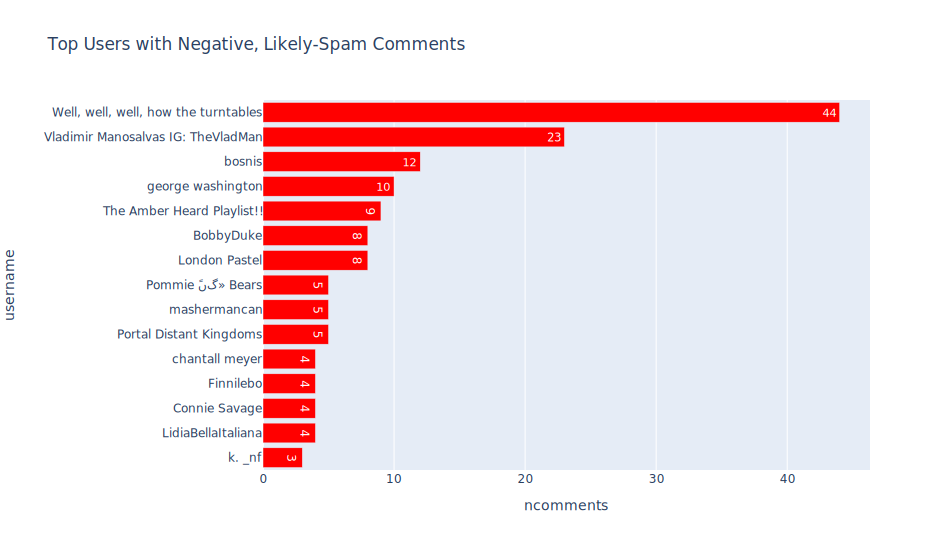

In [131]:
helpers.barh(df_nneg_spam.head(15), 
             'Top Users with Negative, Likely-Spam Comments', threshold=0)

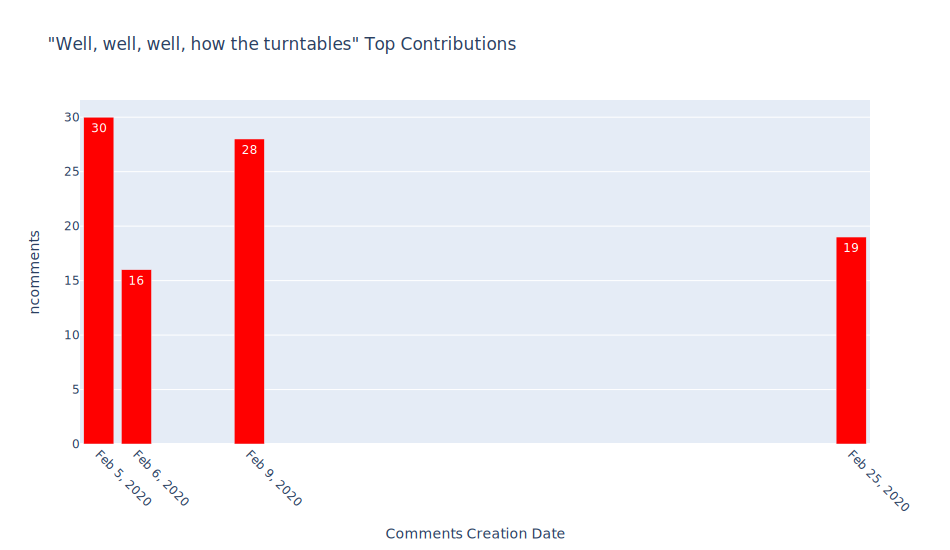

In [132]:
helpers.contr_peaks(df_comments, "Well, well, well, how the turntables", n=4, threshold=0)

In [133]:
df_neg_spam.query(" username == 'Well, well, well, how the turntables' ").text.value_counts().head()

petition to remove amber heard from the next aquaman film http://chngit/jxvlthb9pd 2nd petition to revoke her title of ambassador of womens rights http://chngit/hpfgcc8t7f                                                                   15
http://chngit/6mkpvp5krm sign petition to remove amber turd from aquaman 2 http://chngit/ylgjqz2zdn 2nd petition to remove amber turd from loreal http://chngit/skt9pvzvsq 3rd petition to remove her title of ambassador of womens rights     8
http://chngit/9zdwzmfwjk petition link                                                                                                                                                                                                         7
petition to remove amber heard from aquaman 2 http://chngit/6mkpvp5krm  2nd petition to revoke her title of ambassador of womens rights http://chngit/tj9zqwts9c                                                                               3
http://chngit/wtcnfq8zms heres petit

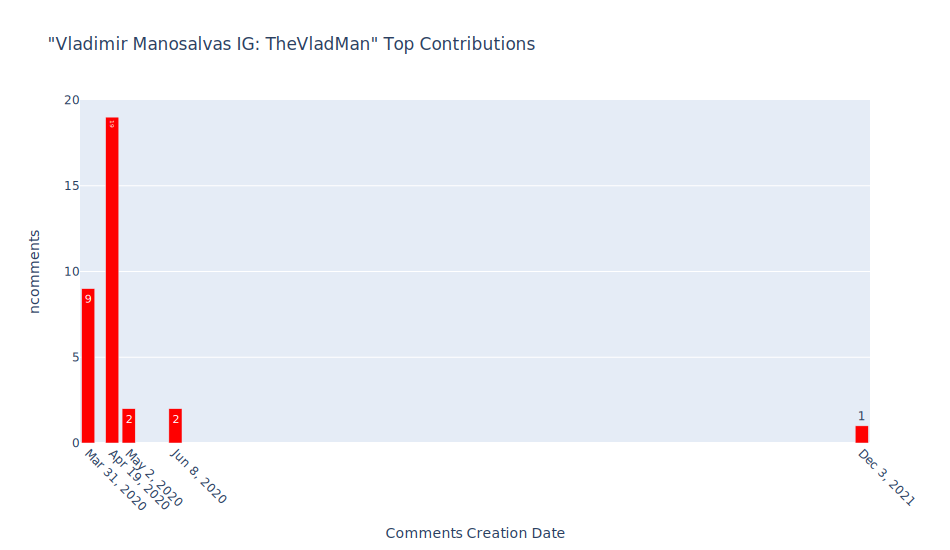

In [134]:
helpers.contr_peaks(df_comments, "Vladimir Manosalvas IG: TheVladMan", n=5, threshold=0)

In [135]:
df_neg_spam.query(" username == 'Vladimir Manosalvas IG: TheVladMan' ").text.value_counts().head()

please sign this petition to remove abuser heard from aquaman 2 over 400000 signatures so far! https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2?fbclid=iwar2kn9zpj azwunc96oivouhbytonesxogxv2wlytirfkghm_0paltjuyh8                   19
janna mcintosh please sign this petition to remove abuser heard from aquaman 2 over 400000 signatures so far! https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2?fbclid=iwar2kn9zpj azwunc96oivouhbytonesxogxv2wlytirfkghm_0paltjuyh8     1
please sign this petition to remove amber heard in aquaman 2 over 400000 signatures so far! https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2?fbclid=iwar2kn9zpj azwunc96oivouhbytonesxogxv2wlytirfkghm_0paltjuyh8                       1
please sign this petition to remove amber heard from aquaman 2 https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2                                                                                       

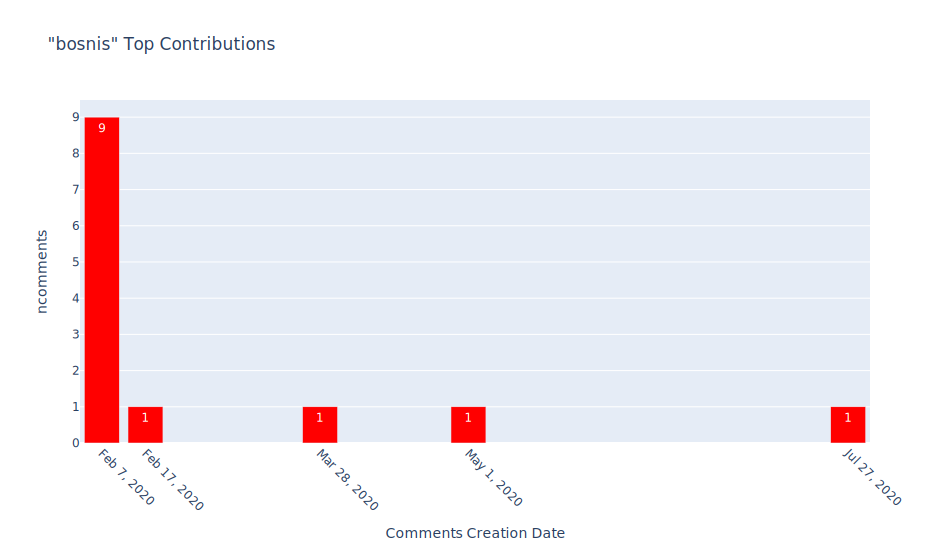

In [136]:
helpers.contr_peaks(df_comments, "bosnis", n=5, threshold=0)

In [137]:
df_neg_spam.query(" username == 'bosnis' ").text.value_counts().head()

please sign the petition to remove amber heard from aquaman 2: http://chngit/4rmtchbtjs    12
Name: text, dtype: int64

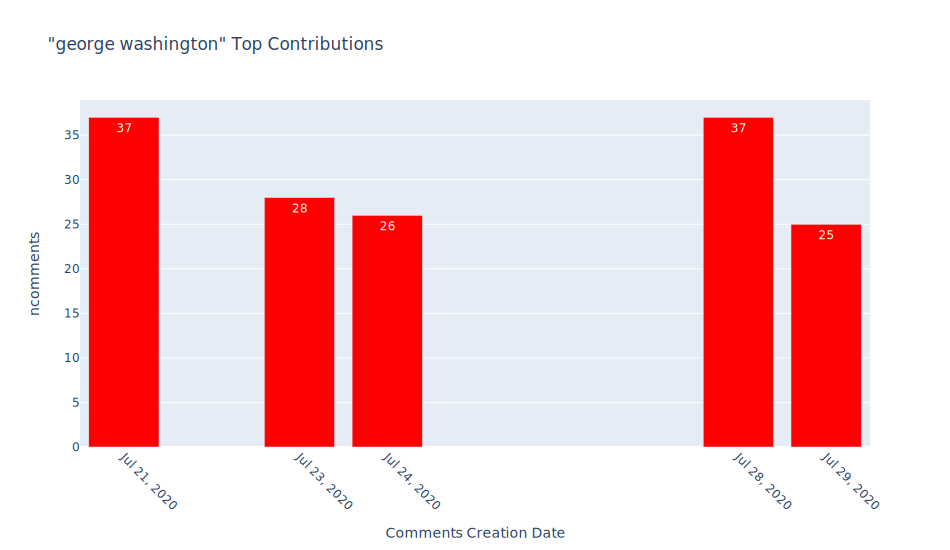

In [138]:
helpers.contr_peaks(df_comments, "george washington", n=5, threshold=0)

In [139]:
df_neg_spam.query(" username == 'george washington' ").text.value_counts().head()

details on amber heard's domestic abuse arrest revealed https://wwwyoutubecom/watch?v=81mnraxlbee as many of you might know by now amber heard has a reported history of domestic violence including a time when she was arrested for allegedly assaulting her ex wife tasya van ree at seattle tacoma international airport in 2009 now the details of the incident are finally getting attention in the media    2
usa lawsuit starts january 21 2021 fairfax virginia johnny depp suing ex wife amber heard in virginia                                                                                                                                                                                                                                                                                                              1
narcissist abuser amber heard a therapist's thoughts on johnny and amber's audio argument! https://wwwyoutubecom/watch?v=bvuiaokqaq0 listen to this one                                       

### A Heat Map for the Negative Comments 


Note: The Peaks on Feb, Dec 2020



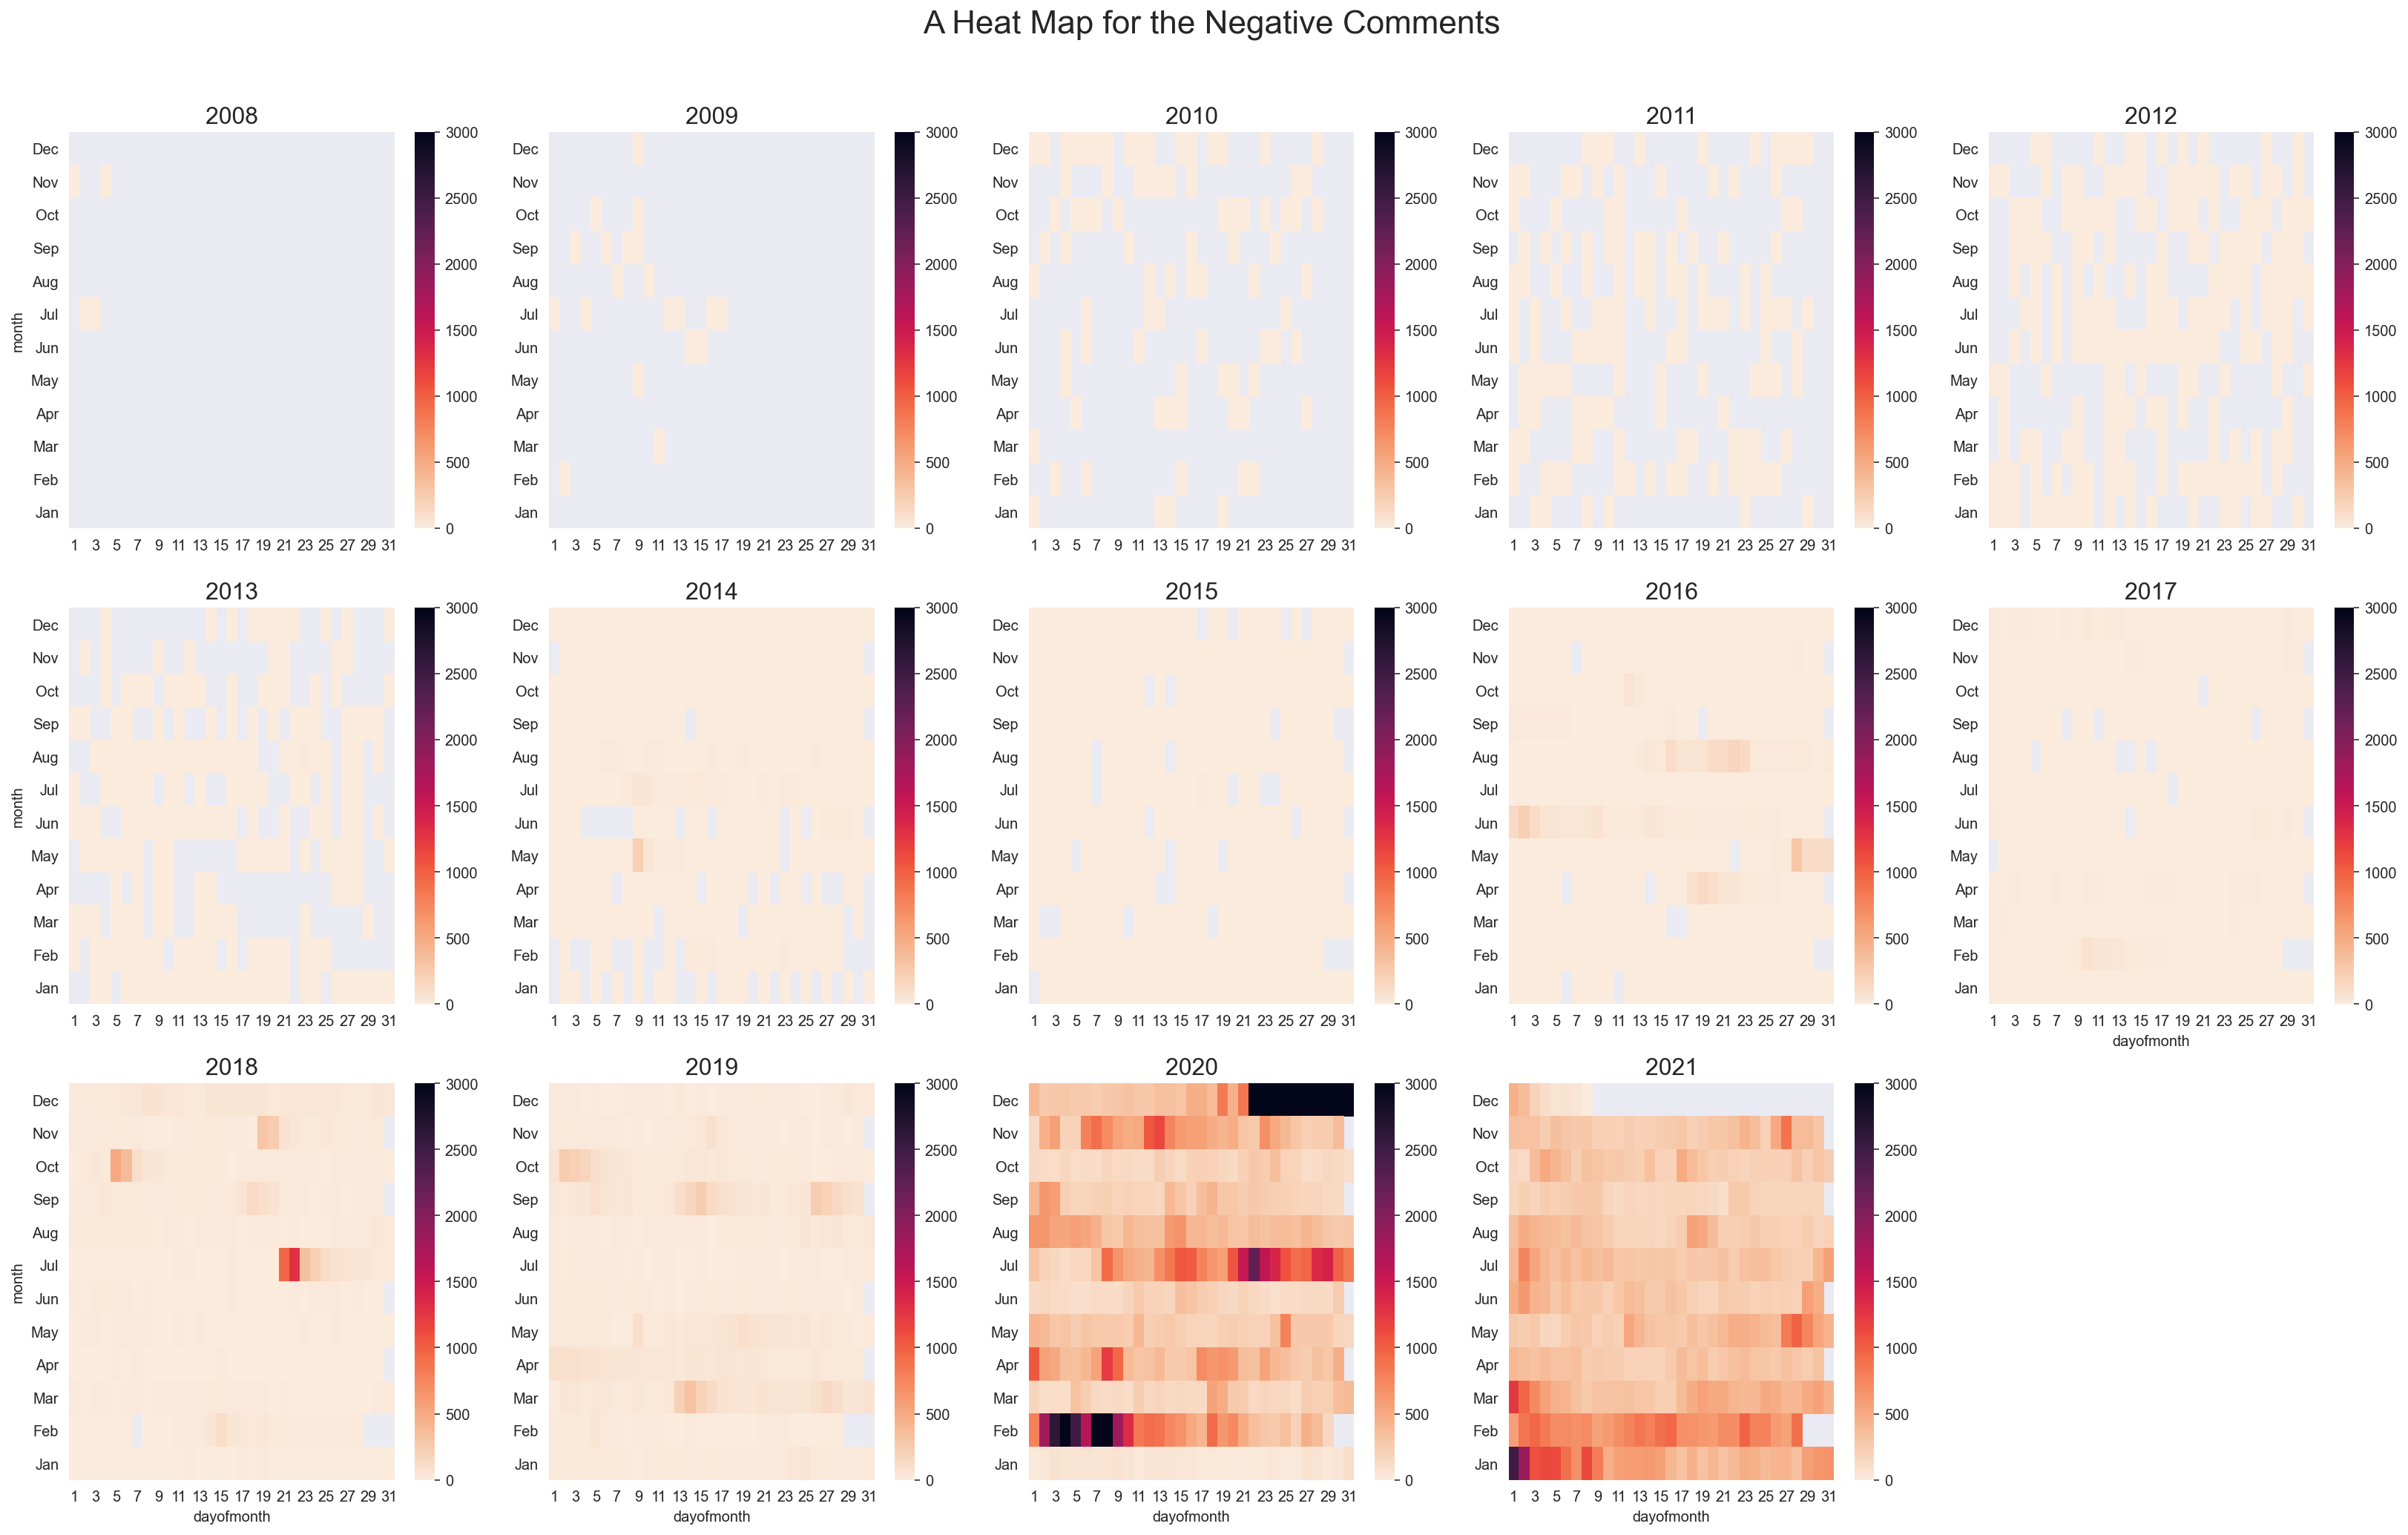

In [140]:
neg_daily = df_neg_total.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ncomments')

print('\nNote: The Peaks on Feb, Dec 2020\n')
title = 'A Heat Map for the Negative Comments'
helpers.facet_heat(neg_daily, title, n_col=5, vmax=3000)

### Top Users with Negative Comments (Only Negative Contributions)

In [141]:
df_nneg = df_neg_total.groupby('username').agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'})

print(df_nneg.shape)
df_nneg = df_nneg.sort_values('ncomments', ascending=False)
df_nneg.head(15)

(227750, 4)


username  ncomments  nreplies  nlikes
88313                              Julie Lea        449     184.0  3032.0
102840                          Lindsey Depp        424      34.0   700.0
38347                              Crispy Co        293      90.0  1855.0
24323        Bobby Campbell aka (The Oracle)        282     188.0  3504.0
34597                        Christine Lloyd        268      40.0  1178.0
145447                           Rob's Rules        263       4.0   374.0
181678  Well, well, well, how the turntables        243      49.0  1201.0
104840                          Lorri Holder        230      79.0  1608.0
166513                       Tania Haeussler        219      73.0  1447.0
162718                          Stevie J Raw        215      59.0   900.0
30153                          Carmen Castro        200      51.0  1261.0
169326                      The Killing Joke        199      61.0   596.0
182371           Wild Heart's Can't Be Tamed        195     131.0  1161.0
80136                        Jay A Errington        191     133.0  1219.0
168632            The Amber Heard Playlist!!        190      53.0    15.0

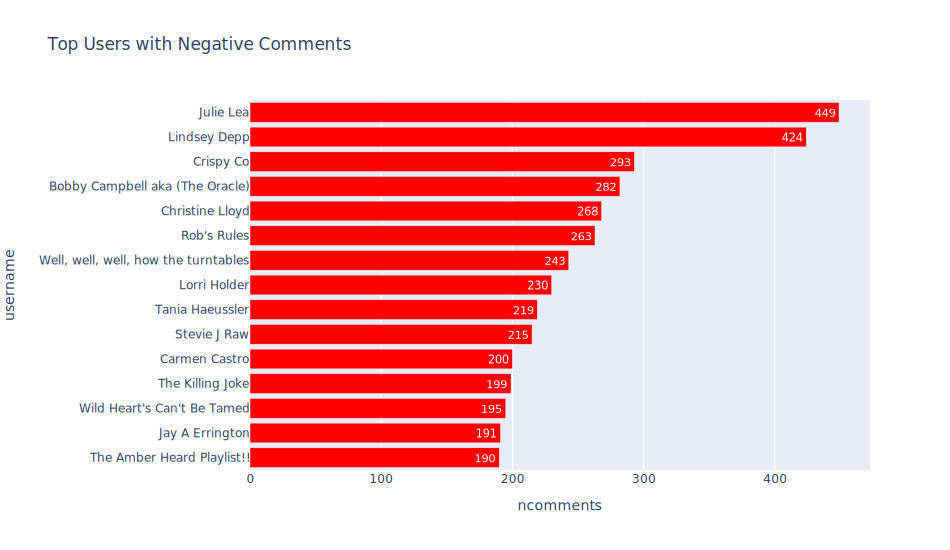

In [142]:
helpers.barh(df_nneg[['username', 'ncomments']].head(15), 'Top Users with Negative Comments', threshold=0)

### Negative Users Contributions on Each Date

In [143]:
df_n = df_neg_total.groupby(['date', 'username']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df_n.head(15)


date                             username  ncomments  nlikes  \
209462 2020-12-29                             Damn ...         62    17.0   
229820 2021-01-08                      Kilim Nataniahu         62   105.0   
156745 2020-12-22                             Goth Kid         60     0.0   
176992 2020-12-25                        Frost_Daghers         43    10.0   
21599  2019-02-05                                Lotta         41    10.0   
222952 2021-01-01                        aria tatality         40     0.0   
117963 2020-08-12                      Bernie McKinley         39    20.0   
205246 2020-12-28                            Ov3r tube         38   210.0   
291649 2021-06-06                         Willy Gonutz         38    10.0   
225013 2021-01-02  ل´ ل´‡ل´„ل´›ل´ڈت€ل´‡ل´…ل´›تœةھل´„ x         36    27.0   
291561 2021-06-06                        Marianne Erni         36    40.0   
316165 2021-09-09                        Ashely Holmes         36    35.0   
207837 2020-12-28                            you good?         35    12.0   
174425 2020-12-24                           Zhong Xina         35  1582.0   
212279 2020-12-29             Sweet Succulent Euphoria         35   981.0   

        nreplies  
209462       0.0  
229820       1.0  
156745       0.0  
176992       0.0  
21599        0.0  
222952       1.0  
117963       0.0  
205246       0.0  
291649       1.0  
225013       2.0  
291561       0.0  
316165       9.0  
207837       0.0  
174425       0.0  
212279       0.0

### Negative Comments Peak Dates

In [144]:
negative_dates = df_neg_total.groupby(['date']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

negative_dates.head(15)

date  ncomments    nlikes  nreplies
3093 2020-12-27      12837  175308.0     769.0
3092 2020-12-26       9639  169265.0     557.0
3089 2020-12-23       9553  240048.0    1376.0
3090 2020-12-24       8423  234557.0     941.0
3094 2020-12-28       7951   94882.0     624.0
3095 2020-12-29       6144   92072.0     709.0
3096 2020-12-30       4801   80637.0     434.0
3091 2020-12-25       4409   90777.0     452.0
2766 2020-02-04       4347  121480.0    3223.0
3088 2020-12-22       3744  117748.0     780.0
2769 2020-02-07       3329   92380.0    2592.0
2770 2020-02-08       3062  107037.0    1964.0
3097 2020-12-31       2965   47417.0     448.0
2765 2020-02-03       2635  114041.0    2939.0
3098 2021-01-01       2495   37574.0     334.0

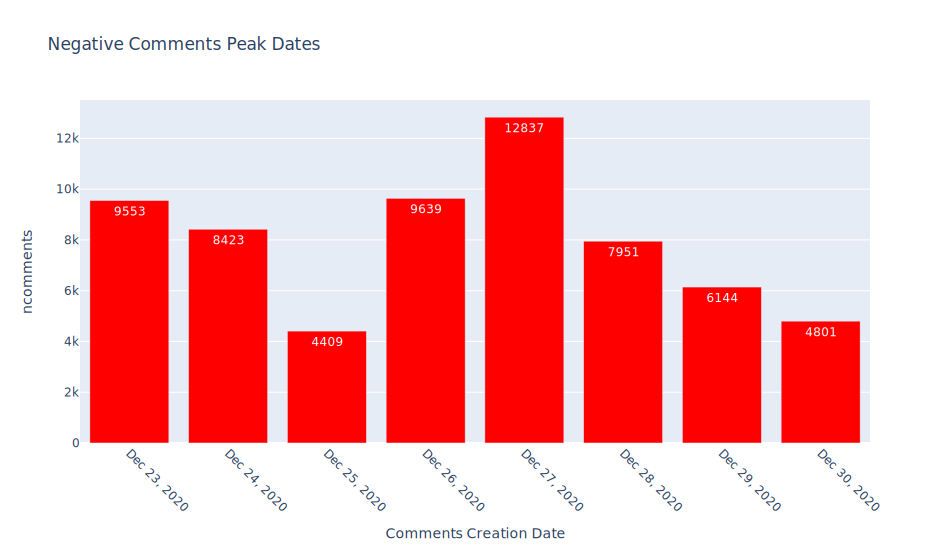

In [145]:
helpers.bar_peaks(negative_dates[['date', 'ncomments']].head(8), 
                  'Negative Comments Peak Dates')

### More Investigations on Top Users Commented Negatively

In [146]:
df_n.username.head(15)

209462                               Damn ...
229820                        Kilim Nataniahu
156745                               Goth Kid
176992                          Frost_Daghers
21599                                   Lotta
222952                          aria tatality
117963                        Bernie McKinley
205246                              Ov3r tube
291649                           Willy Gonutz
225013    ل´ ل´‡ل´„ل´›ل´ڈت€ل´‡ل´…ل´›تœةھل´„ x
291561                          Marianne Erni
316165                          Ashely Holmes
207837                              you good?
174425                             Zhong Xina
212279               Sweet Succulent Euphoria
Name: username, dtype: object

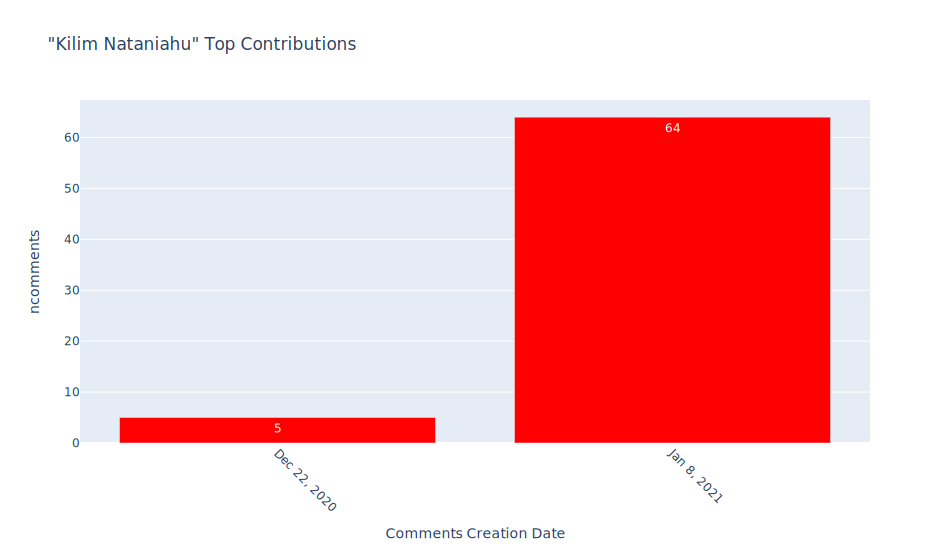

In [147]:
helpers.contr_peaks(df_comments, "Kilim Nataniahu", n=5, threshold=0)

In [148]:
df_comments[df_comments.username == 'Kilim Nataniahu'].text.value_counts().head(60)

to all people here star downvoting all access videos they are clearly taking the side of a domestic abuser we should not tolerated domestic abuse in any shape or form make this know too in their twitter feed do not let them profit from the defence of domestic abusers !!!!!                                      28
to all people here star downvoting all access videos they are clearly taking the side of a domestic abuser we should not tolerated domestic abuse in any shape or form make this know too in their twitter feed do not let them profit from the defence of domestic abusers !!!!                                       23
nobody will believe you because you are a man amber heard                                                                                                                                                                                                                                                               5
@a friend or foe yeah that is why i hate access because th

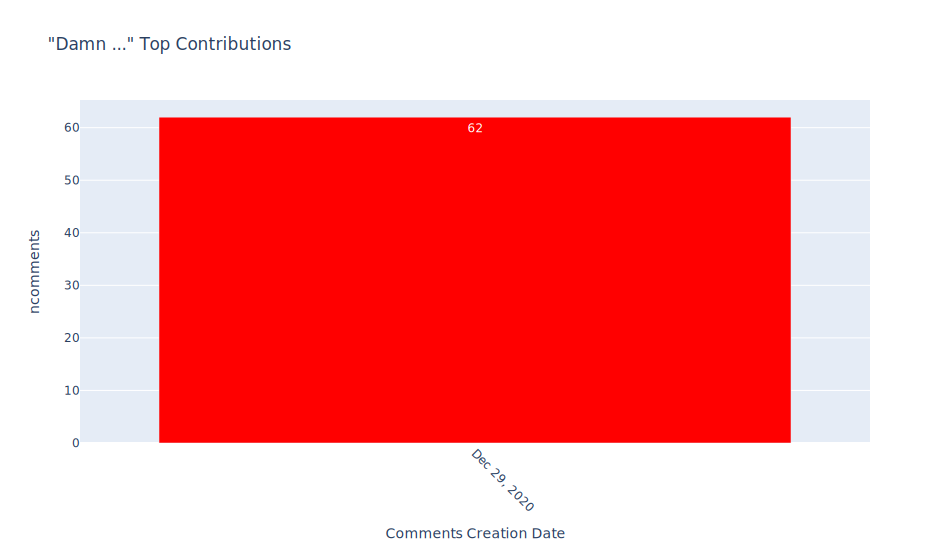

In [149]:
helpers.contr_peaks(df_comments, "Damn ...", n=5, threshold=0)

In [150]:
df_comments[df_comments.username == 'Damn ...'].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    62
Name: text, dtype: int64

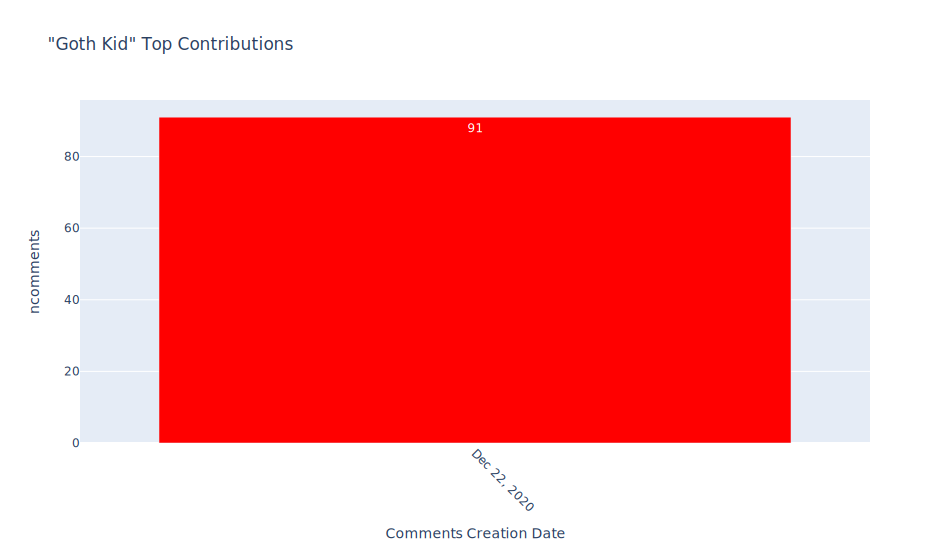

In [151]:
helpers.contr_peaks(df_comments, "Goth Kid", n=5, threshold=0)

In [152]:
df_comments[df_comments.username == 'Goth Kid'].text.value_counts().head(60)

#justiceforjohnny #youtubesupportsabusers    38
#justiceforjohnny                            31
#youtubesupportsabusers                      22
Name: text, dtype: int64

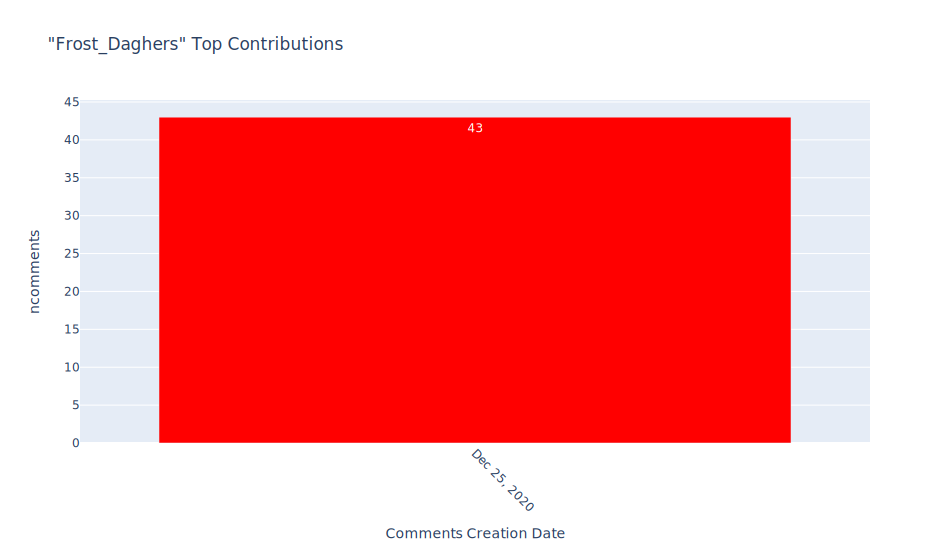

In [153]:
helpers.contr_peaks(df_comments, "Frost_Daghers", n=5, threshold=0)

In [154]:
df_comments[df_comments.username == 'Frost_Daghers'].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    43
Name: text, dtype: int64

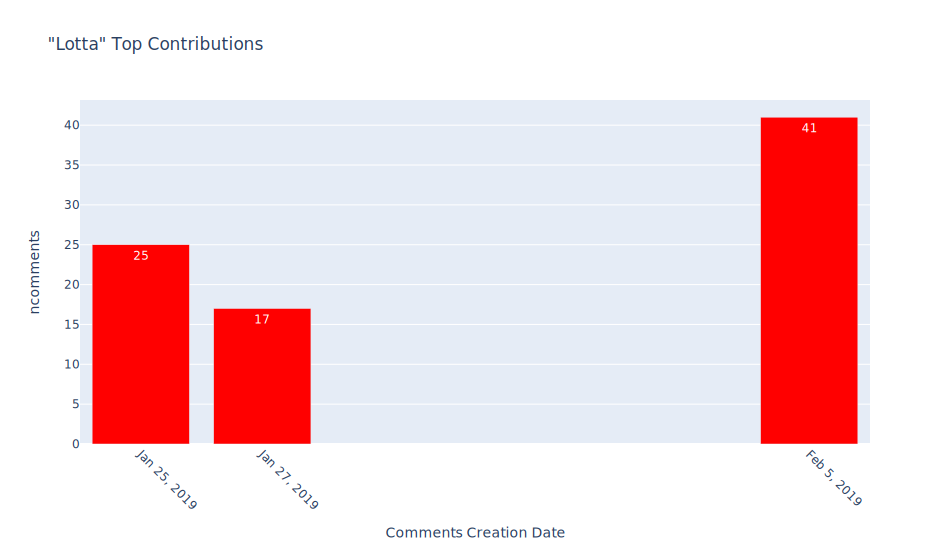

In [155]:
helpers.contr_peaks(df_comments, "Lotta", n=3, threshold=0)

In [156]:
df_comments[df_comments.username == 'Lotta'].text.value_counts().head(60)

slim fill the allegations of him throwing iphone at her were fake you should do your research before you doom a good innocent person there were shitton of evidence proving she was lying: she herself was arrested for domestig violence and she even had to go to court because of it 1 she first asked for divorce and 50k month suppousal support (even when they did not have kids and were marrued 13 months) she also asked for all the cars houses and the dogs 2 when she got denied she made the allegations (btw she asked for divorce day later his mother died) her only edivence was pictures of her bruises that you could easily do with makeup or just drop a phone to your face their housekeeper said she saw amber without makeup next day and without bruise the fucking police filed a report saying there were no sign of violence whatsoever (they were called when they were fighting but left after amber asked and saw no sign of any violence) their bodyquards who were there when it was happening said th

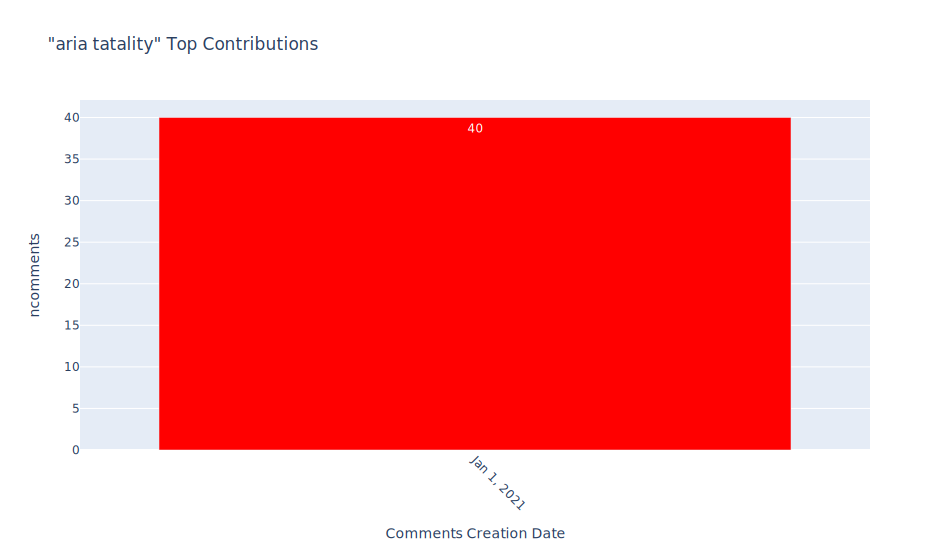

In [157]:
helpers.contr_peaks(df_comments, "aria tatality", n=5, threshold=0)

In [158]:
df_comments[df_comments.username == 'aria tatality'].text.value_counts().head(60)

your lies have been revealed to us you are not a victim you are just a traitor and a scoundrel who made our dear johnny depp sick    40
Name: text, dtype: int64

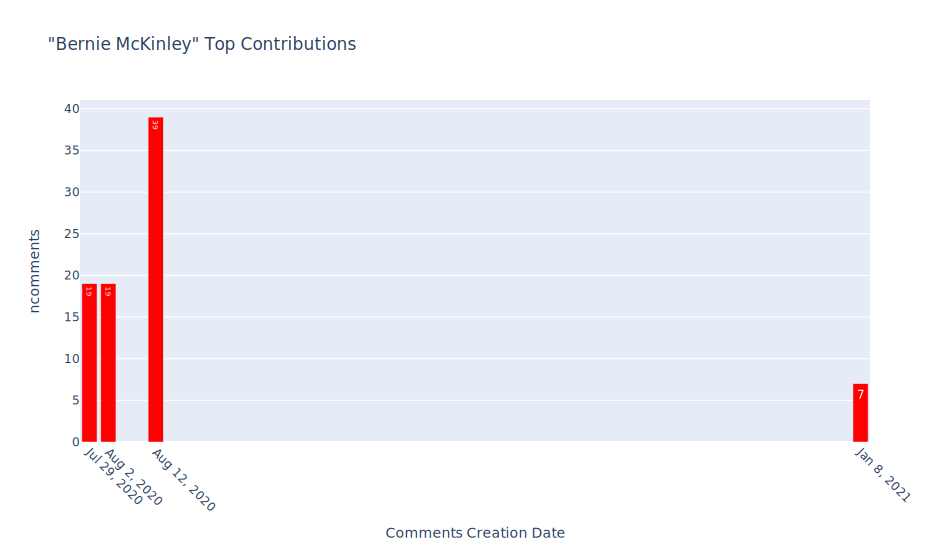

In [159]:
helpers.contr_peaks(df_comments, "Bernie McKinley", n=4, threshold=0)

In [160]:
df_comments[df_comments.username == 'Bernie McKinley'].text.value_counts().head(60)

https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      15
sign the petition to remove amber heard from aquaman 2 changeorg https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2                                                                                                                                                                                                                                                                                                                            

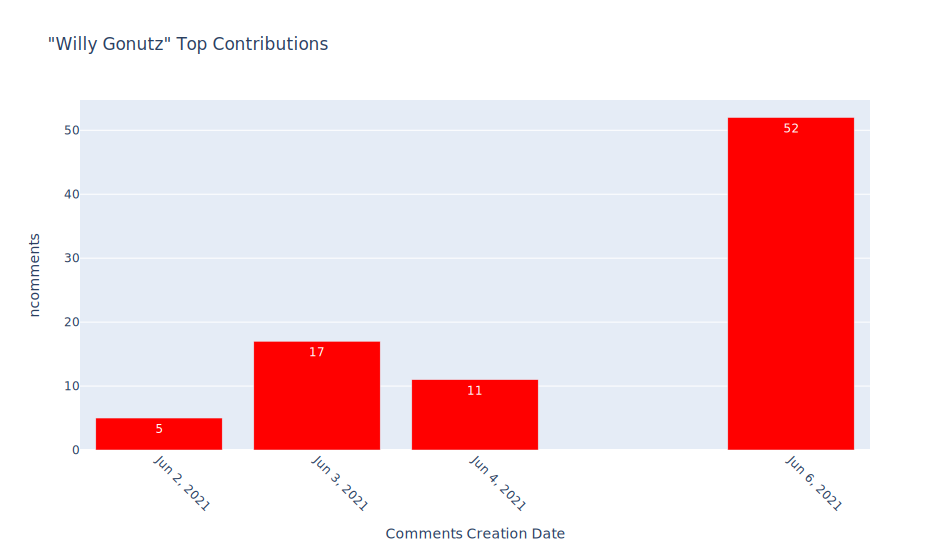

In [161]:
helpers.contr_peaks(df_comments, "Willy Gonutz", n=4, threshold=0)

In [162]:
df_comments[df_comments.username == 'Willy Gonutz'].text.value_counts().head(60)

remove ah from aquaman 2 sign the petition at: https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2 18 million signatures and counting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

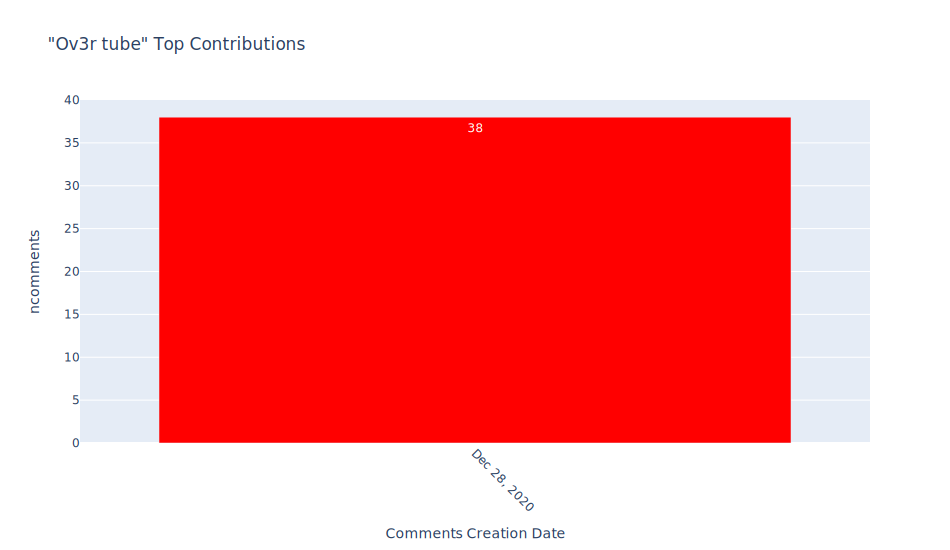

In [163]:
helpers.contr_peaks(df_comments, "Ov3r tube", n=5, threshold=0)

In [164]:
df_comments[df_comments.username == 'Ov3r tube'].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    38
Name: text, dtype: int64

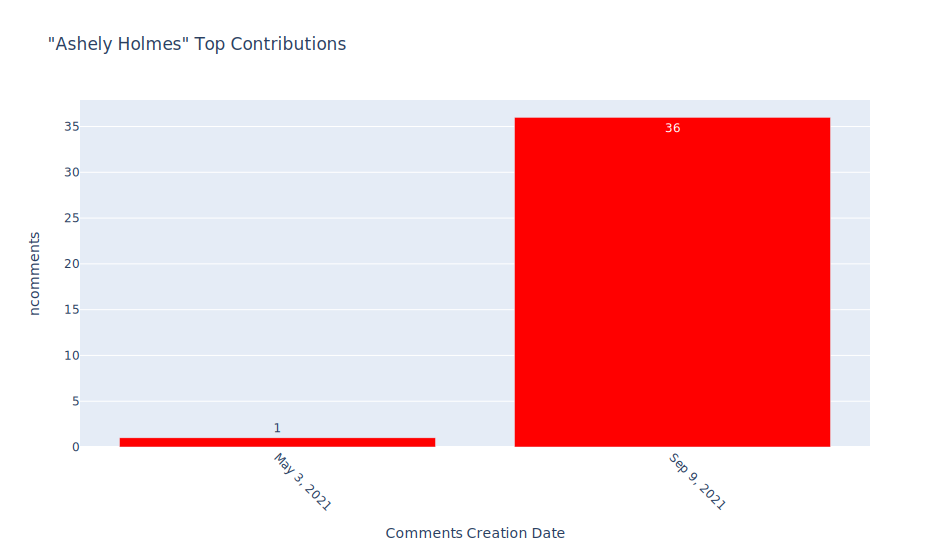

In [165]:
helpers.contr_peaks(df_comments, "Ashely Holmes", n=5, threshold=0)

In [166]:
df_comments[df_comments.username == "Ashely Holmes"].text.value_counts().head(60)

they have proof that she was the one being violent proof that she got makeup done to make it look like bruises proof that jd was the only one who had physical abuse and proof that jd is completely calm while she is trying to get a rise out of him because she wants to fight and he doesn't and proof that she was actively trying to ruin his career because she is a psychotic person who can't stand being dumped by a man!!! how is this still a question on who's the abuser?! how has this case not been solved? how is her career thriving while his is ending? all of his ex's came forward to tell everyone that jd was never abusive to them and always kind! how with all of this proof is she still the victim?! how has she not lost the case yet?! i'm completely baffled! this is the most ridiculous thing i've ever heard and seen! she is nothing but a complete and total psychopath who gets off on ruining the lives of anyone who dare try to get her out of their lives! she not only gets off on it but abs

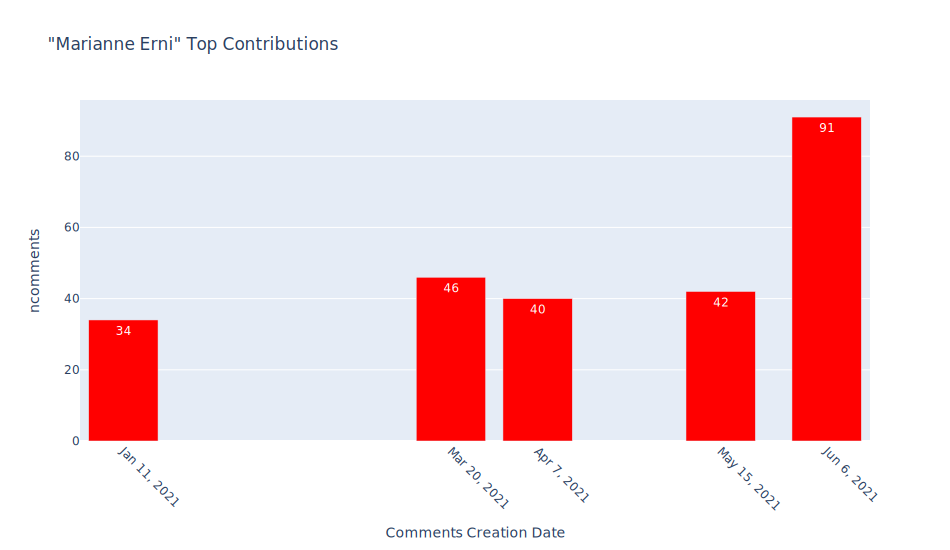

In [167]:
helpers.contr_peaks(df_comments, "Marianne Erni", n=5, threshold=0)

In [168]:
df_comments[df_comments.username == 'Marianne Erni'].text.value_counts().head(60)

she tryes so hard to come over as sophisticated but she just is horrible and arrogant                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1
i really do hope so she really is protected by rich men                                                                                                                                                                                                                                                                                                                                                                                                               

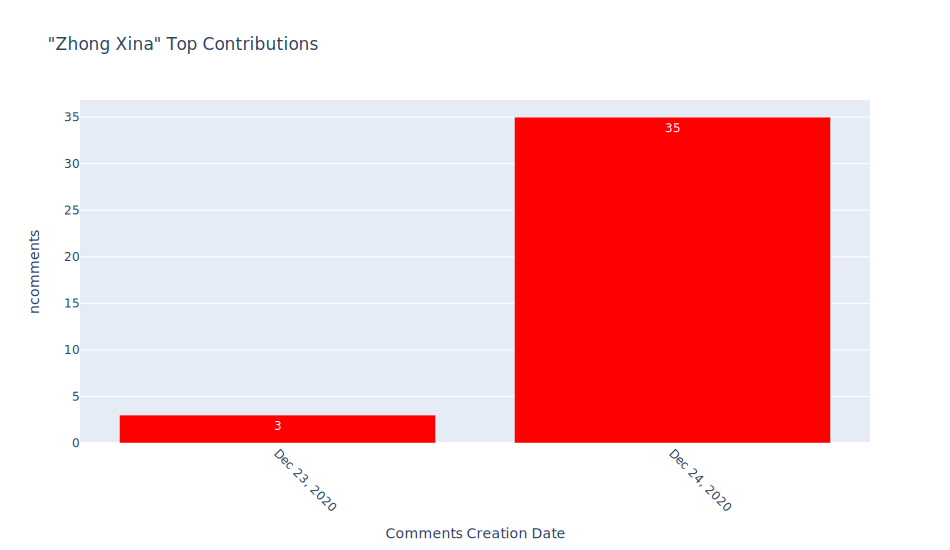

In [169]:
helpers.contr_peaks(df_comments, "Zhong Xina", n=2, threshold=0)

In [170]:
df_comments[df_comments.username == "Zhong Xina"].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    38
ok but why                                                           1
principal* i'm sorry                                                 1
Name: text, dtype: int64

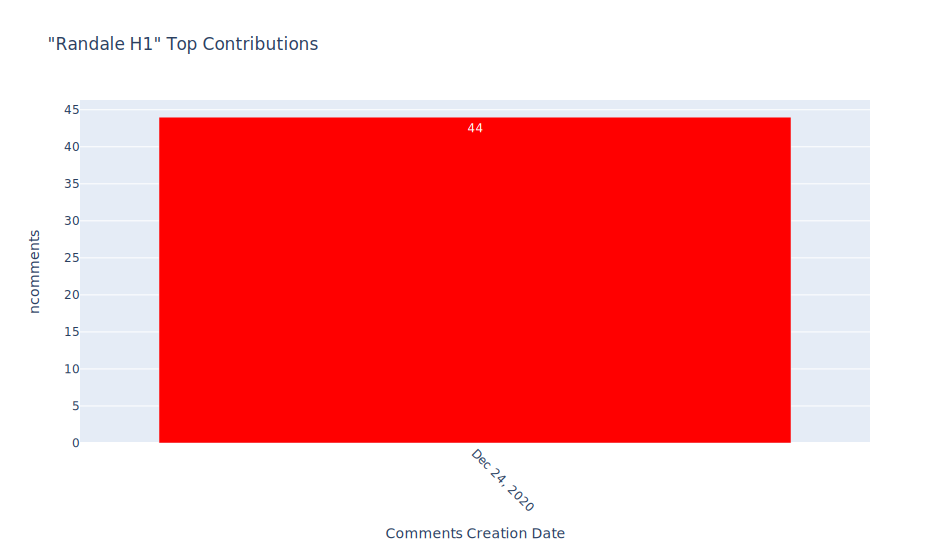

In [171]:
helpers.contr_peaks(df_comments, "Randale H1", n=5, threshold=0)

In [172]:
df_comments[df_comments.username == "Randale H1"].text.value_counts().head(60)

tell the world johnny tell them i johnny depp a man i'm a victim too of domestic violence and see how many people believe or side with you isn't that the real wording of her? or are you a parrot? of course it means the same but it seems to be a little bit hyprocritical to make a point with wrong arguments/quotes? pls proof me wrong!    18
tell the world johnny tell them i johnny depp a man i'm a victim too of domestic violence and see how many people believe or side with you isn't that the real wording of her? of course it means the same but it seems to be a little bit hyprocritical to make a point with wrong arguments? pls proof me wrong!                                 8
tell the world johnny tell them i johnny depp a man i'm a victim too of domestic violence and see how many people believe or side with you isn't that the real wording of her? of course it means the same but it seems to be a little bit hyprocritical to make a point with wrong arguments/quotes? pls proof me wrong!     

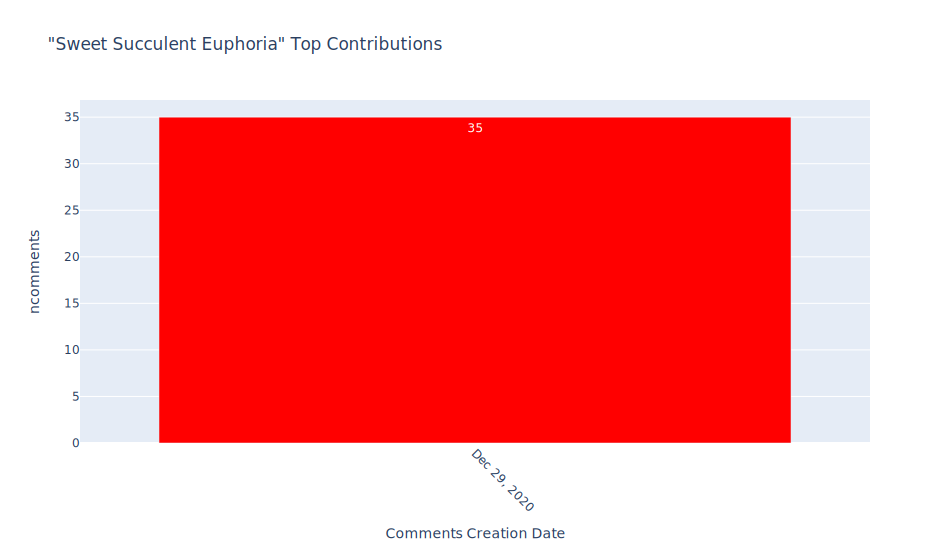

In [173]:
helpers.contr_peaks(df_comments, "Sweet Succulent Euphoria", n=5, threshold=0)

In [174]:
df_comments[df_comments.username == "Sweet Succulent Euphoria"].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    35
Name: text, dtype: int64

<br>

<a id='victim'></a>
>> ## Contains "Victim"
> <ul>
 <li><a href="#negative_comments">Negative Comments</a></li>
    <li><a href="#victim"><b>Contains "Victim"</b></a></li>
 <li><a href="#no_victim">Negative Comments Without "Victim"</a></li>
 </ul>

In [175]:
df_victim = df_comments[df_comments.text.str.contains('victim')]
print(df_victim.shape)

(103766, 20)


In [176]:
# exclude all the users with positive comments
df_victim = df_victim[~df_victim.username.isin(pos_users)]
print(df_victim.shape)
df_victim.head(2)

(101668, 20)


video_id                 comment_etag                  comment_id  \
2031  MZGyGk0xBlw  cz-SMsQ5YsMXCcFcofJ-_UQK_j0  UgybCR6PJSFIo6r2SoB4AaABAg   
4350  ytIfSuy_mOA  nINkcugZNvHUeUwYFyBb5LlbYw0  Ugz5XLZu8khN6WD96fN4AaABAg   

                                                   text           username  \
2031  she chose jail? talk about cut of your nose to...  Tennille Sinclair   
4350  transplanted niggas from africa to jamaica hap...         Yoli Goodi   

                  author_ch_id  nlikes                   p_dtime  \
2031  UCtKqWUdvuCILr3ztDYBMqMw     0.0 2013-01-20 06:09:50+00:00   
4350  UCLXEPLpoMh3-YCiS950bxFw     0.0 2013-05-18 17:16:57+00:00   

                       u_dtime  nreplies moderation_status comment_reply  \
2031 2013-01-20 06:09:50+00:00       0.0               NaN       comment   
4350 2013-05-18 17:16:57+00:00       0.0               NaN       comment   

     parent_id author_ch_url author_profile_image  year       date month  \
2031      none          none                 none  2013 2013-01-20   Jan   
4350      none          none                 none  2013 2013-05-18   May   

      dayofmonth  hour  
2031          20     6  
4350          18    17

### A Heat Map for the Comments Containing "Victim" 


Note: The Peaks on Feb, Dec 2020



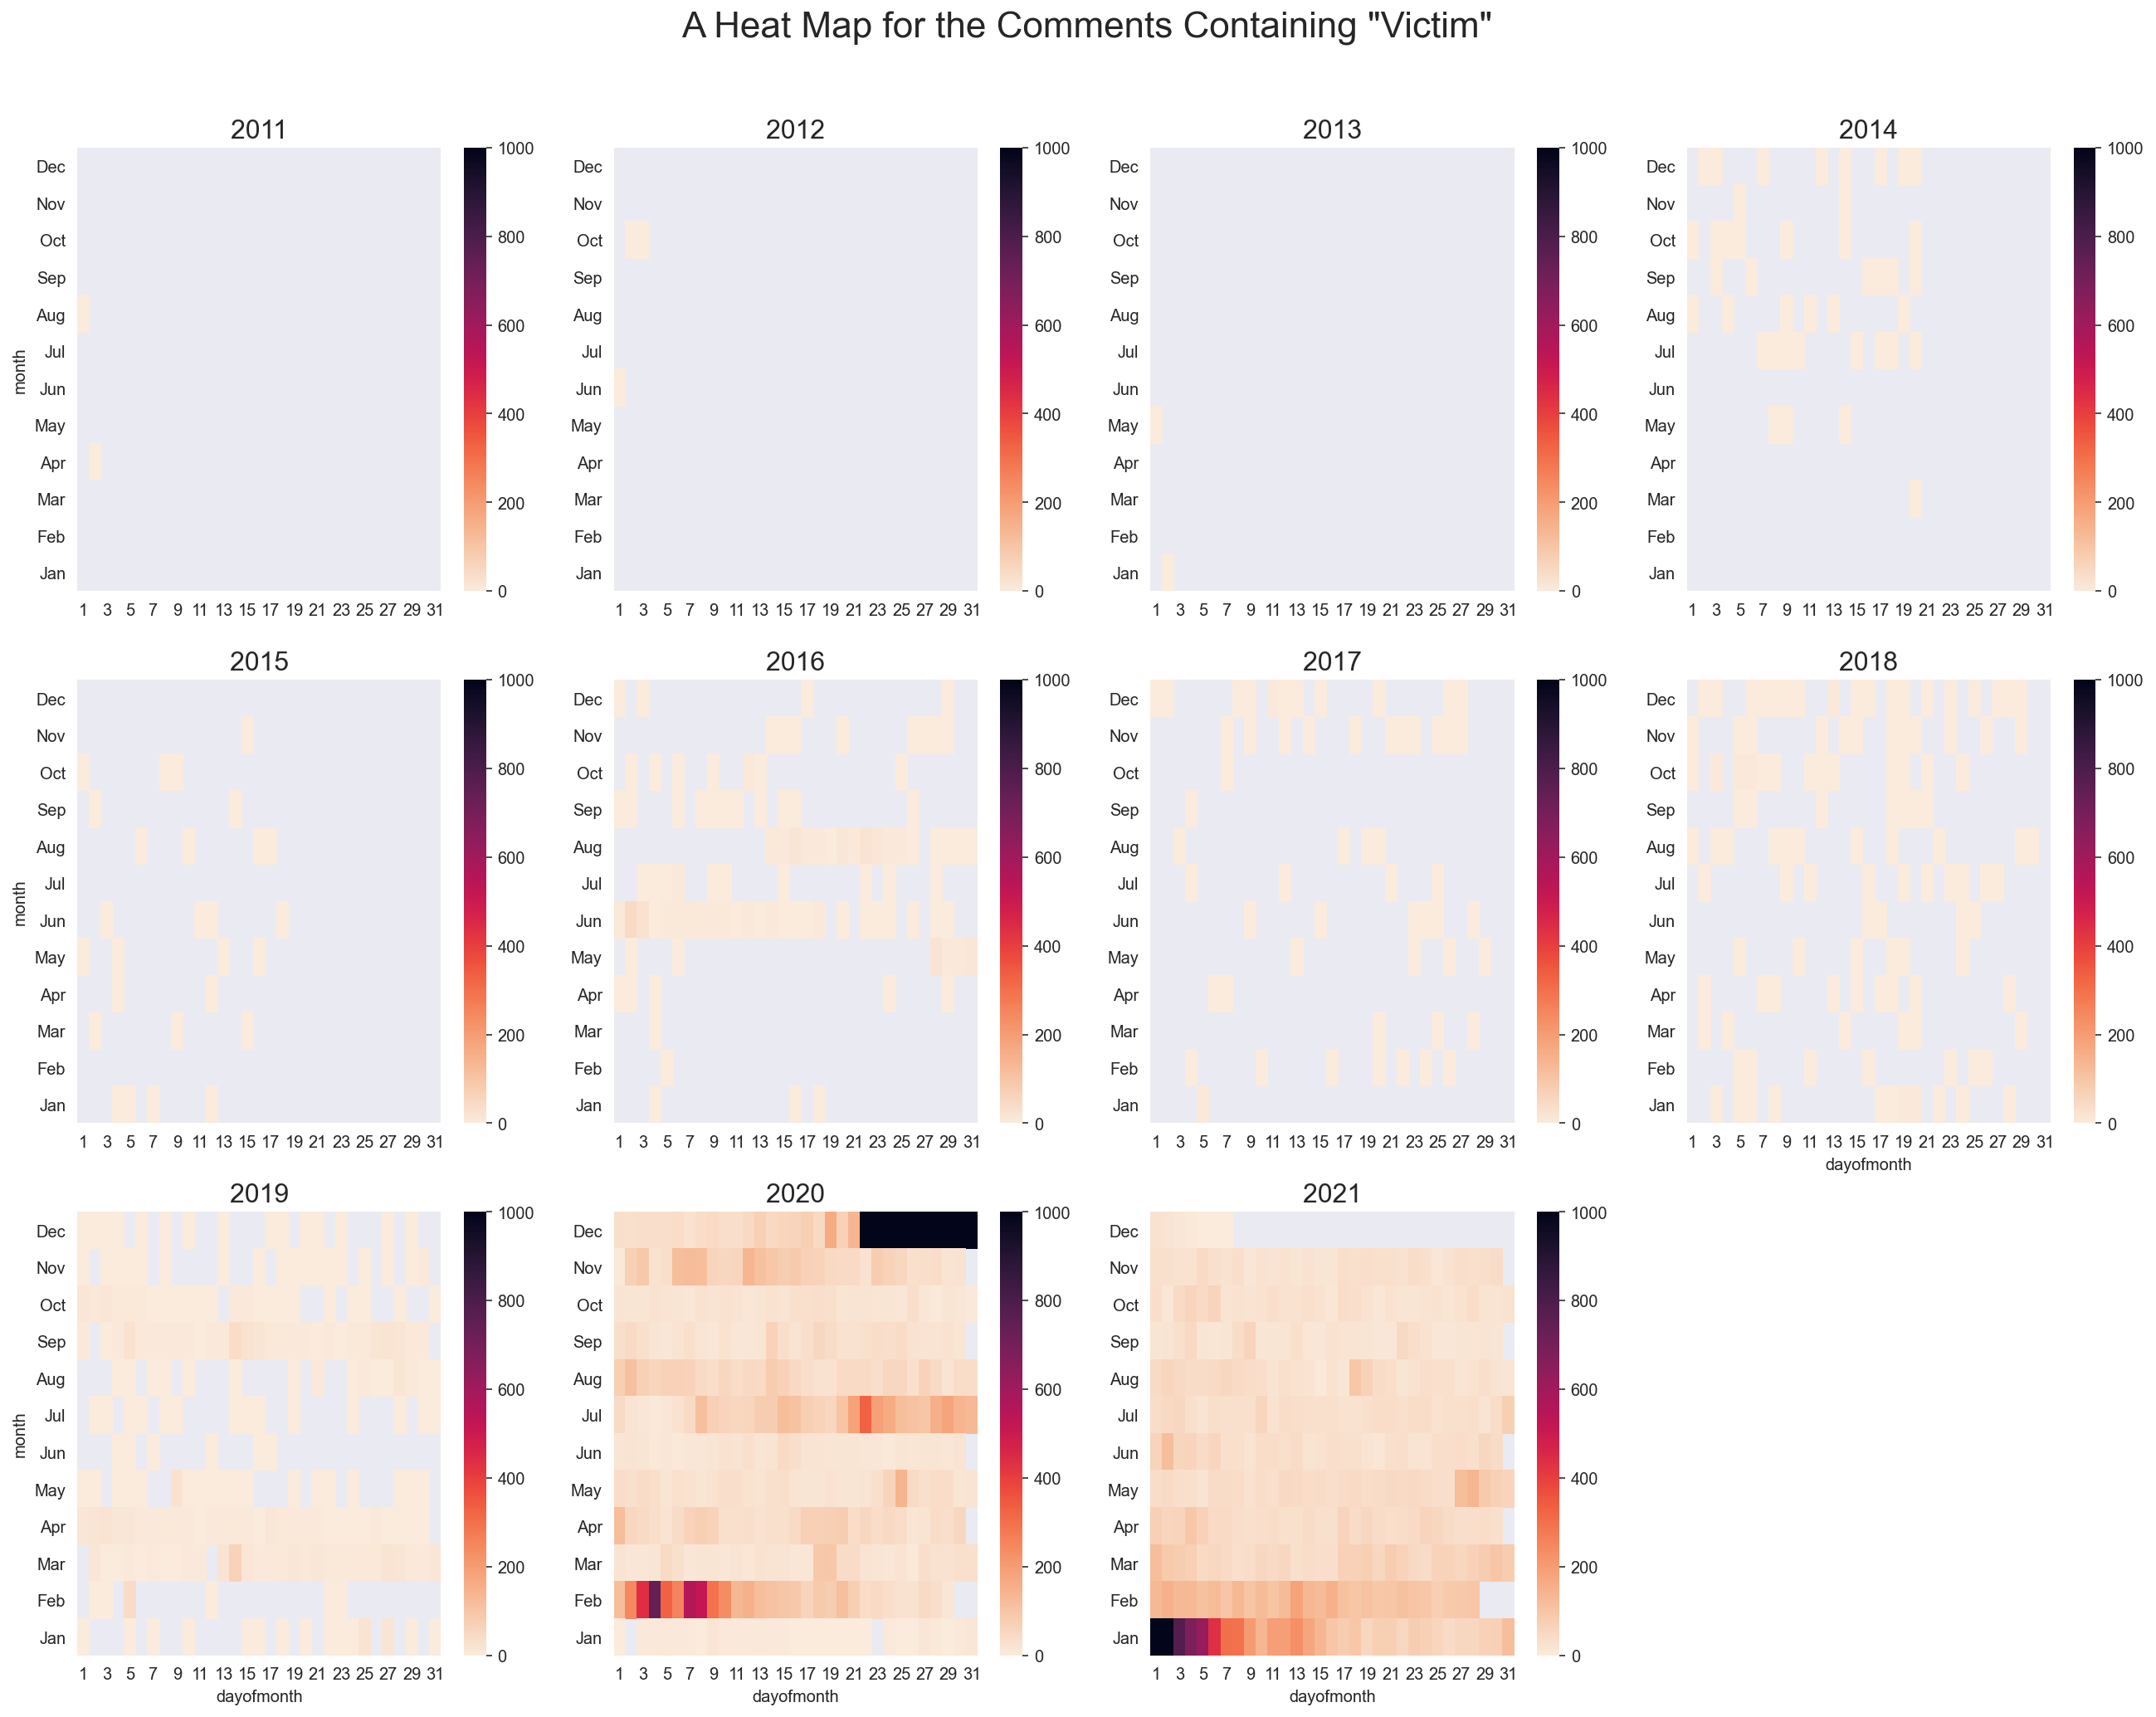

In [177]:
victim_daily = df_victim.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ncomments')

print('\nNote: The Peaks on Feb, Dec 2020\n')
title = 'A Heat Map for the Comments Containing "Victim"'
helpers.facet_heat(victim_daily, title, n_col=4, vmax=1000)

In [178]:
df_victim.username.nunique()

84241

### Top Users with Comments Containing "victim" keyword

In [179]:
df_nvictim = df_victim.groupby('username').agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'})

print(df_nvictim.shape)
df_nvictim = df_nvictim.sort_values('ncomments', ascending=False)
df_nvictim.head(15)


(84241, 4)


username  ncomments  nreplies  nlikes
32814                            Julie Lea        140      23.0   616.0
38691                                Lotta         79       0.0    35.0
67181                       Yalonda Howell         77      70.0   179.0
15222                             Damn ...         62       0.0    17.0
61293           The Amber Heard Playlist!!         61      29.0     3.0
11517                        Carmen Castro         59      18.0   750.0
14338                            Crispy Co         54      28.0   754.0
32903                          June Harris         52      14.0   407.0
73578                               k. _nf         52      17.0  2029.0
36778                       Laura Peterson         50      17.0   223.0
40921                        Marianne Erni         47       5.0   118.0
62598                            Tiffany C         45      18.0   138.0
84060  ل´ ل´‡ل´„ل´›ل´ڈت€ل´‡ل´…ل´›تœةھل´„ x         44      10.0   879.0
51093                      Queen Babylonia         44      11.0   326.0
22669                        Frost_Daghers         43       0.0    10.0

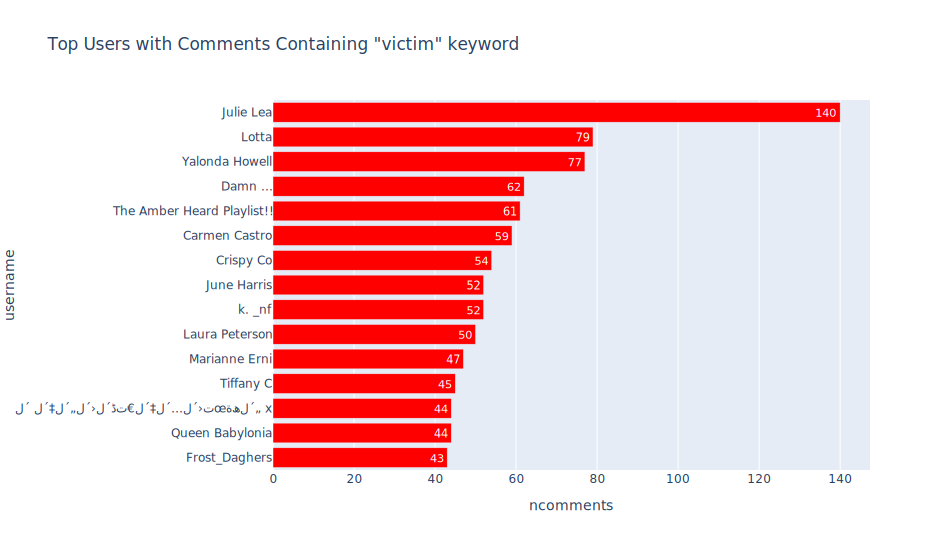

In [180]:
helpers.barh(df_nvictim[['username', 'ncomments']].head(15), 
             'Top Users with Comments Containing "victim" keyword', threshold=0)

### "victim" Users Contributions on Each Date

In [181]:
df_v = df_victim.groupby(['date', 'username']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df_v.head(15)


date                             username  ncomments  nlikes  \
64417 2020-12-29                             Damn ...         62    17.0   
34434 2020-12-25                        Frost_Daghers         43    10.0   
75574 2021-01-01                        aria tatality         40     0.0   
729   2019-02-05                                Lotta         40    10.0   
60587 2020-12-28                            Ov3r tube         38   210.0   
92893 2021-09-09                        Ashely Holmes         36    35.0   
77229 2021-01-02  ل´ ل´‡ل´„ل´›ل´ڈت€ل´‡ل´…ل´›تœةھل´„ x         36    27.0   
31026 2020-12-24                           Randale H1         35     9.0   
32249 2020-12-24                           Zhong Xina         35  1582.0   
66805 2020-12-29             Sweet Succulent Euphoria         35   981.0   
62971 2020-12-28                            you good?         35    12.0   
83815 2021-02-13                          My thoughts         33   232.0   
22903 2020-12-23                         Kabir Mishra         33     0.0   
73577 2020-12-31                      Sophia Cabaأ±ez         32     9.0   
51928 2020-12-27                             Overtube         31   533.0   

       nreplies  
64417       0.0  
34434       0.0  
75574       1.0  
729         0.0  
60587       0.0  
92893       9.0  
77229       2.0  
31026       0.0  
32249       0.0  
66805       0.0  
62971       0.0  
83815       4.0  
22903       0.0  
73577       0.0  
51928       1.0

### "victim" Peak Dates

In [182]:
victim_dates = df_victim.groupby(['date']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

victim_dates.head(15)

date  ncomments    nlikes  nreplies
921 2020-12-27      12057  170498.0     535.0
920 2020-12-26       8860  167695.0     503.0
917 2020-12-23       7472  226336.0    1041.0
922 2020-12-28       7270   86219.0     332.0
918 2020-12-24       6816  230859.0     826.0
923 2020-12-29       5180   82651.0     427.0
924 2020-12-30       3929   69646.0     165.0
919 2020-12-25       3606   84320.0     327.0
925 2020-12-31       2268   42312.0     242.0
926 2021-01-01       1932   35628.0     261.0
927 2021-01-02       1422   21503.0      63.0
916 2020-12-22       1419   69472.0     266.0
928 2021-01-03        785   13233.0      89.0
594 2020-02-04        740   24873.0     542.0
929 2021-01-04        682   12924.0     142.0

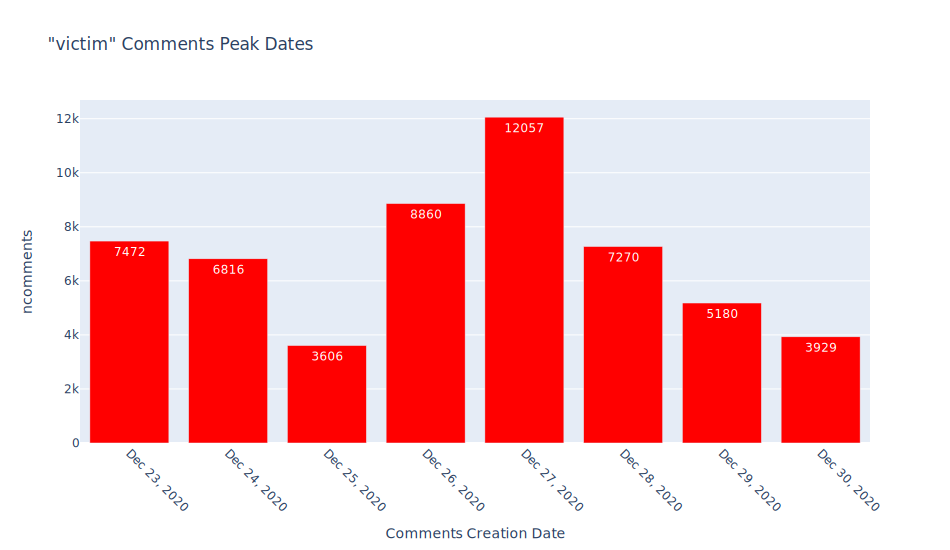

In [183]:
helpers.bar_peaks(victim_dates[['date', 'ncomments']].head(8), 
                  '"victim" Comments Peak Dates')

In [184]:
df_victim.text.value_counts().head(60)

they won't believe you because you are a man she is not a victim                                                                               43276
they won't believe you because you are a man amber heard she is not a victim                                                                    1595
they won't believe you because you are a man she is not the victim                                                                              1331
she is not a victim                                                                                                                             1109
they wont believe you because you are a man she is not a victim                                                                                 1019
they won't believe you because your a man she is not a victim                                                                                   1010
they won't believe you because you are a man she is not a victim!                                         

<br>

### More Investigations on Top Users Commented with "victim" Keyword

In [185]:
set(df_v.username.head(15)) - set(df_n.username.head(15))

{'Kabir Mishra', 'My thoughts', 'Overtube', 'Randale H1', 'Sophia Cabaأ±ez'}

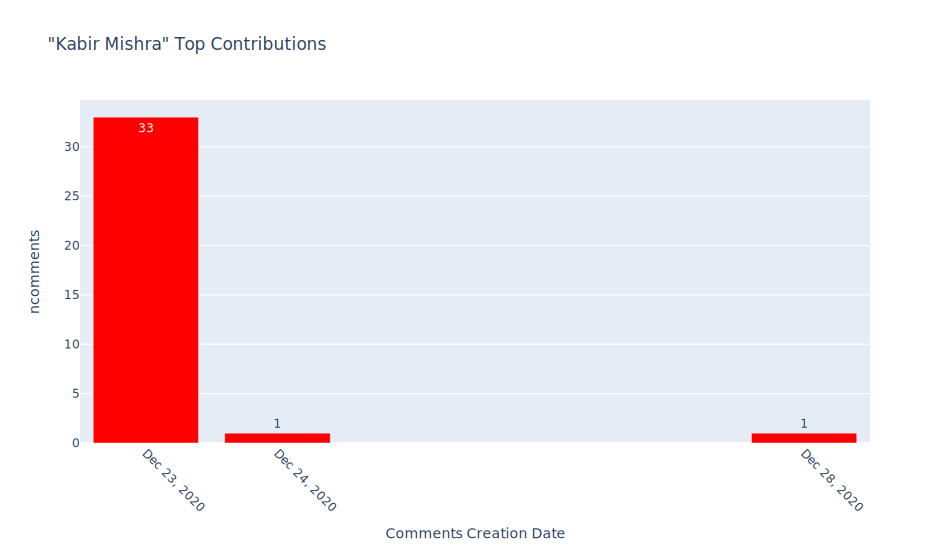

In [186]:
helpers.contr_peaks(df_comments, "Kabir Mishra", n=5, threshold=0)

In [187]:
df_comments[df_comments.username == "Kabir Mishra"].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    34
#justiceforjohnnydepp                                                1
Name: text, dtype: int64

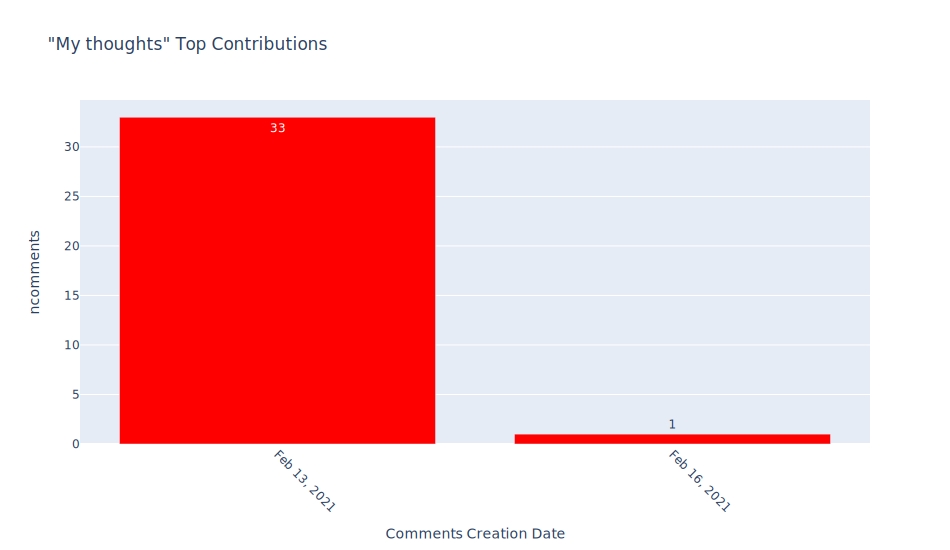

In [188]:
helpers.contr_peaks(df_comments, "My thoughts", n=5, threshold=0)

In [189]:
df_comments[df_comments.username == "My thoughts"].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim!                 33
@collin willoughs ok so called koolًںک‚ًںک‚u can do nothing ًں¥؛stupidًں‘چًںڈ»     1
Name: text, dtype: int64

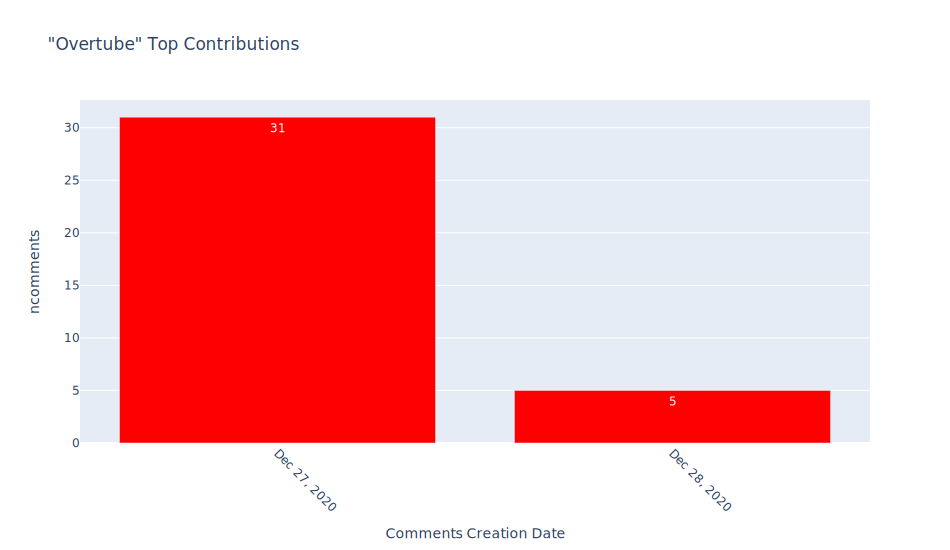

In [190]:
helpers.contr_peaks(df_comments, "Overtube", n=5, threshold=0)

In [191]:
df_comments[df_comments.username == "Overtube"].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    35
@mionfel trying my best to do 100 replies fuck errors                1
Name: text, dtype: int64

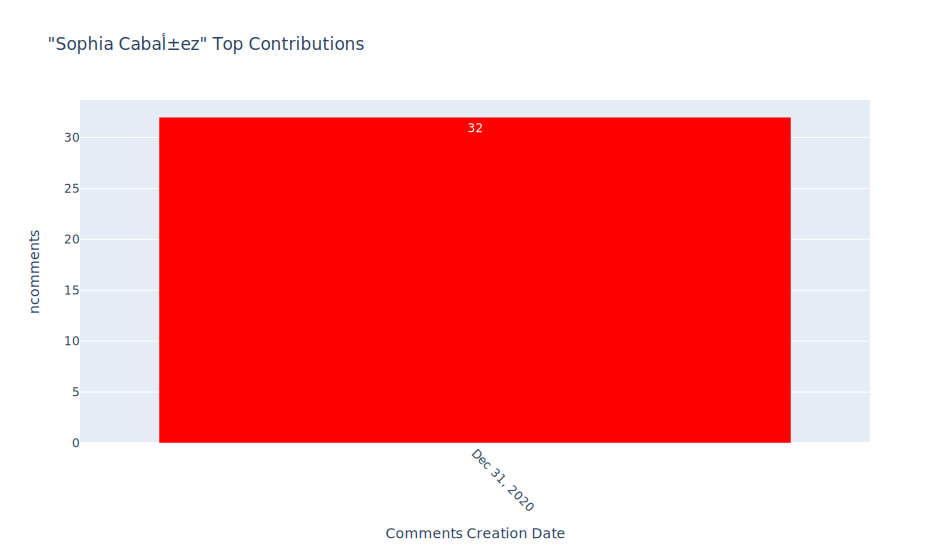

In [192]:
helpers.contr_peaks(df_comments, "Sophia Cabaأ±ez", n=5, threshold=0)

In [193]:
df_comments[df_comments.username == "Sophia Cabaأ±ez"].text.value_counts().head(60)

*she is not a victim*                                                 17
they won't believe you because you are a man *she is not a victim*    15
Name: text, dtype: int64

<br>

<a id='no_victim'></a>
>> ## Negative Comments Without "Victim"
> <ul>
 <li><a href="#negative_comments">Negative Comments</a></li>
 <li><a href="#victim">Contains "Victim"</a></li>
    <li><a href="#no_victim"><b>Negative Comments Without "Victim"</b></a></li>
 </ul>

In [194]:
# Create a negative dataframe without 'victim' keyword --> to see more negative text variations
df_neg = df_neg_total[~df_neg_total.text.str.contains('victim')]
print(df_neg.shape)
df_neg.head(2)

(279558, 20)


video_id                 comment_etag                  comment_id  \
39   VPUUrdgxIa8  N0IcnfXWAATmNc7PATmVsXq5-58  UgycOQe20TUYIOyB5zR4AaABAg   
120  VPUUrdgxIa8  qorqkViON0Ig3VMl0EmlAvX5H3E  UgztIGiBkAiBgyO03rR4AaABAg   

                                                  text            username  \
39   whoa hold on there buddy are you saying that p...  lowdownshakinchill   
120  it was part of an idiotic series of comments w...               jsssm   

                 author_ch_id  nlikes                   p_dtime  \
39   UCCOdIP_feMgW00kp1fiE8fg     0.0 2013-09-01 18:55:13+00:00   
120  UCv0UUMS3TZgn68PnWDWAVpw     0.0 2013-08-15 22:56:15+00:00   

                      u_dtime  nreplies moderation_status comment_reply  \
39  2013-09-01 18:55:13+00:00       0.0               NaN       comment   
120 2013-08-15 22:56:15+00:00       0.0               NaN       comment   

    parent_id author_ch_url author_profile_image  year       date month  \
39       none          none                 none  2013 2013-09-01   Sep   
120      none          none                 none  2013 2013-08-15   Aug   

     dayofmonth  hour  
39            1    18  
120          15    22

In [195]:
df_neg.text.value_counts().head(60)

exposed                                                                                                                                                                                                                                                                                                                  752
amber turd                                                                                                                                                                                                                                                                                                               662
exposed!!!                                                                                                                                                                                                                                                                                                               517
abuser                                           

In [196]:
df_neg.text.value_counts()[60:].head(60)

@johnny depp do not reply fake johnny scammer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [197]:
df_neg.text.value_counts()[120:].head(60)

amber heard is a liar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [198]:
df_neg.text.value_counts()[180:].head(60)

because she is a woman                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [199]:
df_neg.text.value_counts()[240:].head(60)

she abused johnny depp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [200]:
df_neg.text.value_counts()[300:].head(60)

this woman is disgusting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [201]:
df_neg.text.value_counts()[360:].head(60)

fuck you bitch                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

<br>

<a id='top_peaks'></a>
>## Comments on Peak Days
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks"><b>Comments on Peak Days</b></a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

<a id='peak_dates'></a>
>>### Comments on Peak Dates
> <ul>
 <li><a href="#peak_dates"><b>Comments on Peak Dates</b></a></li> 
 <li><a href="#users_peak_dates">Users with The Most Contributions on Each Date</a></li>
 </ul>

In [202]:
df_comments.head(1)

video_id                 comment_etag            comment_id        text  \
0  DiXRVYRZchs  mvtTos5huTqXhtAs-JPzt7mls_A  UgjyORuX3p35VXgCoAEC  good work!   

        username              author_ch_id  nlikes                   p_dtime  \
0  Shocka Delica  UC6cJzw3ChENHVREKzpx1e3Q     9.0 2013-11-29 05:18:47+00:00   

                    u_dtime  nreplies moderation_status comment_reply  \
0 2013-11-29 05:18:47+00:00       1.0               NaN       comment   

  parent_id author_ch_url author_profile_image  year       date month  \
0      none          none                 none  2013 2013-11-29   Nov   

   dayofmonth  hour  
0          29     5

### Peak Dates

In [203]:
df_peaks.head(10)

date  ncomments
3220 2018-07-22      26021
4105 2020-12-23      20907
3219 2018-07-21      18536
4109 2020-12-27      18206
4106 2020-12-24      16771
4104 2020-12-22      15584
4108 2020-12-26      14771
3782 2020-02-04      14349
4110 2020-12-28      12246
3785 2020-02-07      11204

### 2018-07-22 --> (26021 comments)

In [204]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2018-07-22"]["text"].value_counts().head()

awesome        66
wow            54
nice           27
black manta    25
meh            22
Name: text, dtype: int64

Fuck off     
5

Shut up bitch! If you liked the visual effects in recent movies like Avengers: Infinity War, Black Panther, or Ready Player One, then youâ€™ll be happy to know that the same company is also working on Aquaman ;)    
4

## <font color='red'><b>Note:</b> Most 2020 peaks are Negative Comments</font>

### 2020-12-23 --> (20907 comments)
<font color='red'>Negative Comments</font>

In [205]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-23"]["text"].value_counts().head(10)

they won't believe you because you are a man she is not a victim                4289
they won't believe you because you are a man amber heard she is not a victim     511
they won't believe you because you are a man                                     260
they won't believe you because you are a man amber heard                         213
they won't believe you because you are a man she is not the victim               158
justice for johnny                                                               141
she is not a victim                                                              137
#justiceforjohnny                                                                121
they won't believe you because your a man she is not a victim                     89
#justiceforjohnnydepp                                                             89
Name: text, dtype: int64

In [206]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-23"]["username"].value_counts().head(10)

Stevie J Raw                   49
ذگذ½ذ´ر€ذµذ¹ ذ’ذ¾ذµذ¹ذ؛ذ¾      36
Kabir Mishra                   33
eHacker                        30
ذ رƒرپذ»ذ°ذ½ ذ”ذ°ذ²ر‹ذ´ذ¾ذ²    28
netwix                         21
John Dickey                    17
Promptus Mortis                16
Topher                         16
Gle773                         15
Name: username, dtype: int64

### 2018-07-21 --> (18536 comments)

In [207]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2018-07-21"]["text"].value_counts().head()

wow         37
awesome     33
first       17
i dig it    16
epic        16
Name: text, dtype: int64

Badass                
8

### 2020-12-27 --> (18206 comments)
<font color='red'>Negative Comments</font>

In [208]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-27"]["text"].value_counts().head(10)

they won't believe you because you are a man she is not a victim      9186
they won't believe you because you are a man she is not the victim     256
they wont believe you because you are a man she is not a victim        210
they won't believe you because you are a man she is not a victim!      143
they won't believe you because you are a man                           112
good soldiers follow orders                                             99
she is not a victim                                                     98
they won't believe youbecause you are a man she is not a victim         95
they won't belive you because you are a man she is not a victim         85
they won't believe you because your a man she is not a victim           84
Name: text, dtype: int64

### 2020-12-24 --> (16771 comments)
<font color='red'>Negative Comments</font>

In [209]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-24"]["text"].value_counts().head(10)

they won't believe you because you are a man she is not a victim      4153
they won't believe you because you are a man she is not the victim     239
she is not a victim                                                    165
they won't believe you because you are a man                           136
#justiceforjohnnydepp                                                  123
they wont believe you because you are a man she is not a victim        102
they won't believe you because you are a man she is not a victim!       81
#justiceforjohnny                                                       72
they won't believe you because your a man she is not a victim           72
justice for johnny                                                      59
Name: text, dtype: int64

### 2020-12-22 --> (15584 comments)
<font color='red'>Negative Comments</font>

In [210]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-22"]["text"].value_counts().head(10)

they won't believe you because you are a man amber heard                        1738
they won't believe you because you are a man amber heard she is not a victim     594
they wont believe you because you are a man amber heard                          264
justice for johnny                                                               255
execute order 66                                                                 209
they won't believe you because your a man amber heard                            173
they won't believe you because you are a man                                     157
#justiceforjohnny                                                                144
excecute order 66                                                                102
justice for johnny depp                                                           51
Name: text, dtype: int64

### 2020-12-26 --> (14771 comments)
<font color='red'>Negative Comments</font>

In [211]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-26"]["text"].value_counts().head(10)

they won't believe you because you are a man she is not a victim      6427
they won't believe you because you are a man she is not the victim     200
they wont believe you because you are a man she is not a victim        198
good soldiers follow orders                                            151
they won't believe you because you are a man she is not a victim!      139
she is not a victim                                                    109
they won't believe you because you are a man                            91
they won't believe you because your a man she is not a victim           77
they won't belive you because you are a man she is not a victim         77
they won't believe youbecause you are a man she is not a victim         51
Name: text, dtype: int64

### 2020-02-04 --> (14349 comments)
<font color='red'>Negative Comments</font>

In [212]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-02-04"]["text"].value_counts().head(10)

that's toxic femininity so sad                                                                                                                                                                                                                     10
#justiceforjohnnydepp                                                                                                                                                                                                                              10
yang gang                                                                                                                                                                                                                                           8
#justiceforjohnny                                                                                                                                                                                                                                   7
wow             

### 2020-12-28 --> (12246 comments)
<font color='red'>Negative Comments</font>

In [213]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-12-28"]["text"].value_counts().head(10)

they won't believe you because you are a man she is not a victim      5543
they wont believe you because you are a man she is not a victim        121
they won't believe you because you are a man she is not a victim!       89
they won't believe you because you are a man she is not the victim      88
they won't believe you because you are a man                            74
she is not a victim                                                     73
that's crazy                                                            51
they won't belive you because you are a man she is not a victim         46
they won't believe youbecause you are a man she is not a victim         39
they won't believe you because you are man she is not a victim          36
Name: text, dtype: int64

### 2020-02-07 --> (11204 comments)
<font color='red'>Negative Comments</font>

In [214]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2020-02-07"]["text"].value_counts().head(10)

#justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      15
#justiceforjohnny                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           9
please sign 

## Check 2019 Peaks
  - Oct 2, 2019
  - Oct 3, 2019
  - Oct 4, 2019

In [215]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2019-10-02"]["text"].value_counts().head(10)

first                   42
ًںک‚ًںک‚ًںک‚            39
lol                     26
ًںک‚ًںک‚ًںک‚ًںک‚        24
lmao                    18
ًںک‚ًںک‚                17
facts                   11
ًںک‚                    10
ًںک‚ًںک‚ًںک‚ًںک‚ًںک‚     8
ًں¤£ًں¤£ًں¤£             8
Name: text, dtype: int64

In [216]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2019-10-03"]["text"].value_counts().head(10)

ًںک‚ًںک‚ًںک‚            20
ًںک‚ًںک‚ًںک‚ًںک‚        19
ًںک‚                    16
lmao                    14
lol                     13
ًںک‚ًںک‚                10
facts                    8
lmfao                    8
ًںک‚ًںک‚ًںک‚ًںک‚ًںک‚     6
ًں¤£ًں¤£ًں¤£ًں¤£         4
Name: text, dtype: int64

In [217]:
df_comments[df_comments.p_dtime.dt.date.astype(str) == "2019-10-04"]["text"].value_counts().head(10)

ًںک‚ًںک‚ًںک‚ًںک‚ًںک‚        5
ًںک‚                        5
lol                         4
facts                       3
true                        3
ًںک‚ًںک‚ًںک‚                3
ًںک‚ًںک‚                    3
january turd                2
genius                      2
ًںک‚ًںک‚ًںک‚ًںک‚ًںک‚ًںک‚    2
Name: text, dtype: int64

<a id='users_peak_dates'></a>
>>### Users with The Most Contributions on Each Date
> <ul>
 <li><a href="#peak_dates">Comments on Peak Dates</a></li> 
 <li><a href="#users_peak_dates"><b>Users with The Most Contributions on Each Date</b></a></li>
 </ul>

In [218]:
# Top 10 Commanted Users
df_comments.username.value_counts().head(10)

Johnny Depp       15986
eHacker            8343
JOHNNY DEPP        3921
Stevie J Raw       3516
LaraCroftEyes1     3270
Michael Keaton     3148
Rock Candy         2455
Lindsey Depp       2432
Rob's Rules        2023
Johnny depp        1885
Name: username, dtype: int64

In [219]:
df = df_comments.groupby(['date', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df.head(15)

date     username  ncomments
1445127 2021-05-31  Johnny Depp        397
1370619 2021-04-18  Johnny Depp        293
1366799 2021-04-16  Johnny Depp        272
1459631 2021-06-07  Johnny Depp        270
1485213 2021-06-27  Johnny Depp        245
978519  2020-12-03  Abbey Sharp        233
1473404 2021-06-17  Johnny Depp        228
1670857 2021-11-24  Johnny Depp        200
1441845 2021-05-30  Johnny Depp        196
1365389 2021-04-15  Johnny Depp        192
1357645 2021-04-08  Johnny Depp        189
1474607 2021-06-18  Johnny Depp        188
980078  2020-12-04  Abbey Sharp        187
1558340 2021-08-14  Johnny Depp        185
1628432 2021-10-20  JOHNNY DEPP        185

<a id='top_hours'></a>
>## Comments on Peak Hours
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours"><b>Comments on Peak Hours</b></a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [220]:
df_comments.head(1)

video_id                 comment_etag            comment_id        text  \
0  DiXRVYRZchs  mvtTos5huTqXhtAs-JPzt7mls_A  UgjyORuX3p35VXgCoAEC  good work!   

        username              author_ch_id  nlikes                   p_dtime  \
0  Shocka Delica  UC6cJzw3ChENHVREKzpx1e3Q     9.0 2013-11-29 05:18:47+00:00   

                    u_dtime  nreplies moderation_status comment_reply  \
0 2013-11-29 05:18:47+00:00       1.0               NaN       comment   

  parent_id author_ch_url author_profile_image  year       date month  \
0      none          none                 none  2013 2013-11-29   Nov   

   dayofmonth  hour  
0          29     5

In [221]:
df_peak_hrs = df_comments.groupby(['date', 'hour']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df_peak_hrs.head(15)

date  hour  ncomments
46971 2018-07-21    20       6998
46970 2018-07-21    19       4877
66761 2020-10-24     8       4404
46972 2018-07-21    21       3152
49869 2018-11-19    17       2673
48789 2018-10-05    16       2527
48790 2018-10-05    17       1988
67301 2020-11-15    20       1949
46973 2018-07-21    22       1932
46976 2018-07-22     1       1789
76327 2021-11-26    22       1760
49870 2018-11-19    18       1760
46978 2018-07-22     3       1754
46977 2018-07-22     2       1732
48791 2018-10-05    18       1696

### Users with The Most Comments on the same hour

In [222]:
df = df_comments.groupby(['date', 'hour', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

print(df.shape)
df.head(15)

(1841765, 4)


date  hour       username  ncomments
1048832 2020-12-03    22    Abbey Sharp        158
1750361 2021-10-19     6  Cynthia Haney        131
1545545 2021-05-30     7    Johnny Depp        122
1029923 2020-11-22    23   Tyler Brooks        118
1513048 2021-05-18    16    Johnny Depp        113
1053297 2020-12-07     1    Abbey Sharp        112
1467828 2021-04-18    10    Johnny Depp        108
1581034 2021-06-17    21    Johnny Depp        106
1468040 2021-04-18    13    Johnny Depp        105
1564800 2021-06-07     4    Johnny Depp        104
1758686 2021-10-27     2    JOHNNY DEPP        100
977002  2020-11-03    16           ko 3         98
1549247 2021-05-31     6    Johnny Depp         96
1584306 2021-06-20    19    Johnny Depp         95
1463638 2021-04-16    13    Johnny Depp         95

<a id='top_times'></a>
>## Comments on Peak Times
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times"><b>Comments on Peak Times</b></a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [223]:
df_peak_times = df_comments.groupby('p_dtime').count()['text'].reset_index(name='ncomments')\
.sort_values('ncomments', ascending=False)

df_peak_times.head()

p_dtime  ncomments
1064279 2020-10-24 08:00:08+00:00         45
1064288 2020-10-24 08:00:17+00:00         42
1064282 2020-10-24 08:00:11+00:00         40
1064280 2020-10-24 08:00:09+00:00         38
1064289 2020-10-24 08:00:18+00:00         37

### <font color='red'>198 Users Commented more than one comment on the same Second</font>

In [224]:
df = df_comments.groupby(['p_dtime', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df = df[df.ncomments > 1]

print(f'Unique number of users: {df.username.nunique()}')
print(f'Total number of comments: {df.ncomments.sum()}')
df.head(15)

Unique number of users: 251
Total number of comments: 622


p_dtime                                  username  \
2127796 2021-11-26 15:32:57+00:00                               Manjal Jeet   
2047575 2021-10-11 06:13:33+00:00                            Kamlesh Paswan   
457304  2019-09-21 17:18:15+00:00                      Pancreas Dragonheart   
1435373 2021-01-16 15:56:30+00:00                              Pritam Kumar   
615285  2020-02-19 19:09:58+00:00                                  Baka Nyx   
439423  2019-07-16 11:06:22+00:00                lory991959 guzman carrasco   
601553  2020-02-14 19:09:41+00:00                            Valmir Marques   
481841  2019-11-22 16:17:36+00:00                          Saأ؛l Velأ،zquez   
1013976 2020-08-27 15:44:39+00:00                               Gigi Pretty   
1180863 2020-11-19 04:26:58+00:00                     Tania Yaأ±ez Paniagua   
481842  2019-11-22 16:18:47+00:00                          Saأ؛l Velأ،zquez   
615288  2020-02-19 19:10:53+00:00                                  Baka Nyx   
462193  2019-09-30 12:19:04+00:00                           TTأ«أں TTr1أ‘أ§   
1438850 2021-01-18 10:39:22+00:00                               Sudarshan S   
449815  2019-08-31 17:20:10+00:00  God's Commandments Are Truth Isaiah 8:20   

         ncomments  
2127796          8  
2047575          5  
457304           5  
1435373          4  
615285           4  
439423           4  
601553           4  
481841           4  
1013976          4  
1180863          4  
481842           4  
615288           4  
462193           4  
1438850          3  
449815           3

In [225]:
print('\nIdentical comments data on the same video\n')
df_comments[df_comments.p_dtime.astype(str) == "2021-10-11 06:13:33+00:00"]


Identical comments data on the same video



video_id                 comment_etag  \
1989960  SkFYO9ZPL8k  VRHu94tybF38ULRvdjSb3x83ZBc   
1989961  SkFYO9ZPL8k  cmYN4fRNP0q10Ir9CbkHxhpoT0s   
1989962  SkFYO9ZPL8k  JO860ewVq7c0Usi5K0190uBQbAg   
1989963  SkFYO9ZPL8k  uHKR72QYCoj6p0lBCRsqw6vj0cA   
1989964  SkFYO9ZPL8k  xZ1Px9QkOFtL_Hk4tguFbGjLvdU   

                                                comment_id text  \
1989960  UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcQPkUUz    x   
1989961  UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcQHRFw2    x   
1989962  UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcQ7afpz    x   
1989963  UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcPgzHuw    x   
1989964  UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcPShYaQ    x   

               username              author_ch_id  nlikes  \
1989960  Kamlesh Paswan  UCXKxgGGqges_m8JQkOo-1bw     0.0   
1989961  Kamlesh Paswan  UCXKxgGGqges_m8JQkOo-1bw     0.0   
1989962  Kamlesh Paswan  UCXKxgGGqges_m8JQkOo-1bw     0.0   
1989963  Kamlesh Paswan  UCXKxgGGqges_m8JQkOo-1bw     0.0   
1989964  Kamlesh Paswan  UCXKxgGGqges_m8JQkOo-1bw     0.0   

                          p_dtime                   u_dtime  nreplies  \
1989960 2021-10-11 06:13:33+00:00 2021-10-11 06:13:33+00:00       0.0   
1989961 2021-10-11 06:13:33+00:00 2021-10-11 06:13:33+00:00       0.0   
1989962 2021-10-11 06:13:33+00:00 2021-10-11 06:13:33+00:00       0.0   
1989963 2021-10-11 06:13:33+00:00 2021-10-11 06:13:33+00:00       0.0   
1989964 2021-10-11 06:13:33+00:00 2021-10-11 06:13:33+00:00       0.0   

        moderation_status comment_reply                   parent_id  \
1989960               NaN         reply  UgwRwi0f8PcwGh_4Dyx4AaABAg   
1989961               NaN         reply  UgwRwi0f8PcwGh_4Dyx4AaABAg   
1989962               NaN         reply  UgwRwi0f8PcwGh_4Dyx4AaABAg   
1989963               NaN         reply  UgwRwi0f8PcwGh_4Dyx4AaABAg   
1989964               NaN         reply  UgwRwi0f8PcwGh_4Dyx4AaABAg   

                                             author_ch_url  \
1989960  http://www.youtube.com/channel/UCXKxgGGqges_m8...   
1989961  http://www.youtube.com/channel/UCXKxgGGqges_m8...   
1989962  http://www.youtube.com/channel/UCXKxgGGqges_m8...   
1989963  http://www.youtube.com/channel/UCXKxgGGqges_m8...   
1989964  http://www.youtube.com/channel/UCXKxgGGqges_m8...   

                                      author_profile_image  year       date  \
1989960  https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...  2021 2021-10-11   
1989961  https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...  2021 2021-10-11   
1989962  https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...  2021 2021-10-11   
1989963  https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...  2021 2021-10-11   
1989964  https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...  2021 2021-10-11   

        month  dayofmonth  hour  
1989960   Oct          11     6  
1989961   Oct          11     6  
1989962   Oct          11     6  
1989963   Oct          11     6  
1989964   Oct          11     6

In [226]:
print('\nIdentical comments data on the same video\n')
df_comments[df_comments.p_dtime.astype(str) == "2019-09-21 17:18:15+00:00"]


Identical comments data on the same video



video_id                 comment_etag                  comment_id  \
345720  b9V3Pj47x4c  FageksmQdzj1qSDLL_cXBUo2RrQ  Ugx0alu4BERFuPbblGB4AaABAg   
345721  b9V3Pj47x4c  fjMSZ-jOdVAuW2KMP_Xy6c_Hukw  UgxhM0Vw8oDxz01Pf4h4AaABAg   
345722  b9V3Pj47x4c  riiMIt3AkCR6iZTt3p-iGS_A6kI  Ugzz8QUT_4gILFC2mzt4AaABAg   
345723  b9V3Pj47x4c  vqvO0y_i8vcHXSSuW5J-NxY_w5c  UgzcBrIIYVFvC75dPZR4AaABAg   
345724  b9V3Pj47x4c  oX0xlVXl7qqZwZZmVGSe0L-PVqs  UgyPD8x0hGD-vrdtNHR4AaABAg   

                                                     text  \
345720  few know that the cameraman actually was batma...   
345721  few know that the cameraman actually was batma...   
345722  few know that the cameraman actually was batma...   
345723  few know that the cameraman actually was batma...   
345724  few know that the cameraman actually was batma...   

                    username              author_ch_id  nlikes  \
345720  Pancreas Dragonheart  UC36ChR3BSfE4_UzTTXZnpng     0.0   
345721  Pancreas Dragonheart  UC36ChR3BSfE4_UzTTXZnpng     0.0   
345722  Pancreas Dragonheart  UC36ChR3BSfE4_UzTTXZnpng     0.0   
345723  Pancreas Dragonheart  UC36ChR3BSfE4_UzTTXZnpng     0.0   
345724  Pancreas Dragonheart  UC36ChR3BSfE4_UzTTXZnpng     0.0   

                         p_dtime                   u_dtime  nreplies  \
345720 2019-09-21 17:18:15+00:00 2019-09-21 17:18:15+00:00       0.0   
345721 2019-09-21 17:18:15+00:00 2019-09-21 17:18:15+00:00       0.0   
345722 2019-09-21 17:18:15+00:00 2019-09-21 17:18:15+00:00       0.0   
345723 2019-09-21 17:18:15+00:00 2019-09-21 17:18:15+00:00       0.0   
345724 2019-09-21 17:18:15+00:00 2019-09-21 17:18:15+00:00       0.0   

       moderation_status comment_reply parent_id author_ch_url  \
345720               NaN       comment      none          none   
345721               NaN       comment      none          none   
345722               NaN       comment      none          none   
345723               NaN       comment      none          none   
345724               NaN       comment      none          none   

       author_profile_image  year       date month  dayofmonth  hour  
345720                 none  2019 2019-09-21   Sep          21    17  
345721                 none  2019 2019-09-21   Sep          21    17  
345722                 none  2019 2019-09-21   Sep          21    17  
345723                 none  2019 2019-09-21   Sep          21    17  
345724                 none  2019 2019-09-21   Sep          21    17

<a id='top_commented'></a>
>## Top Commented Users
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented"><b>Top Commented Users</b></a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [227]:
df_top_users = (
    df_comments["username"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "username", "username": "n_comments"})
)

In [228]:
myset = {'JOHNNY DEPP', 'Johnny depp', 'Johnny Depp', 'Lindsey Depp', 'LaraCroftEyes1', "Rob's Rules", 'Julie Lea', 'Tania Haeussler', 
         'PureSparkles22', 'J Lee', 'NIBS', 'Lorri Holder', 'Michael Keaton', 'Rock Candy'} 

In [229]:
colors = []
for user in df_top_users.head(15)['username']:
    if user in myset:
        colors.append('red')
    else: 
        colors.append('#5296dd')


Note: Negatively commenting users are highlighted in "red"


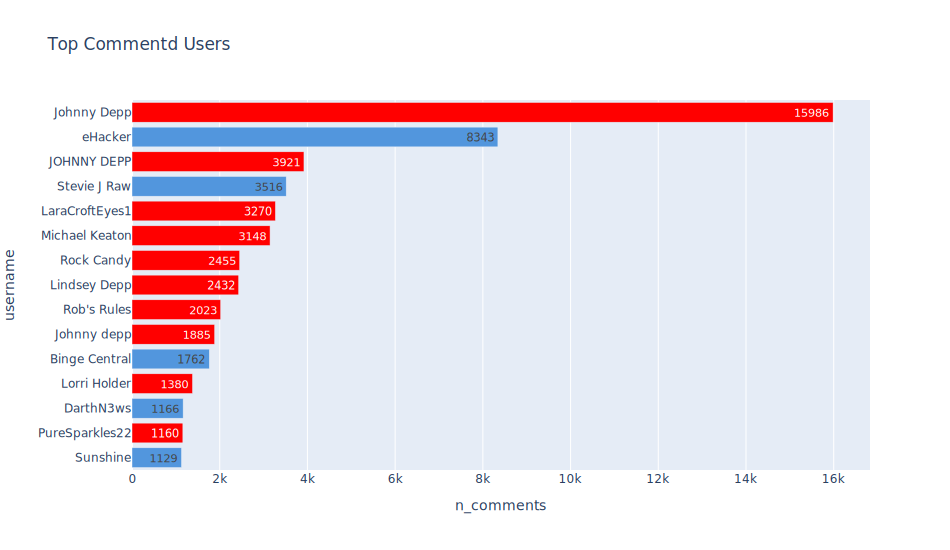

In [230]:
print('\nNote: Negatively commenting users are highlighted in "red"')
helpers.barh(df_top_users.head(15), "Top Commentd Users", c=colors)

In [231]:
# df_comments[df_comments.username == 'eHacker'].text.value_counts().head()

In [232]:
# df_comments[df_comments.username == 'Stevie J Raw'].text.value_counts().head()

## Johnny Depp

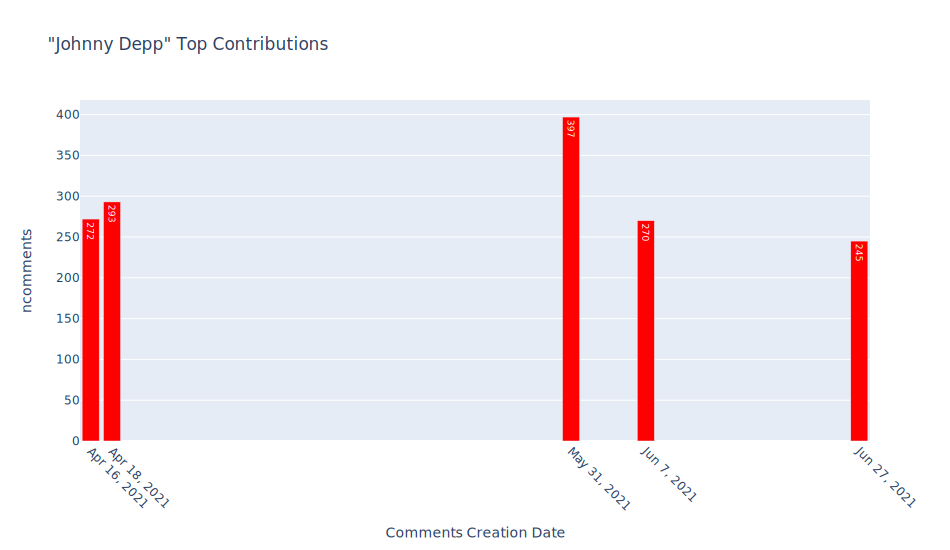

In [233]:
helpers.contr_peaks(df_comments, "Johnny Depp", n=5, threshold=0)

In [234]:
df_comments[df_comments.username == 'Johnny Depp'].text.value_counts().head(60)

ًں’‍ًں’‍i want to specially appreciate you for being a big fan for your nice comments on my post it means alot to me i want you to send me a direct message via hangout using my personal email or you can as well indicate below also endeavor to add your name to the text so i can know you are the one texting because i don't reply unnecessary messages hangout mail: johnnydepp6005@gmailcom                                                                                                                                                                                                                                                                                                                                             520
a big thank to all my fans!what will my name and career be without all of your love and support? amidst my darkest days you all stood by mei don't have all the time in the world to replybut i do read all your heartwarming comments and truly appreciate all it's because the of 

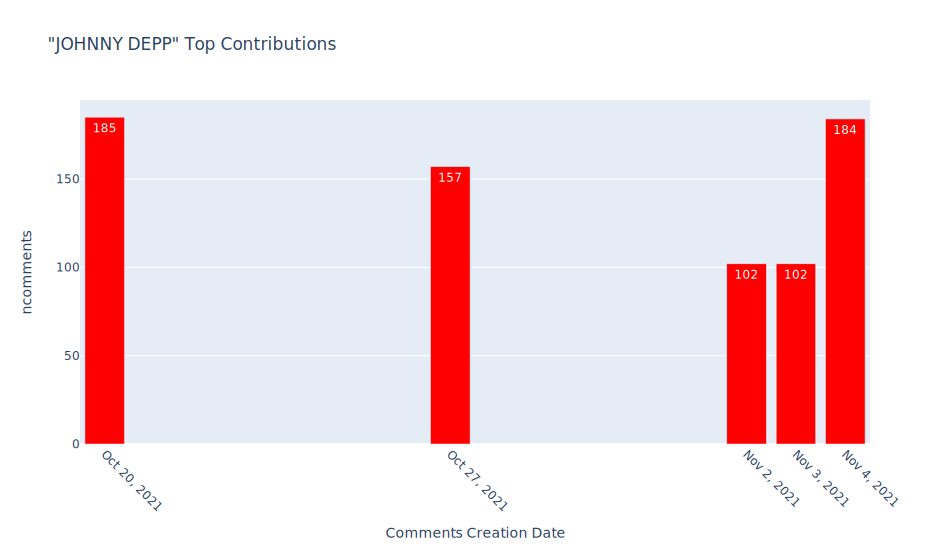

In [235]:
helpers.contr_peaks(df_comments, "JOHNNY DEPP", n=5, threshold=0)

In [236]:
df_comments[df_comments.username == 'JOHNNY DEPP'].text.value_counts().head(60)

ًں’“thanks for your utmost love and support which has brought me this far it has been a hard time for me but your support has got me standing even in difficult times i can't appreciate enough the support of fans who have been really active with issues relating to meprivate message on telegram @johnnydeppllofficial  ًں’“ much love â‌¤ï¸ڈ                            1020
ًں’•ًں’“thanks for your utmost love which has brought me this far it has been a hard time for me but your support got me going where are you watching from?ًں’•                                                                                                                                                                                                                279
â‌¤ï¸ڈthanks for your unending love and support you have constantly shown me in such difficult moment i'm forever grateful i really appreciate your unconditional love to me and every effort exerted by you to cause a change¦where are you watching from?       

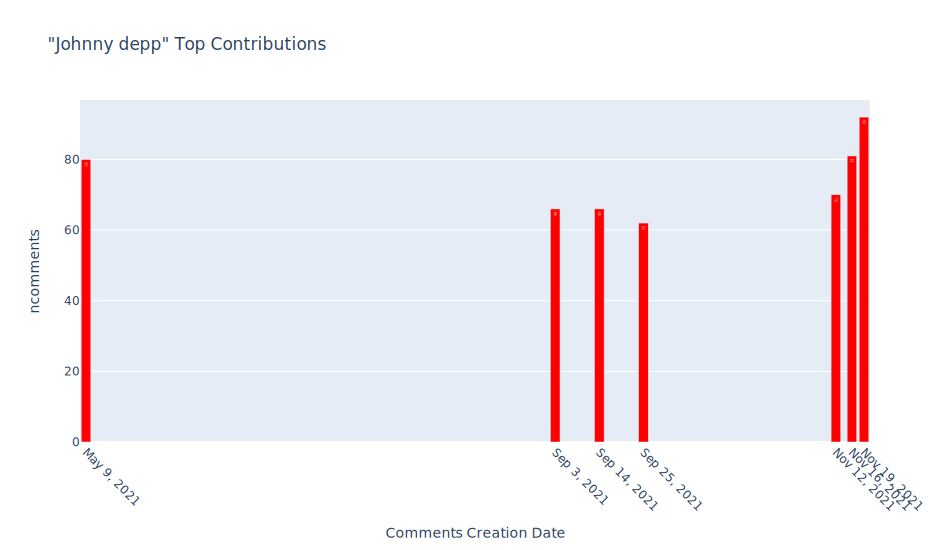

In [237]:
helpers.contr_peaks(df_comments, "Johnny depp", n=7, threshold=0)

In [238]:
df_comments[df_comments.username == 'Johnny depp'].text.value_counts().head(60)

ًں’‍ًں’‍ًں’‍i want to specially appreciate you for being a big fan for your nice comments on my post it means alot to me i want you to send me a direct message via hangout using my personal email or you can as well indicate below also endeavor to add your name to the text so i can know you are the one texting because i don't reply unnecessary messages hangout mail: johnnydepp3099@gmailcom nb:do not send an emaili won't respond                       172
ًں’‍ًں’‍ًں’‍i want to specially appreciate you for being a big fan for your nice comments on my post it means alot to me i want you to send me a direct message via hangout using my personal email or you can as well indicate below also endeavor to add your name to the text so i can know you are the one texting because i don't reply unnecessary messages hangout mail: johnnydepp6003@gmailcom nb:do not send an emaili won't respond                       103
ًں’‍ًں’‍i want to specially appreciate you for being a big fan for your nice comments 

In [239]:
neg_users = neg_users | {'Johnny Depp'}
neg_users = neg_users | {'JOHNNY DEPP'}
neg_users = neg_users | {'Johnny depp'}

## Lindsey Depp

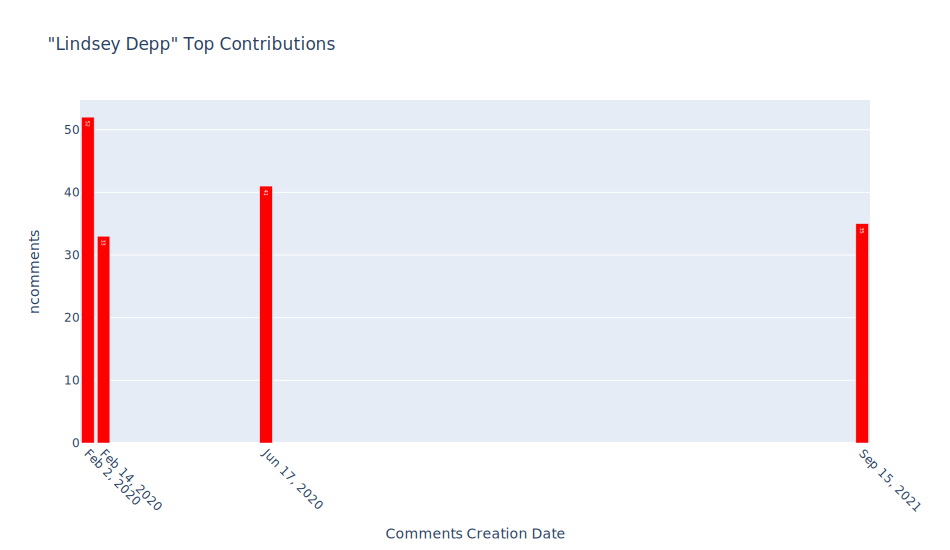

In [240]:
helpers.contr_peaks(df_comments, "Lindsey Depp", n=4, threshold=0)

In [241]:
df_comments[df_comments.username == 'Lindsey Depp'].text.value_counts().head(60)

# justice for johnny depp                                                                                                                                                                                                                                                                                              19
###justice for my darling husband to be johnny depp                                                                                                                                                                                                                                                                    11
#### justice for my darling husband johnny depp                                                                                                                                                                                                                                                                         8
that's crazy                                              

In [242]:
neg_users = neg_users | {'Lindsey Depp'}

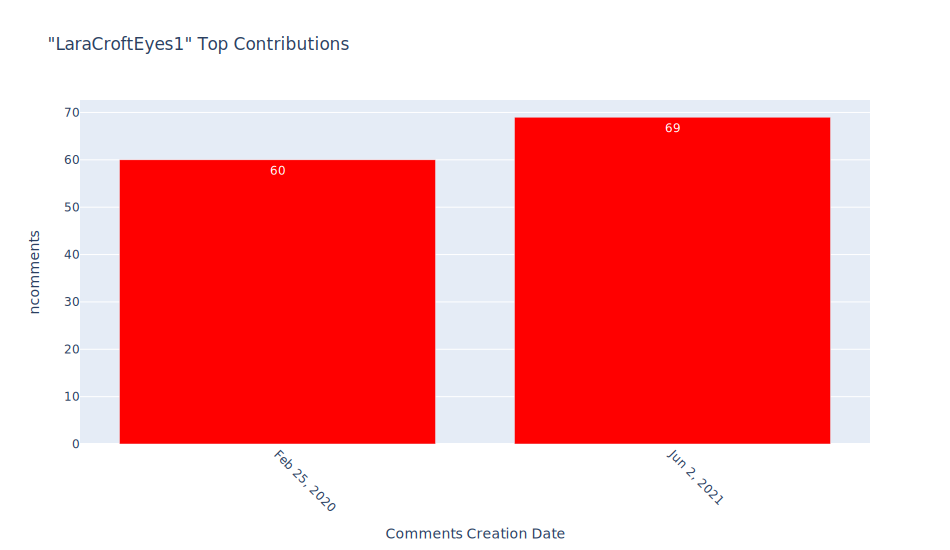

In [243]:
helpers.contr_peaks(df_comments, "LaraCroftEyes1", n=2, threshold=0)

In [244]:
df_comments[df_comments.username == 'LaraCroftEyes1'].text.value_counts().head(60)

what?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [245]:
neg_users = neg_users | {'LaraCroftEyes1'}

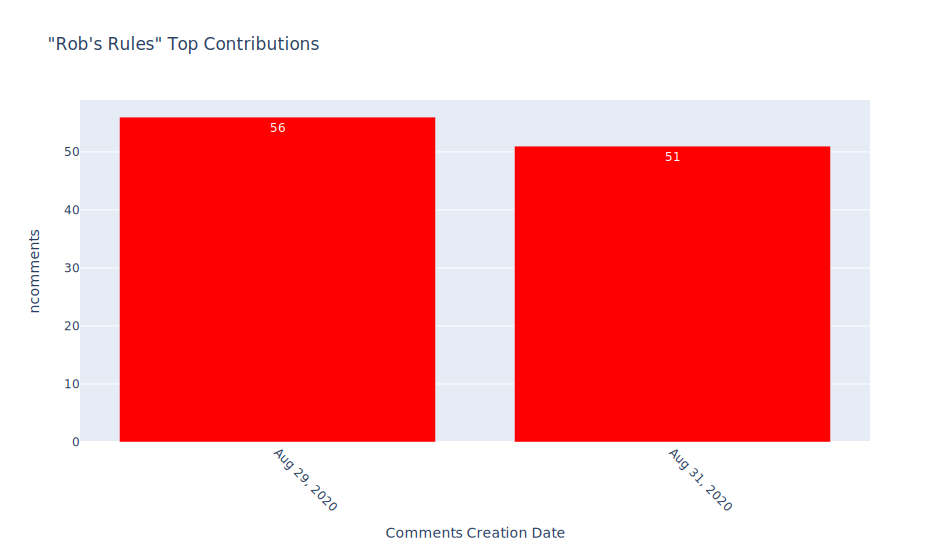

In [246]:
helpers.contr_peaks(df_comments, "Rob's Rules", n=2, threshold=0)

In [247]:
df_comments[df_comments.username == "Rob's Rules"].text.value_counts().head(60)

you are welcome ًں™ڈ                                                                                                                                                                                                                                                                                                                  10
johnny depp vs amber heard videos : https://wwwyoutubecom/playlist?list=pl0zuoy_cxulq6tvrnai8ydd3cvdyaikbx                                                                                                                                                                                                                             8
thank you ًں™ڈ                                                                                                                                                                                                                                                                                                                         7
thank you ًں™

In [248]:
neg_users = neg_users | {"Rob's Rules"}

In [249]:
# df_comments[df_comments.username == "DarthN3ws"].text.value_counts().head()

In [250]:
# df_comments[df_comments.username == "Nerdette's NewsStand"].text.value_counts().head()

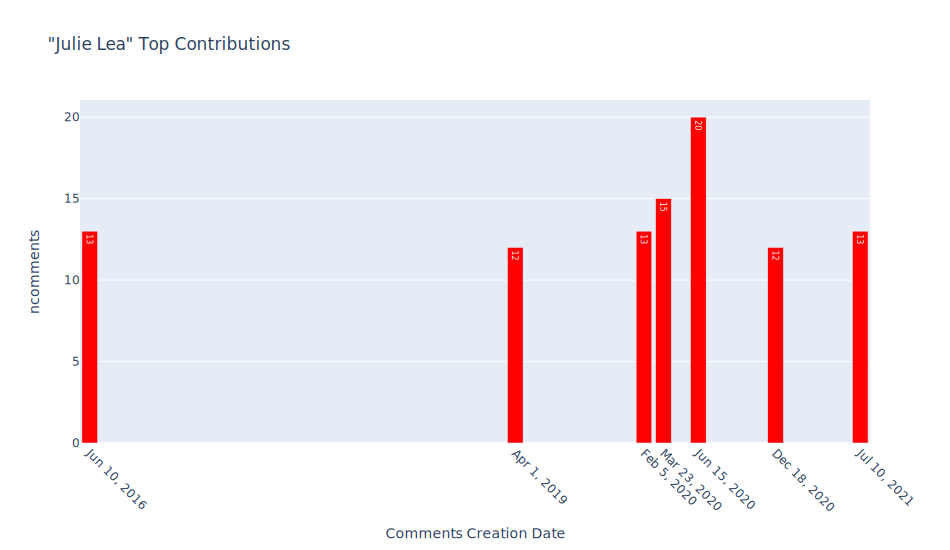

In [251]:
helpers.contr_peaks(df_comments, "Julie Lea", n=7, threshold=0)

In [252]:
df_comments[df_comments.username == "Julie Lea"].text.value_counts().head(60)

@been there nichol has ruled against rupert murdoch in the past nichol's son worked for dan wooten ( back to murdoch) & could have been fired & possibly blackballed out of the industry most parents want to protect their children i'd say that's a strong motivation for nichol to rule in favor of ngn forget amber heardshe has no power except what other's give her forget nichol people thought he sounded sick of ah during her testimony he was frustratedbecause she & her friends made him look more of a idiot josh drew is a outstanding witnessnichol i saw when nichol was ruling what evidence to toss & keep that musk was unimportant as a witnessbeing there the night before court 2016 (magic bruises) where the trial was going & why! rupert murdoch's son works formusk power trickles downnot up follow the rabbit hole & history & it's blatantly obvious murdoch has hated jd for years probably because his multi billion's & power can't buy him youth (he's 81 & looks 100) fame followers crazy fans etc

In [253]:
neg_users = neg_users | {"Julie Lea"}

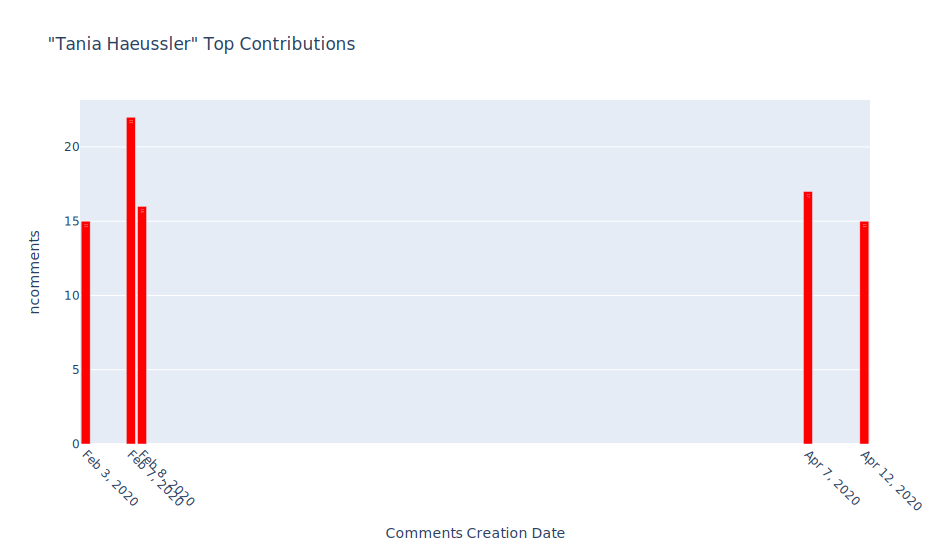

In [254]:
helpers.contr_peaks(df_comments, "Tania Haeussler", n=5, threshold=0)

In [255]:
df_comments[df_comments.username == "Tania Haeussler"].text.value_counts().head(60)

exactly                                                                                                                                                                                                                                                                                                                                                                                                                                              13
agreed                                                                                                                                                                                                                                                                                                                                                                                                                                                6
exactly!!                                                                                                               

In [256]:
neg_users = neg_users | {"Tania Haeussler"}

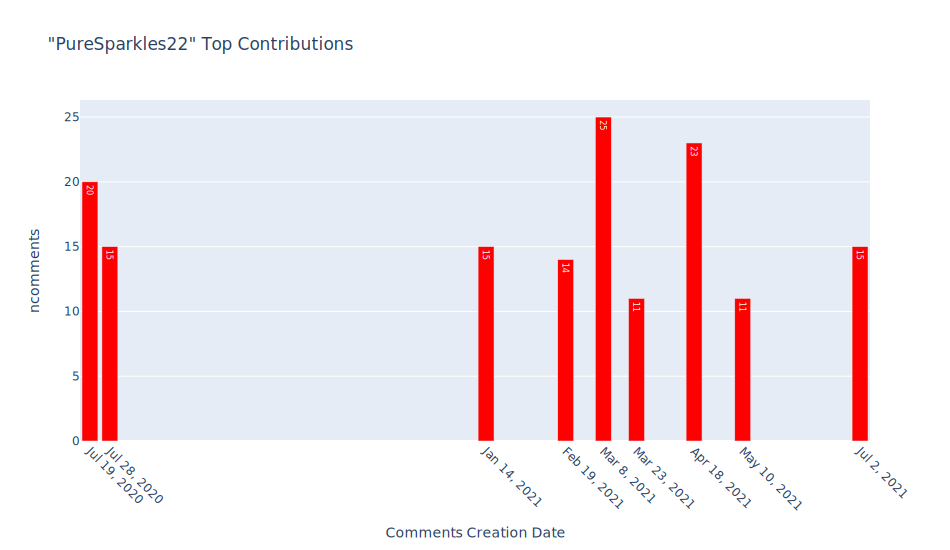

In [257]:
helpers.contr_peaks(df_comments, "PureSparkles22", n=9, threshold=0)

In [258]:
df_comments[df_comments.username == "PureSparkles22"].text.value_counts().head(60)

she is a narcissist                                                                                                                                                                                                                                                                                                                                                                                                                           4
she is an abuser                                                                                                                                                                                                                                                                                                                                                                                                                              4
abuser heard                                                                                                                            

In [259]:
neg_users = neg_users | {"PureSparkles22"}

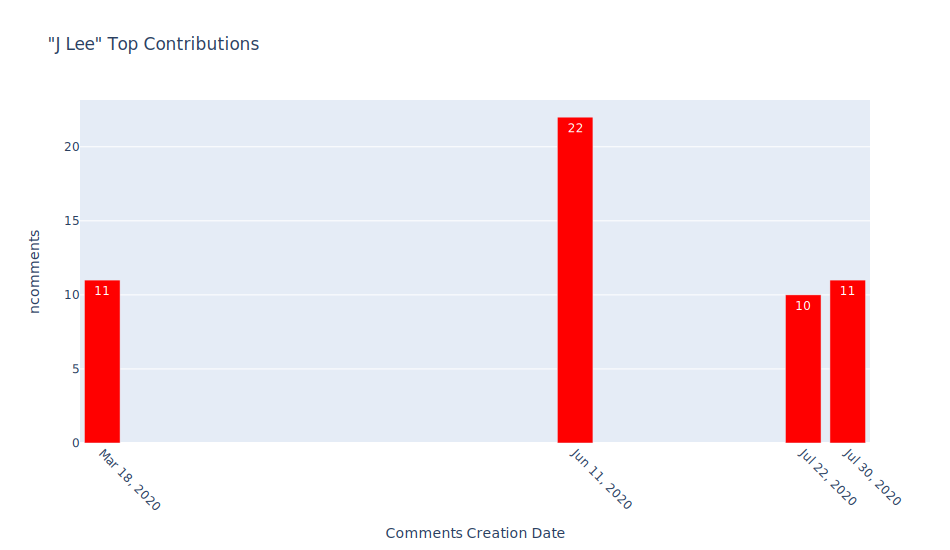

In [260]:
helpers.contr_peaks(df_comments, "J Lee", n=4, threshold=0)

In [261]:
df_comments[df_comments.username == "J Lee"].text.value_counts().head(60)

ًںژ¯                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   2
 when heard begins to describe her experience working opposite 

In [262]:
neg_users = neg_users | {"J Lee"}

In [263]:
# df_comments[df_comments.username == "Abbey Sharp"].text.value_counts().head()

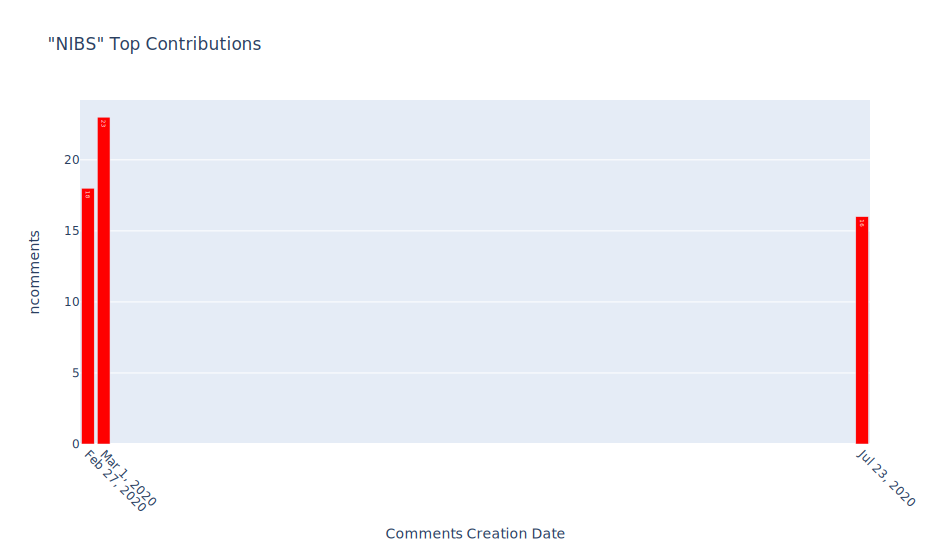

In [264]:
helpers.contr_peaks(df_comments, "NIBS", n=3, threshold=0)

In [265]:
df_comments[df_comments.username == "NIBS"].text.value_counts().head(60)

very well said!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [266]:
neg_users = neg_users | {"NIBS"}

In [267]:
# df_comments[df_comments.username == "ko 3"].text.value_counts().head()

In [268]:
# df_comments[df_comments.username == 'Sunshine'].text.value_counts().head(10)

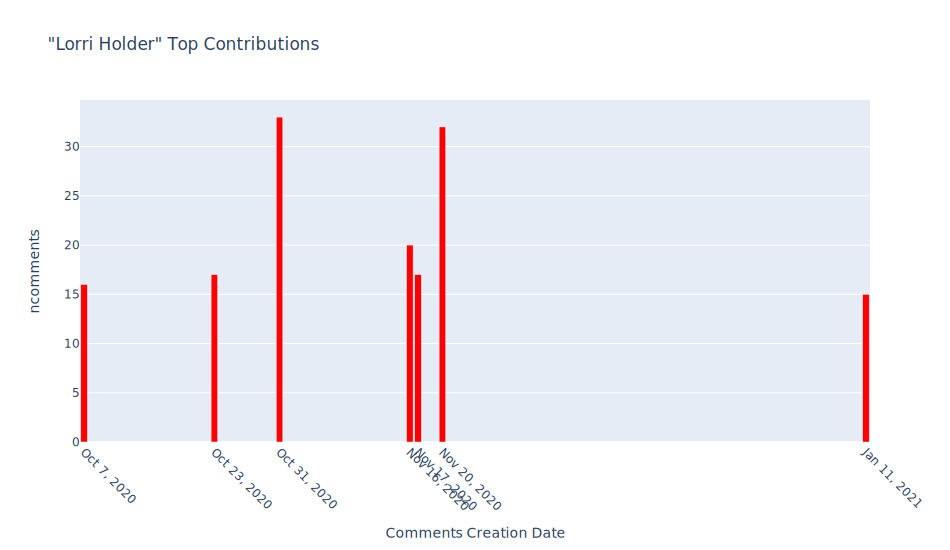

In [269]:
helpers.contr_peaks(df_comments, "Lorri Holder", n=7, threshold=0)

In [270]:
df_comments[df_comments.username == 'Lorri Holder'].text.value_counts().head()

#justiceforjohnnydepp                    13
justiceforjohnny                          8
#justiceforjohnnydepp #fireamberheard     5
i'm a soldier not a bot!                  3
omg                                       3
Name: text, dtype: int64

In [271]:
neg_users = neg_users | {"Lorri Holder"}

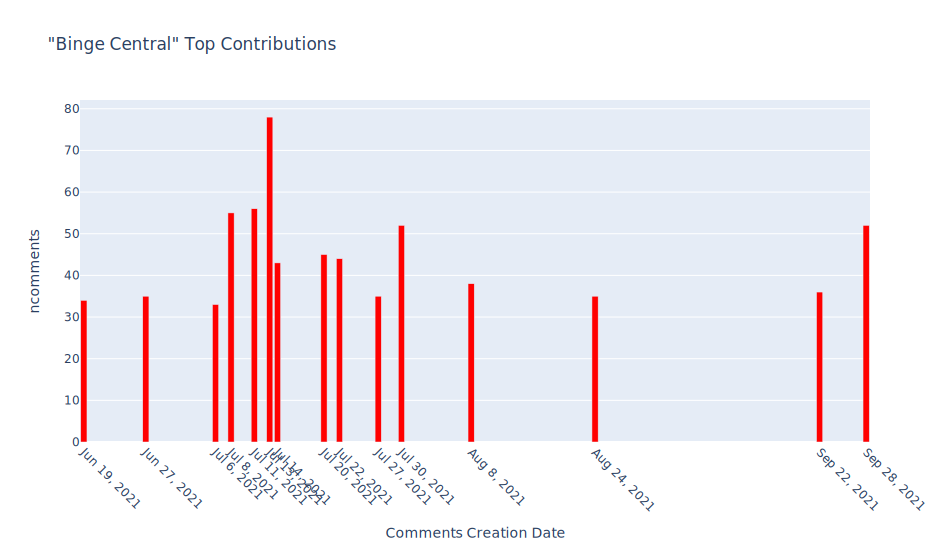

In [272]:
helpers.contr_peaks(df_comments, "Binge Central", n=15, threshold=0)

In [273]:
df_comments[df_comments.username == 'Binge Central'].text.value_counts().head(60)

seriously                   10
âœٹًںڈ½âœٹًںڈ½              10
ًں™ڈًںڈ»ًں™ڈًںڈ»             9
ًں‘چًںڈ»ًں‘چًںڈ»             8
ًں’¯ًں’¯                     7
yep                          7
johnny >>                    7
ًںک‚ًںک‚                     7
seriously tho                7
facts                        6
loll                         6
always                       6
woahh                        5
ًں’ھًںڈ¼ًں’ھًںڈ¼             5
needs justice                5
don't do it                  5
woah                         5
good one                     4
depp >>                      4
agreed                       4
dangggg                      4
good for you                 4
i see what you did there     4
what?                        3
you are correct              3
very true                    3
why                          3
that's a good one            3
lolll                        3
i hope not                   3
emilia >>                    3
they need to                 3
what    

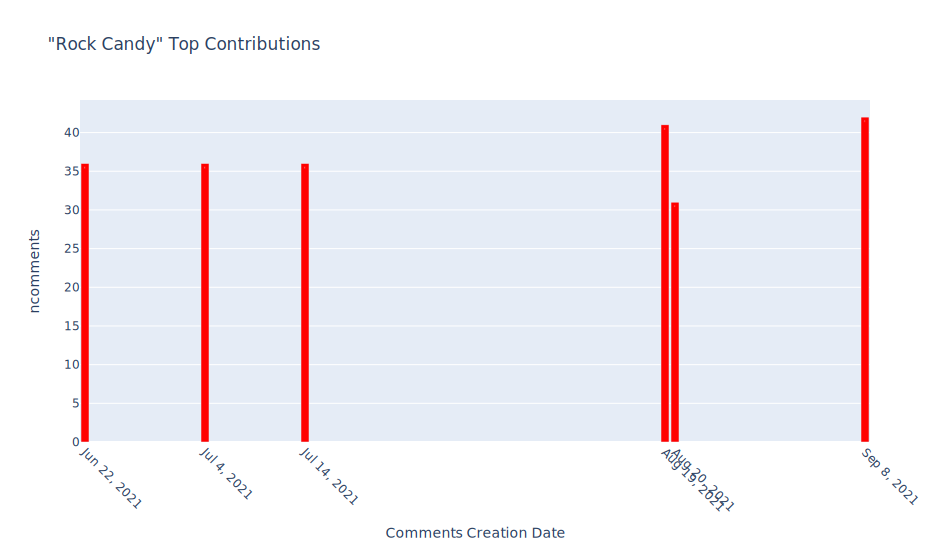

In [274]:
helpers.contr_peaks(df_comments, "Rock Candy", n=6, threshold=0)

In [275]:
df_comments[df_comments.username == 'Rock Candy'].text.value_counts().head()

j4j                                                                    10
amber hasn't been sentenced to jail time at least not yetclick bait     6
#justiceforjohnnydepp                                                   5
lol                                                                     5
amber attack sister https://wwwyoutubecom/watch?v=gtohsqydix0           4
Name: text, dtype: int64

In [276]:
neg_users = neg_users | {"Rock Candy"}

# Michael Keaton
commenting like the users with 'Johnny depp' name

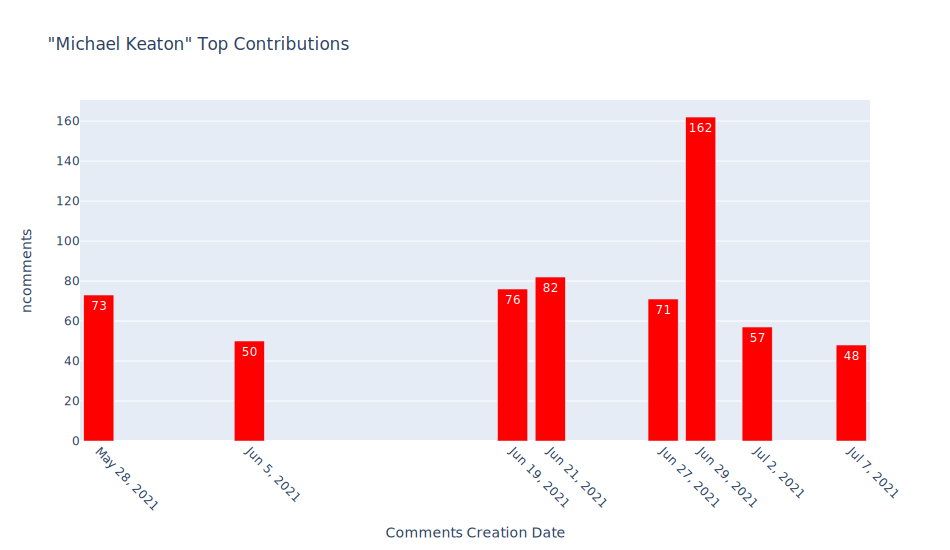

In [277]:
helpers.contr_peaks(df_comments, "Michael Keaton", n=8, threshold=0)

In [278]:
df_comments[df_comments.username == 'Michael Keaton'].text.value_counts().head()

ًں’“thanks for your utmost love and support which has brought me this far it has been a hard time for me but your support has got me standing even in difficult times i can't appreciate enough the support of fans who have been really active with issues relating to meprivate message on telegram @johnnydeppllofficial  ًں’“ much love â‌¤ï¸ڈ        1584
ًں’•ًں’“thanks for your utmost love which has brought me this far it has been a hard time for me but your support got me going where are you watching from?ًں’•                                                                                                                                                                                            446
â‌¤ï¸ڈthanks for your unconditional love and support you have been showing me it has been a difficult time for me but your love got me standing i can't appreciate enough the love of fans who are standing by me through thick and thin private message me on my personal account on telegram @johnnydepp

In [279]:
neg_users = neg_users | {"Michael Keaton"}

<a id='most_likes'></a>
>## Users with the Most Likes
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes"><b>Users with the Most Likes</b></a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [280]:
df_nlikes = df_comments.groupby(['username']).agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('nlikes', ascending=False)

df_nlikes.head(15)

username  ncomments  nreplies    nlikes
527214              Mary Shephard          1     486.0  179715.0
506112               Madison Beer          1     498.0  121555.0
95669                  Baby Bunny          1     441.0   70997.0
806492                Tom Harlock         43     484.0   60284.0
416661                KAT PURFECT          4     487.0   54886.0
527481                     Maryam          9     279.0   51396.0
874222   _thesmellofnewsneakers _          2     470.0   48562.0
459263               LadyDominion          1     445.0   46526.0
310768                Gus Johnson          1     134.0   43136.0
108083        BetweenTheRaindrops        129     316.0   42848.0
1031687                tim lister          1     199.0   38317.0
567674                 Mr. Bruhhh          1     495.0   37998.0
179681              Crypto Info 2          1     133.0   37522.0
911174                  demi demi          1     156.0   36922.0
7215                    8-Bit Tex          1     149.0   36448.0

In [281]:
myset = {'KAT PURFECT', 'Maryam', '_thesmellofnewsneakers _', 'BetweenTheRaindrops', 'tim lister', 'Eric Wilson', 'Jo Gauthier'} 

In [282]:
colors = []
for user in df_nlikes.head(15)['username']:
    if user in myset:
        colors.append('red')
    else: 
        colors.append('#5296dd')


Note: Negatively commenting users are highlighted in "red"


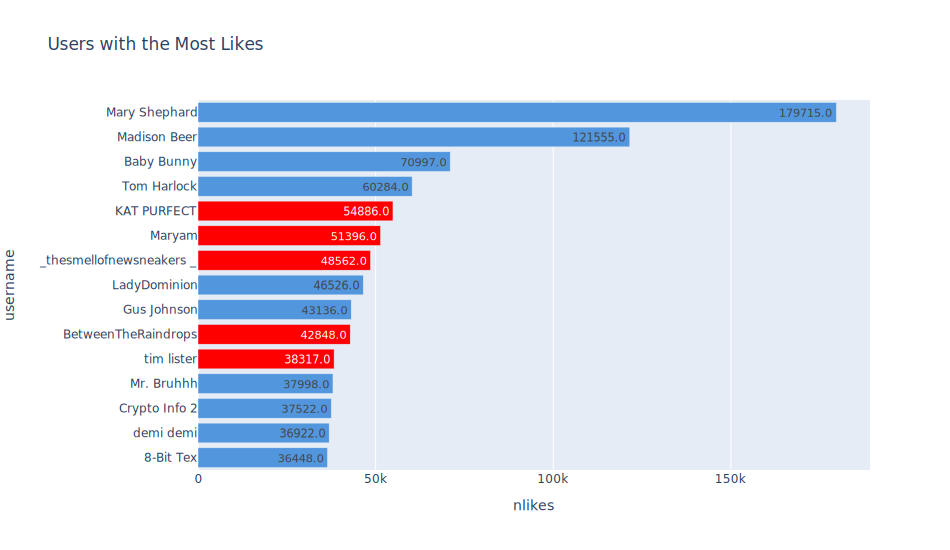

In [283]:
print('\nNote: Negatively commenting users are highlighted in "red"')
helpers.barh(df_nlikes[['username', 'nlikes']].head(15), "Users with the Most Likes", c=colors)

In [284]:
df_comments[df_comments.username == 'Mary Shephard'].text.value_counts().head()

she could steal my man and i would be mad that she wanted him and not me    1
Name: text, dtype: int64

In [285]:
# df_comments[df_comments.username == 'Madison Beer'].text.value_counts().head()

In [286]:
# df_comments[df_comments.username == 'Baby Bunny'].text.value_counts().head()

In [287]:
# df_comments[df_comments.username == 'Tom Harlock'].text.value_counts().head(10)

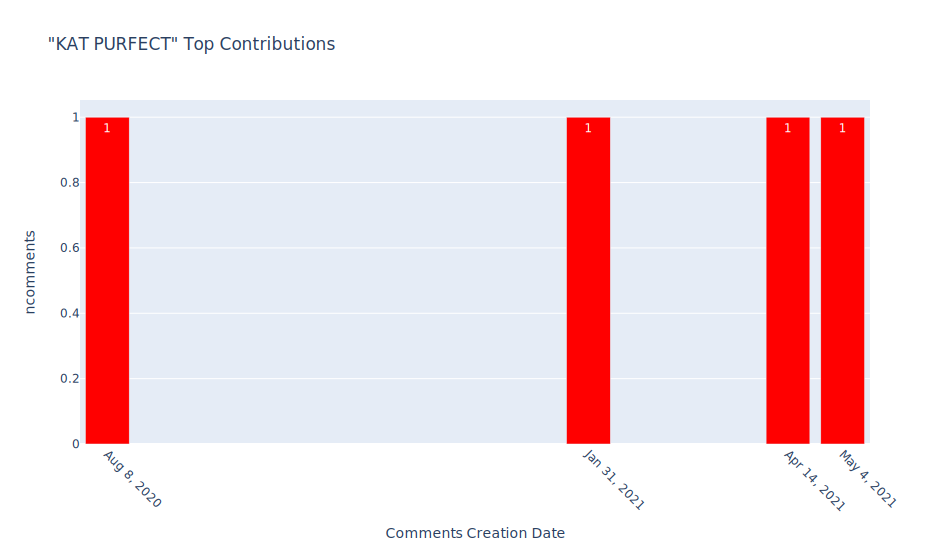

In [288]:
helpers.contr_peaks(df_comments, "KAT PURFECT", n=5, threshold=0)

In [289]:
df_comments[df_comments.username == 'KAT PURFECT'].text.value_counts().head(10)

sociapath                                                                                     1
no woman should hit a man just like no man should hit a woman                                 1
ah seems narcissistic and a button presser 2me right from the start truth always comes out    1
that's wot sociaphaphs do                                                                     1
Name: text, dtype: int64

In [290]:
neg_users = neg_users | {"KAT PURFECT"}

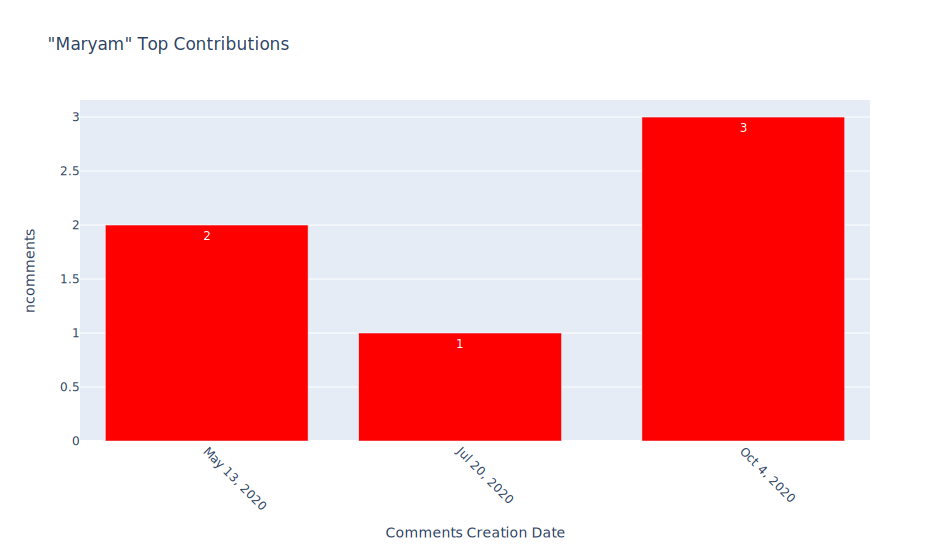

In [291]:
helpers.contr_peaks(df_comments, "Maryam", n=3, threshold=0)

In [292]:
df_comments[df_comments.username == 'Maryam'].text.value_counts().head(10)

i want another puppy cuz i already have a puppy and i want another one!hehrh                                                                                                                       1
@gachamuu yup                                                                                                                                                                                      1
@kelli danielle haha i see                                                                                                                                                                         1
if they haven't given johnny his fuckin role in pirates of the caribbean i'm fighting someone                                                                                                      1
nice shoes where is ur fucking proof? amber is a malicious disgusting woman men can be abused she chopped off his fucking finger and tried to kill him tarnished his name and got his jobs gone    1
guys please sto

In [293]:
neg_users = neg_users | {"Maryam"}

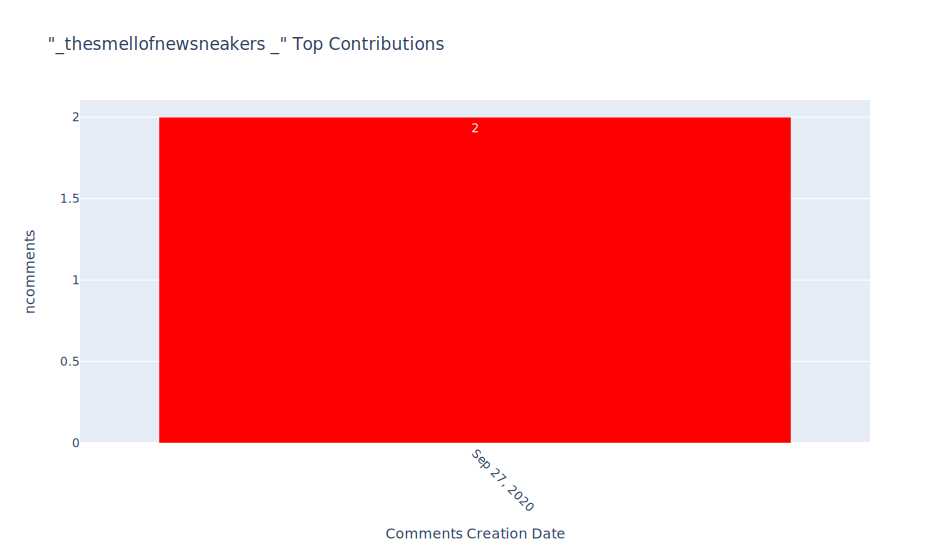

In [294]:
helpers.contr_peaks(df_comments, "_thesmellofnewsneakers _", n=3, threshold=0)

In [295]:
df_comments[df_comments.username == '_thesmellofnewsneakers _'].text.value_counts().head(10)

yeah her eyes are not open all the way like she is trying to look sad       1
guys please stop insulting amber heard i'm tired of liking your comments    1
Name: text, dtype: int64

In [296]:
neg_users = neg_users | {"_thesmellofnewsneakers _"}

In [297]:
df_comments[df_comments.username == 'LadyDominion'].text.value_counts().head(10)

disney's got a lot of balls to think people will watch pirates of the caribbean without johnny depp    1
Name: text, dtype: int64

In [298]:
# df_comments[df_comments.username == 'Gus Johnson'].text.value_counts().head(10)

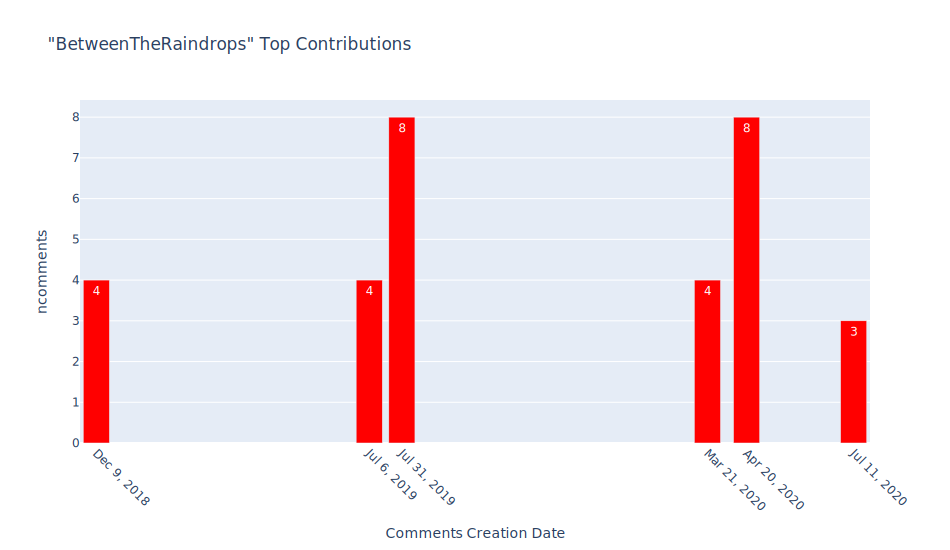

In [299]:
helpers.contr_peaks(df_comments, "BetweenTheRaindrops", n=6, threshold=0)

In [300]:
df_comments[df_comments.username == 'BetweenTheRaindrops'].text.value_counts().head(60)

i have to go wow your friend called you she is being assaulted geez i'd expect more interest :d                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [301]:
neg_users = neg_users | {"BetweenTheRaindrops"}

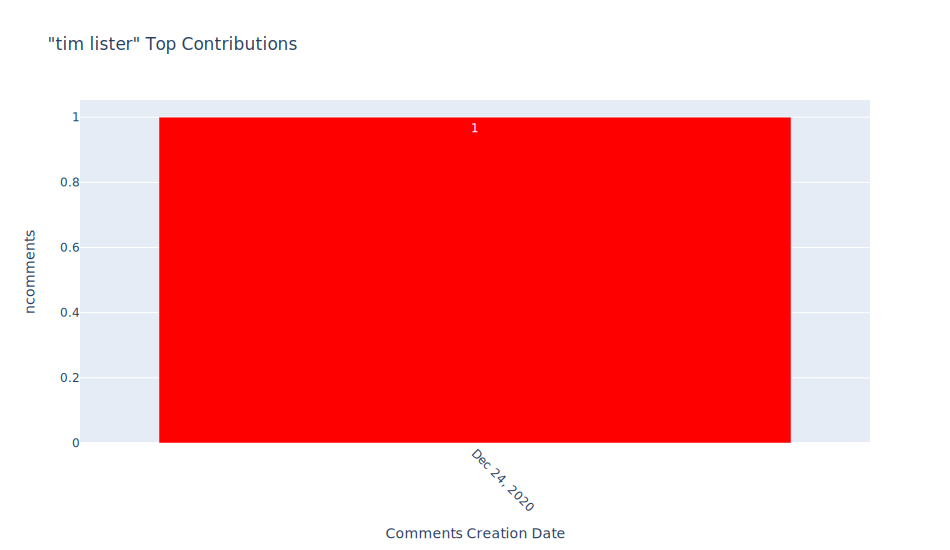

In [302]:
helpers.contr_peaks(df_comments, "tim lister", n=8, threshold=0)

In [303]:
df_comments[df_comments.username == 'tim lister'].text.value_counts().head()

they won't believe you because you are a man she is not a victim    1
Name: text, dtype: int64

In [304]:
neg_users = neg_users | {"tim lister"}

In [305]:
# df_comments[df_comments.username == 'Mr. Bruhhh'].text.value_counts().head()

In [306]:
# df_comments[df_comments.username == 'Crypto Info 2'].text.value_counts().head()

In [307]:
# df_comments[df_comments.username == 'demi demi'].text.value_counts().head(10)

In [308]:
# df_comments[df_comments.username == '8-Bit Tex'].text.value_counts().head(10)

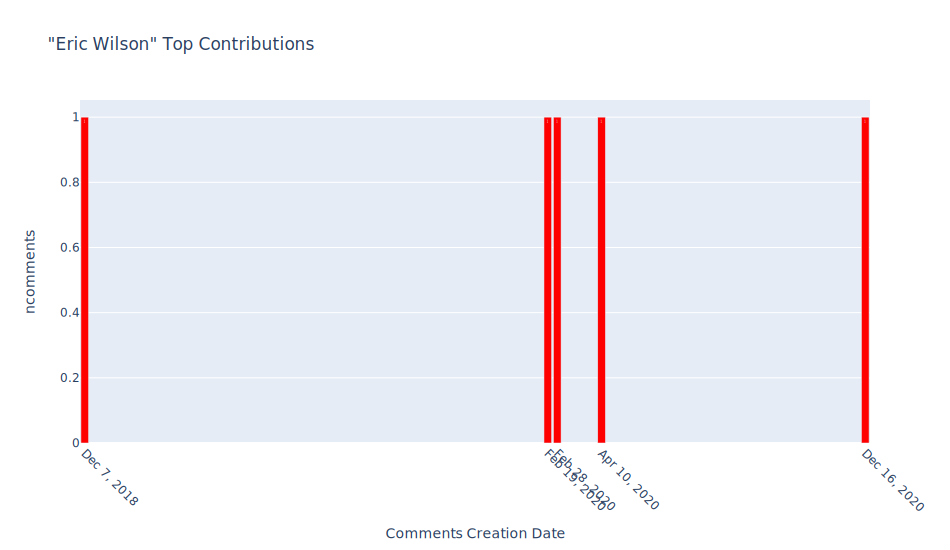

In [309]:
helpers.contr_peaks(df_comments, "Eric Wilson", n=8, threshold=0)

In [310]:
df_comments[df_comments.username == 'Eric Wilson'].text.value_counts().head(10)

his mom was single mom so the kids were all screwed up    1
disney's been out for40years                              1
amber heard will take care of him                         1
the war is not coming to the surface                      1
why give this abuser screentime she is not a victim       1
Name: text, dtype: int64

In [311]:
neg_users = neg_users | {"Eric Wilson"}

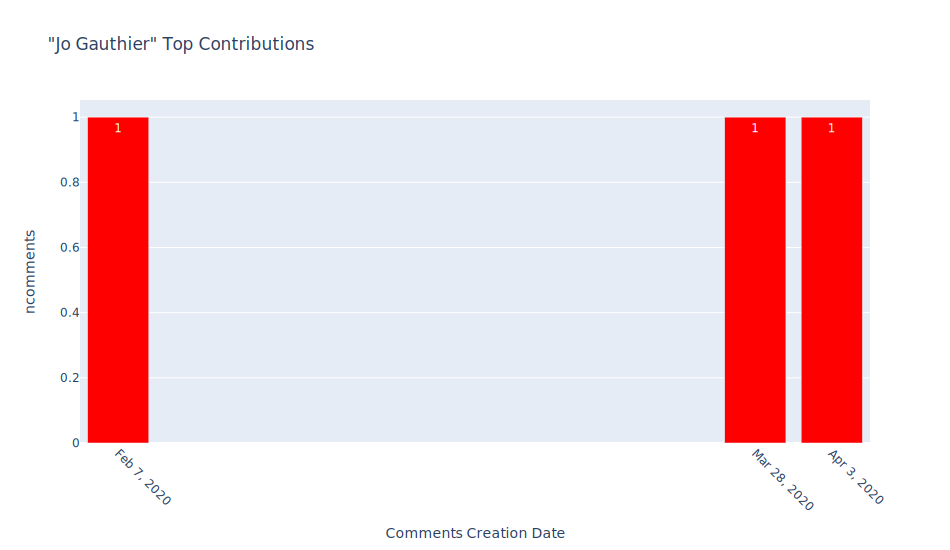

In [312]:
helpers.contr_peaks(df_comments, "Jo Gauthier", n=8, threshold=0)

In [313]:
df_comments[df_comments.username == 'Jo Gauthier'].text.value_counts().head(10)

im canceling her if i ever see her name on a movie premiere i aint watching it who's with me?    1
if she knew knew johny had the tapes she is a very dumb bitch                                    1
true this is making sense                                                                        1
Name: text, dtype: int64

In [314]:
neg_users = neg_users | {"Jo Gauthier"}

In [315]:
# df_comments[df_comments.username == 'Ty Y'].text.value_counts().head(10)

<a id='most_replies'></a>
>## Users with the Most Replies
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
    <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies"><b>Users with the Most Replies</b></a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [316]:
df_nreplies = df_comments.groupby(['username']).agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('nreplies', ascending=False)

df_nreplies.head(15)

username  ncomments  nreplies   nlikes
590452              Nerdette's NewsStand       1024    1417.0   5474.0
916131                           eHacker       8343    1411.0  14892.0
646613                    PureSparkles22       1160    1369.0  32298.0
184876                      DELCARAJO TV         82    1327.0  10281.0
785925                   ThatUmbrellaGuy        176    1285.0  12186.0
795827                     TheQuartering         33     994.0   8549.0
343333                Incredibly Average        237     924.0  17318.0
809154          Top 10 Beyond The Screen         14     883.0   3575.0
344129                    InformOverload         37     846.0   2580.0
408266                    Judy Alexander        386     772.0  14450.0
966396                     lisa richards        631     736.0   9675.0
275226                      Flashback FM          4     654.0  25544.0
827093                     Vampire Daddy        229     625.0  14242.0
412775  Just Some Guy without a Mustache         34     601.0  25829.0
534660                         May Jones          1     500.0  27866.0

In [317]:
myset = {'Just Some Guy without a Mustache', 'Vampire Daddy', 'PureSparkles22', 'InformOverload', 
         'Top 10 Beyond The Screen', 'ThatUmbrellaGuy', 'PureSparkles22', 'TheQuartering', 'Judy Alexander', 
         'lisa richards', 'May Jones'} 

In [318]:
colors = []
for user in df_nreplies.head(15)['username']:
    if user in myset:
        colors.append('red')
    else: 
        colors.append('#5296dd')


Note: Negatively commenting users are highlighted in "red"


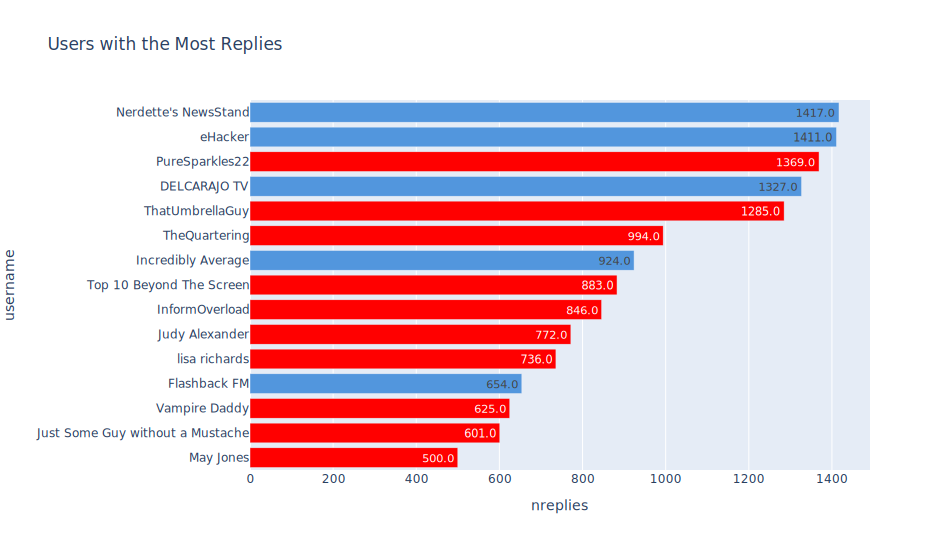

In [319]:
print('\nNote: Negatively commenting users are highlighted in "red"')
helpers.barh(df_nreplies[['username', 'nreplies']].head(15), "Users with the Most Replies", c=colors)

In [320]:
# to get the users investigated before
set(df_nreplies.username.head(15)) & set(df_nlikes.username.head(15)) | \
set(df_nreplies.username.head(15)) & set(df_top_users.username.head(15))

{'PureSparkles22', 'eHacker'}

In [321]:
# # to get the users not investigated before
# set(df_nreplies.username.head(15)) - set(df_nlikes.username.head(15)) - set(df_top_users.username.head(15))


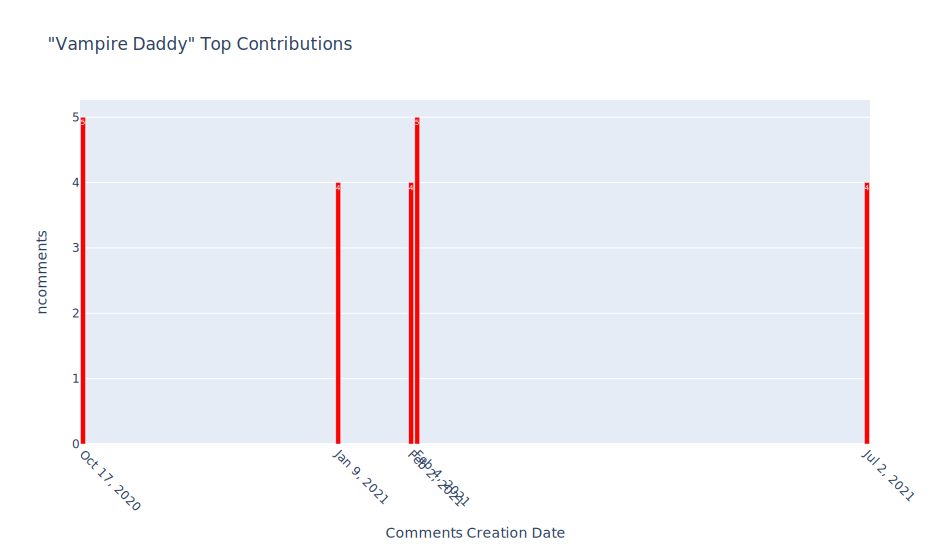

In [322]:
helpers.contr_peaks(df_comments, "Vampire Daddy", n=5, threshold=0)

In [323]:
df_comments[df_comments.username == "Vampire Daddy"].text.value_counts().head(60)

it takes a special kind of person to abuse their own family and not the good kind of special we are looking at you amber                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 1
i'm convinced that amber's motto is if anyone tries to hold you responsible for your actions blame russian bots and if that d

In [324]:
neg_users = neg_users | {"Vampire Daddy"}

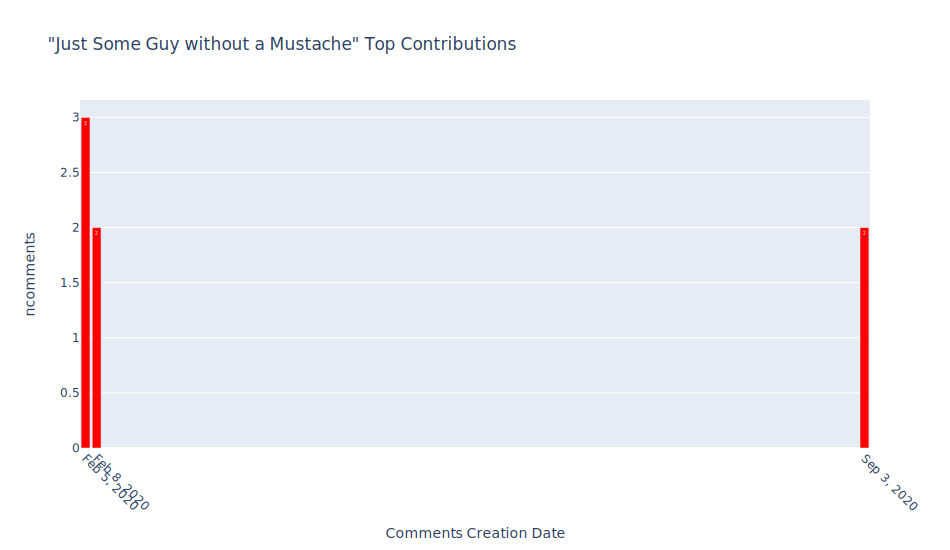

In [325]:
helpers.contr_peaks(df_comments, "Just Some Guy without a Mustache", n=3, threshold=0)

In [326]:
df_comments[df_comments.username == "Just Some Guy without a Mustache"].text.value_counts().head(60)

this is good and bad at the same time good for the fact that we are not wasting our money watching this film and bad for obvious reasons                                                                 1
people who make false accusations deserve worse honestly she is an evolved and mutated form of being a gold digger like the corona virus                                                                 1
well this was pretty unexpected news about the whole heard situation i'mma feel sorry for the child                                                                                                      1
thanks for letting me know now i can save money by not watching it                                                                                                                                       1
i really feel sorry for johnny that he has to deal with a monster like her                                                                                                                  

In [327]:
neg_users = neg_users | {"Just Some Guy without a Mustache"}

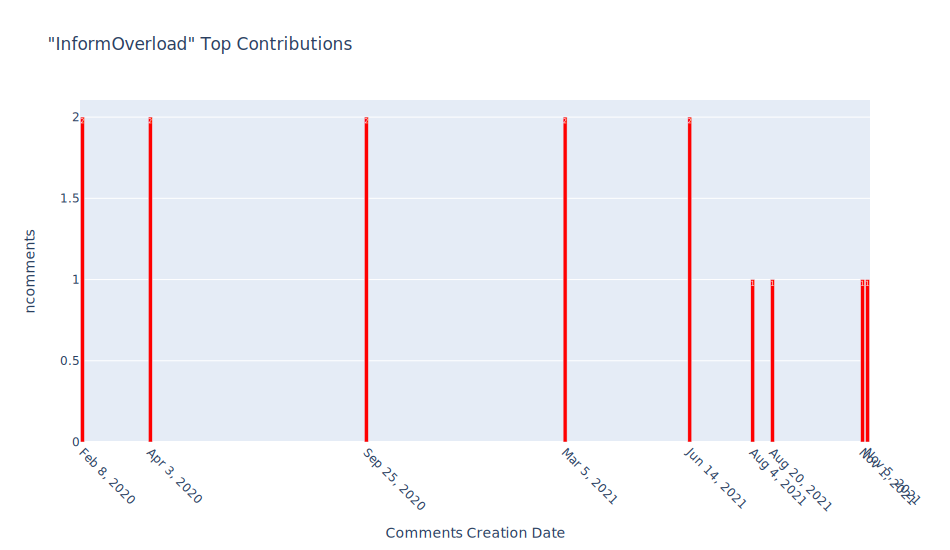

In [328]:
helpers.contr_peaks(df_comments, "InformOverload", n=9, threshold=0)

In [329]:
df_comments[df_comments.username == "InformOverload"].text.value_counts().head(60)

what are your thoughts?                                                                                                                                                                                                                                               12
do you think amber heard will be in aquaman 2? 00:00 intro 00:11 britney spears father reacts 01:21 cephalopod passes cognitive test 03:32 mr potato head cancelled 04:56 texas storm hero 06:10 amber heard aquaman 2 drama 08:07 reading comments 09:14 bloopers     1
what secret shocked you the most in this interview? plus check out our part 2 for more ًں‘‰ https://wwwyoutubecom/watch?v=nwgqediinko                                                                                                                                  1
it's quite a strange flex lol                                                                                                                                                                                

In [330]:
neg_users = neg_users | {"InformOverload"}

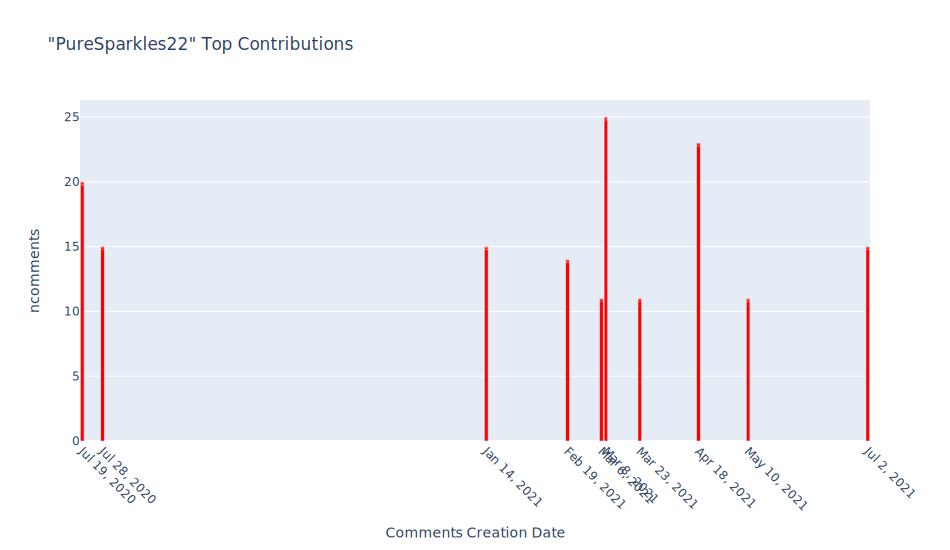

In [331]:
helpers.contr_peaks(df_comments, "PureSparkles22", n=10, threshold=0)

In [332]:
df_comments[df_comments.username == "PureSparkles22"].text.value_counts().head(60)

she is a narcissist                                                                                                                                                                                                                                                                                                                                                                                                                           4
she is an abuser                                                                                                                                                                                                                                                                                                                                                                                                                              4
abuser heard                                                                                                                            

In [333]:
neg_users = neg_users | {"PureSparkles22"}

In [334]:
# df_comments[df_comments.username == "Nerdette's NewsStand"].text.value_counts().head(60)

- i am fine thank you i apologize i followed the case everyday but couldn't get videos out the way i wanted during that time i'm working on visuals and things to make them up to standard and hopefully won't be long
- yes i have read and studied each and every document since this started almost 4 years ago
- ok depp is the victim   
- this was in 2016 when she was making the initial claims against depp so she was actually facing no charges then she was getting questioned to test the accuracy of her claims and to clear his name she is currently being sued by johnny for defamation and is attempting for the 3rd or 4th time to get the case dismissed so as of right nowno consequences she is still a un human ambassador has a lucrative loreal contract and is still has her franchise role as mera in the aquaman movies she has locked down her instagram comments for the past month and a halfand is going about her life as if none of this is happening    1


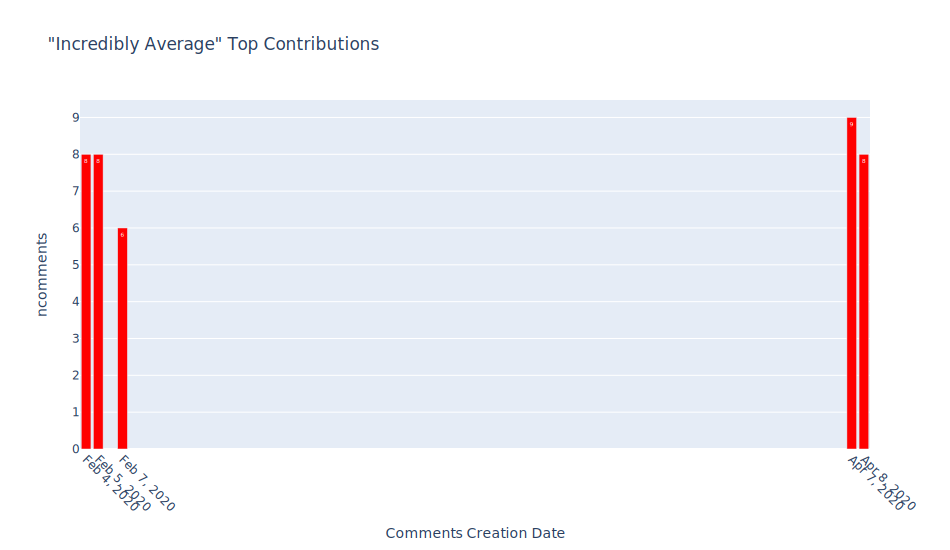

In [335]:
helpers.contr_peaks(df_comments, "Incredibly Average", n=5, threshold=0)

- ok depp is the victim
- but her admitting to hitting him on multiple occasions is you must have missed that 

In [336]:
df_comments[df_comments.username == 'Incredibly Average'].text.value_counts().head(60)

she means to leave like when he runs away or leaves the room when she is angry                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              1
@oliana 12 i was responding to your comment stating her red cheek while with elon a year later proved she was right about her injuries she claims to have suffered from johnny also nobody not even amber claim the bruises appeared later but rather almost instantly the pictures she submitted were said to have been taken the week leading up to her 

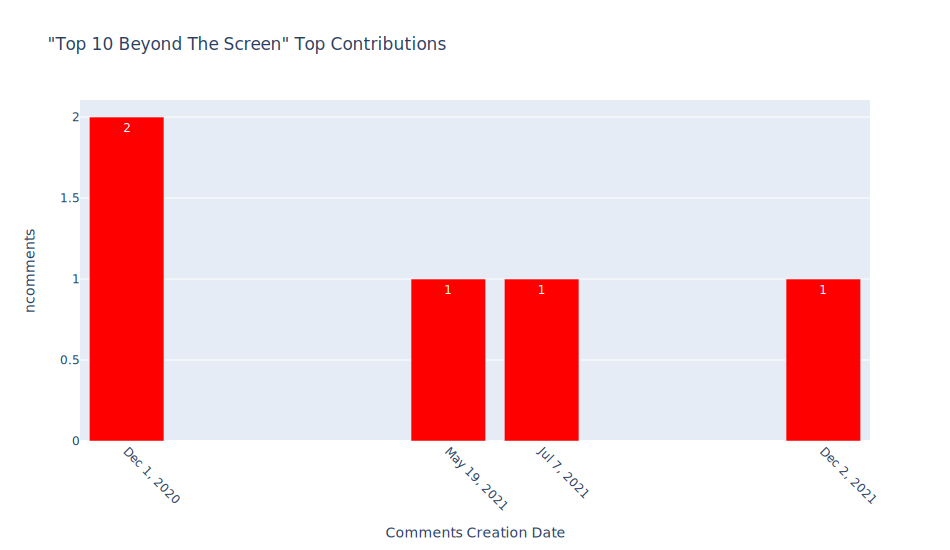

In [337]:
helpers.contr_peaks(df_comments, "Top 10 Beyond The Screen", n=4, threshold=0)

In [338]:
df_comments[df_comments.username == 'Top 10 Beyond The Screen'].text.value_counts().head(10)

what are your thoughts on amber heard?                        1
what is your favorite couple in hollywood?                    1
who is your favorite hollywood actor?                         1
do you think hollywood should hire amber heard?               1
do you think amber heard should be removed from aquaman 2?    1
yeeeeeee                                                      1
do you think amber heard should be fired from aquaman 2?      1
how do you feel about amber heard?                            1
do you think amber heard should be banned from hollywood?     1
#justiceforjohnny                                             1
Name: text, dtype: int64

In [339]:
neg_users = neg_users | {"Top 10 Beyond The Screen"}

- yeah there's two trials jd vs the sun decided now and a direct jd vs ah it was supposed to be jan but looks like it may get pushed to mid year  
- social justice warrior was a term a specific type of crazy created for themselves to backpat how stunning and brave they were they were the very people that spearheaded this wave of cancel culture what they preach is not about equality or merit its about advantage namely advantage for self 
- if new case documents or evidence additions aren't new what exactly is? this isnt depp vs sun 2020; its the prep for depp vs ah 2021 case which is noted in the 1st 10 seconds of the video to avoid confusion it is also in the tags to note although there is no existing hashtag to differentiate; i tried deppheard2021 but it doesn't seem to track according to tube buddy as the case builds we are getting new documents daily sometimes multiples a day as well as adam waldmann his lawyer adding sneak peaks at new items that's what this is: waldman posted a piece of evidence that will be added which hadn't been showcased we don't even have a submitted document for it and it shows ah/ah's sister losing everyone around them i also posted another video last night on the sophie case if depp isn't your flavor its up too thanks                                                                                 

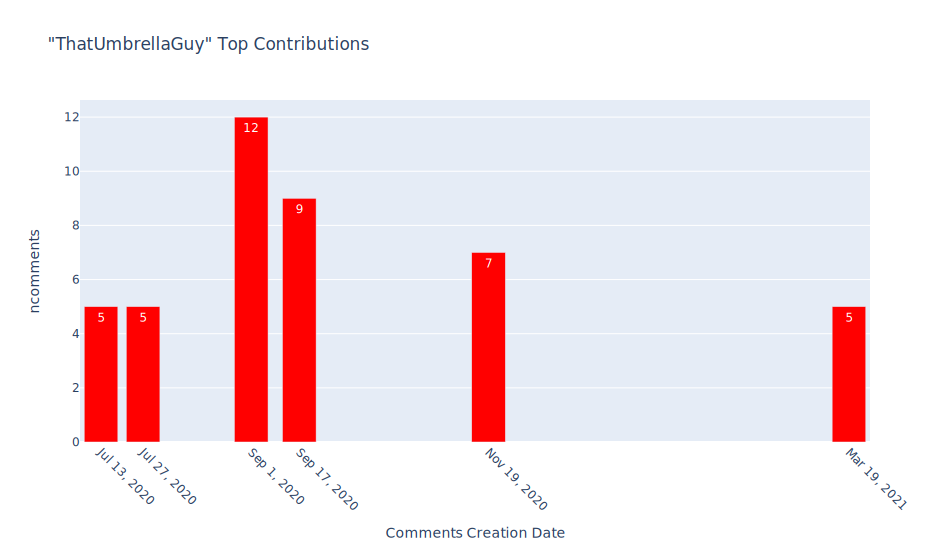

In [340]:
helpers.contr_peaks(df_comments, "ThatUmbrellaGuy", n=6, threshold=0)

In [341]:
df_comments[df_comments.username == 'ThatUmbrellaGuy'].text.value_counts().head(60)

ah that's for that i've learned a lot about court abroad this qc people carriers lol                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1
lol no                                                                                                             

In [342]:
neg_users = neg_users | {"ThatUmbrellaGuy"}

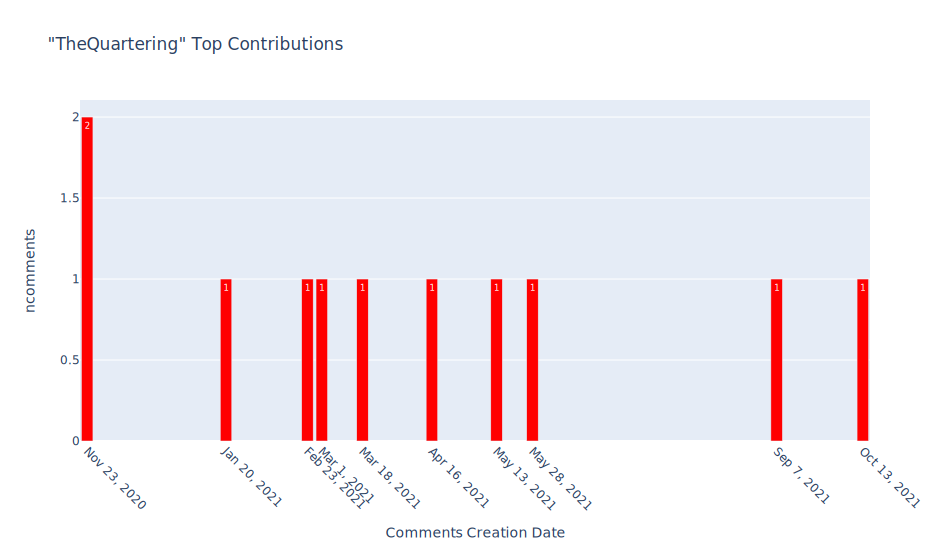

In [343]:
helpers.contr_peaks(df_comments, "TheQuartering", n=10, threshold=0)

In [344]:
df_comments[df_comments.username == 'TheQuartering'].text.value_counts().head(60)

help support the channel & protect your data with a vpn! get private internet access! https://privateinternetaccesscom/thequartering3                                                                                                                                                                                                                    2
thanks so much for always smashing that like button! subscribe today so we can hit 1 million & save a huge bundle on a sweet new displate only when you use this link! https://displatecom/thequartering?art=5e0b6fe4e87b0                                                                                                                               2
make sure you smash that like button to support johnny depp & leave a comment below to make your voice heard! (lol) subscribe today too! let's hit 1 million! protect yourself with a vpn today! it's $208 only per month + 2 months free which is 83% off of the monthly price! use this link! https://privateint

In [345]:
neg_users = neg_users | {"TheQuartering"}

In [346]:
# df_comments[df_comments.username == 'DELCARAJO TV'].text.value_counts().head(10)

In [347]:
# df_comments[df_comments.username == 'Flashback FM'].text.value_counts().head(10)

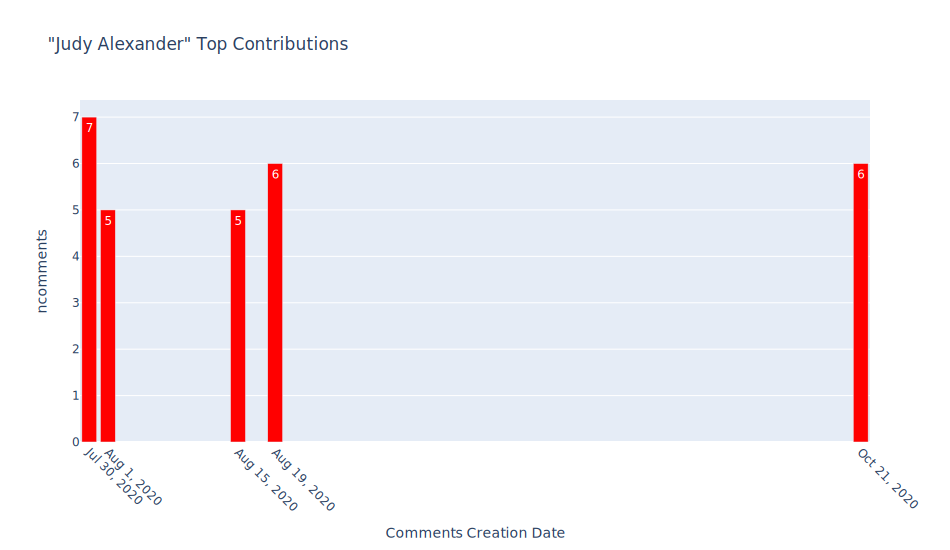

In [348]:
helpers.contr_peaks(df_comments, "Judy Alexander", n=5, threshold=0)

In [349]:
df_comments[df_comments.username == 'Judy Alexander'].text.value_counts().head(60)

i always thought that johnny would be in the ground right now if he hadn't left she would claim it was an accident he dodged a bullet                                                                                                                                                                                                                 2
boom! ambers career just blew up nobody will hire her now she just blacklisted herself                                                                                                                                                                                                                                                                2
i agree wholeheartedly she should just give up trying to make herself look good because she can't once an abuser always an abuser if somebody made her so mad she loses it that hammer won't be just for nailing in nails                                                                                               

In [350]:
neg_users = neg_users | {"Judy Alexander"}

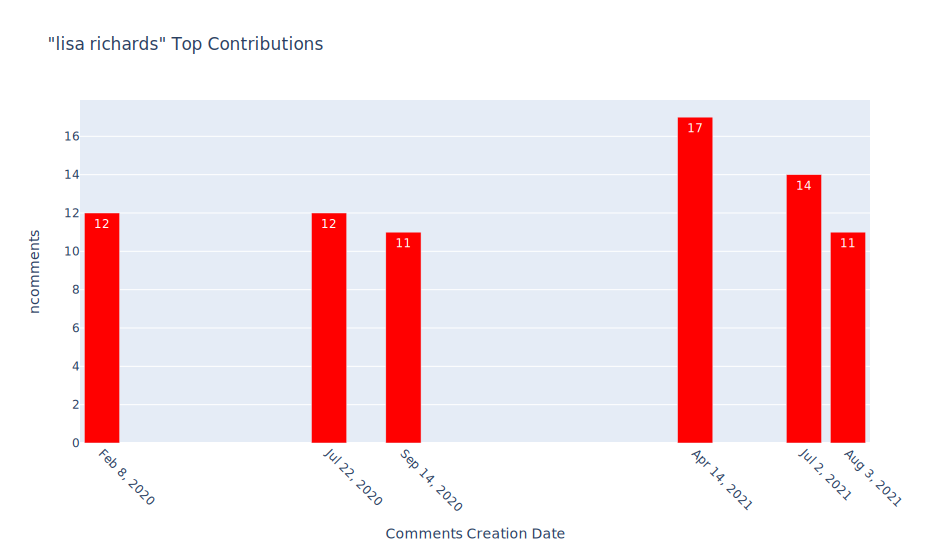

In [351]:
helpers.contr_peaks(df_comments, "lisa richards", n=6, threshold=0)

In [352]:
df_comments[df_comments.username == 'lisa richards'].text.value_counts().head(60)

two words: joan crawford                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [353]:
neg_users = neg_users | {"lisa richards"}

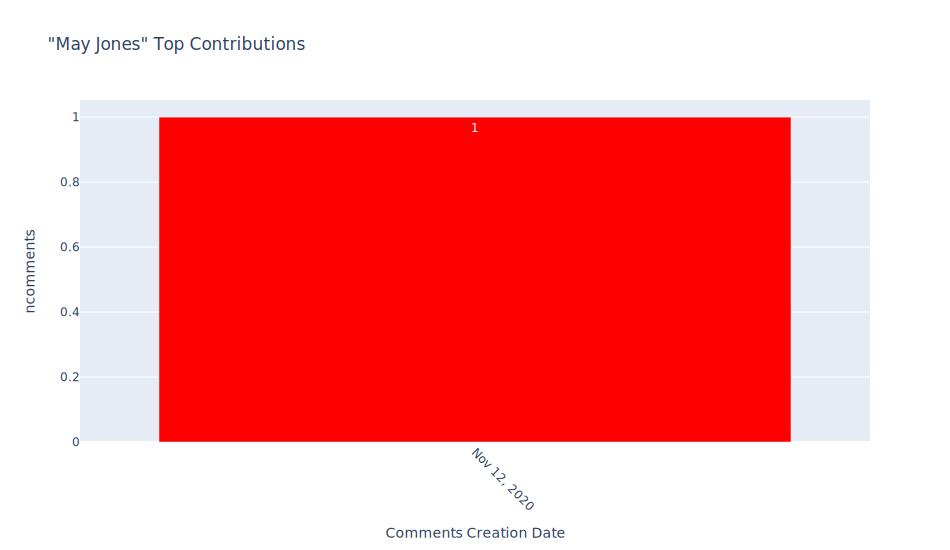

In [354]:
helpers.contr_peaks(df_comments, "May Jones", n=6, threshold=0)

In [355]:
df_comments[df_comments.username == 'May Jones'].text.value_counts().head(10)

say it with me kids: the abuser isn't determined by the gender    1
Name: text, dtype: int64

In [356]:
neg_users = neg_users | {"May Jones"}

In [357]:
# df_comments[df_comments.username == 'Funeral bug'].text.value_counts().head(10)

In [358]:
# df_comments[df_comments.username == 'Stranger In the Alps'].text.value_counts().head(10)

<a id='neg_users'></a>
>## Users with Negative Comments (All Contributions)
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users"><b>Users with Negative Comments</b></a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [359]:
neg_users_list = list(neg_users)

In [360]:
# filter the dataframe on the users commenting in a negative way
df_neg_users = df_comments.query(' username == @neg_users_list ')

In [361]:
df = df_neg_users.groupby('username').agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'})

print(df.shape)
df.sort_values('ncomments', ascending=False).head(15)

(228347, 4)


username  ncomments  nreplies   nlikes
85396            Johnny Depp      15986      16.0   2572.0
76537            JOHNNY DEPP       3921       0.0    726.0
163135          Stevie J Raw       3516     294.0   6242.0
99376         LaraCroftEyes1       3270      73.0   4445.0
117354        Michael Keaton       3148       0.0    556.0
146504            Rock Candy       2455     302.0   6078.0
103115          Lindsey Depp       2432     232.0   2626.0
145819           Rob's Rules       2023      60.0   2908.0
85481            Johnny depp       1885       0.0    124.0
23099          Binge Central       1762       0.0   2504.0
105120          Lorri Holder       1380     308.0   8743.0
43126              DarthN3ws       1166     317.0   5017.0
139216        PureSparkles22       1160    1369.0  32298.0
164231              Sunshine       1129     182.0   5241.0
127042  Nerdette's NewsStand       1024    1417.0   5474.0

### A Heat Map for the Negative Users Contributions 


Note: The Peaks on Feb, Dec 2020



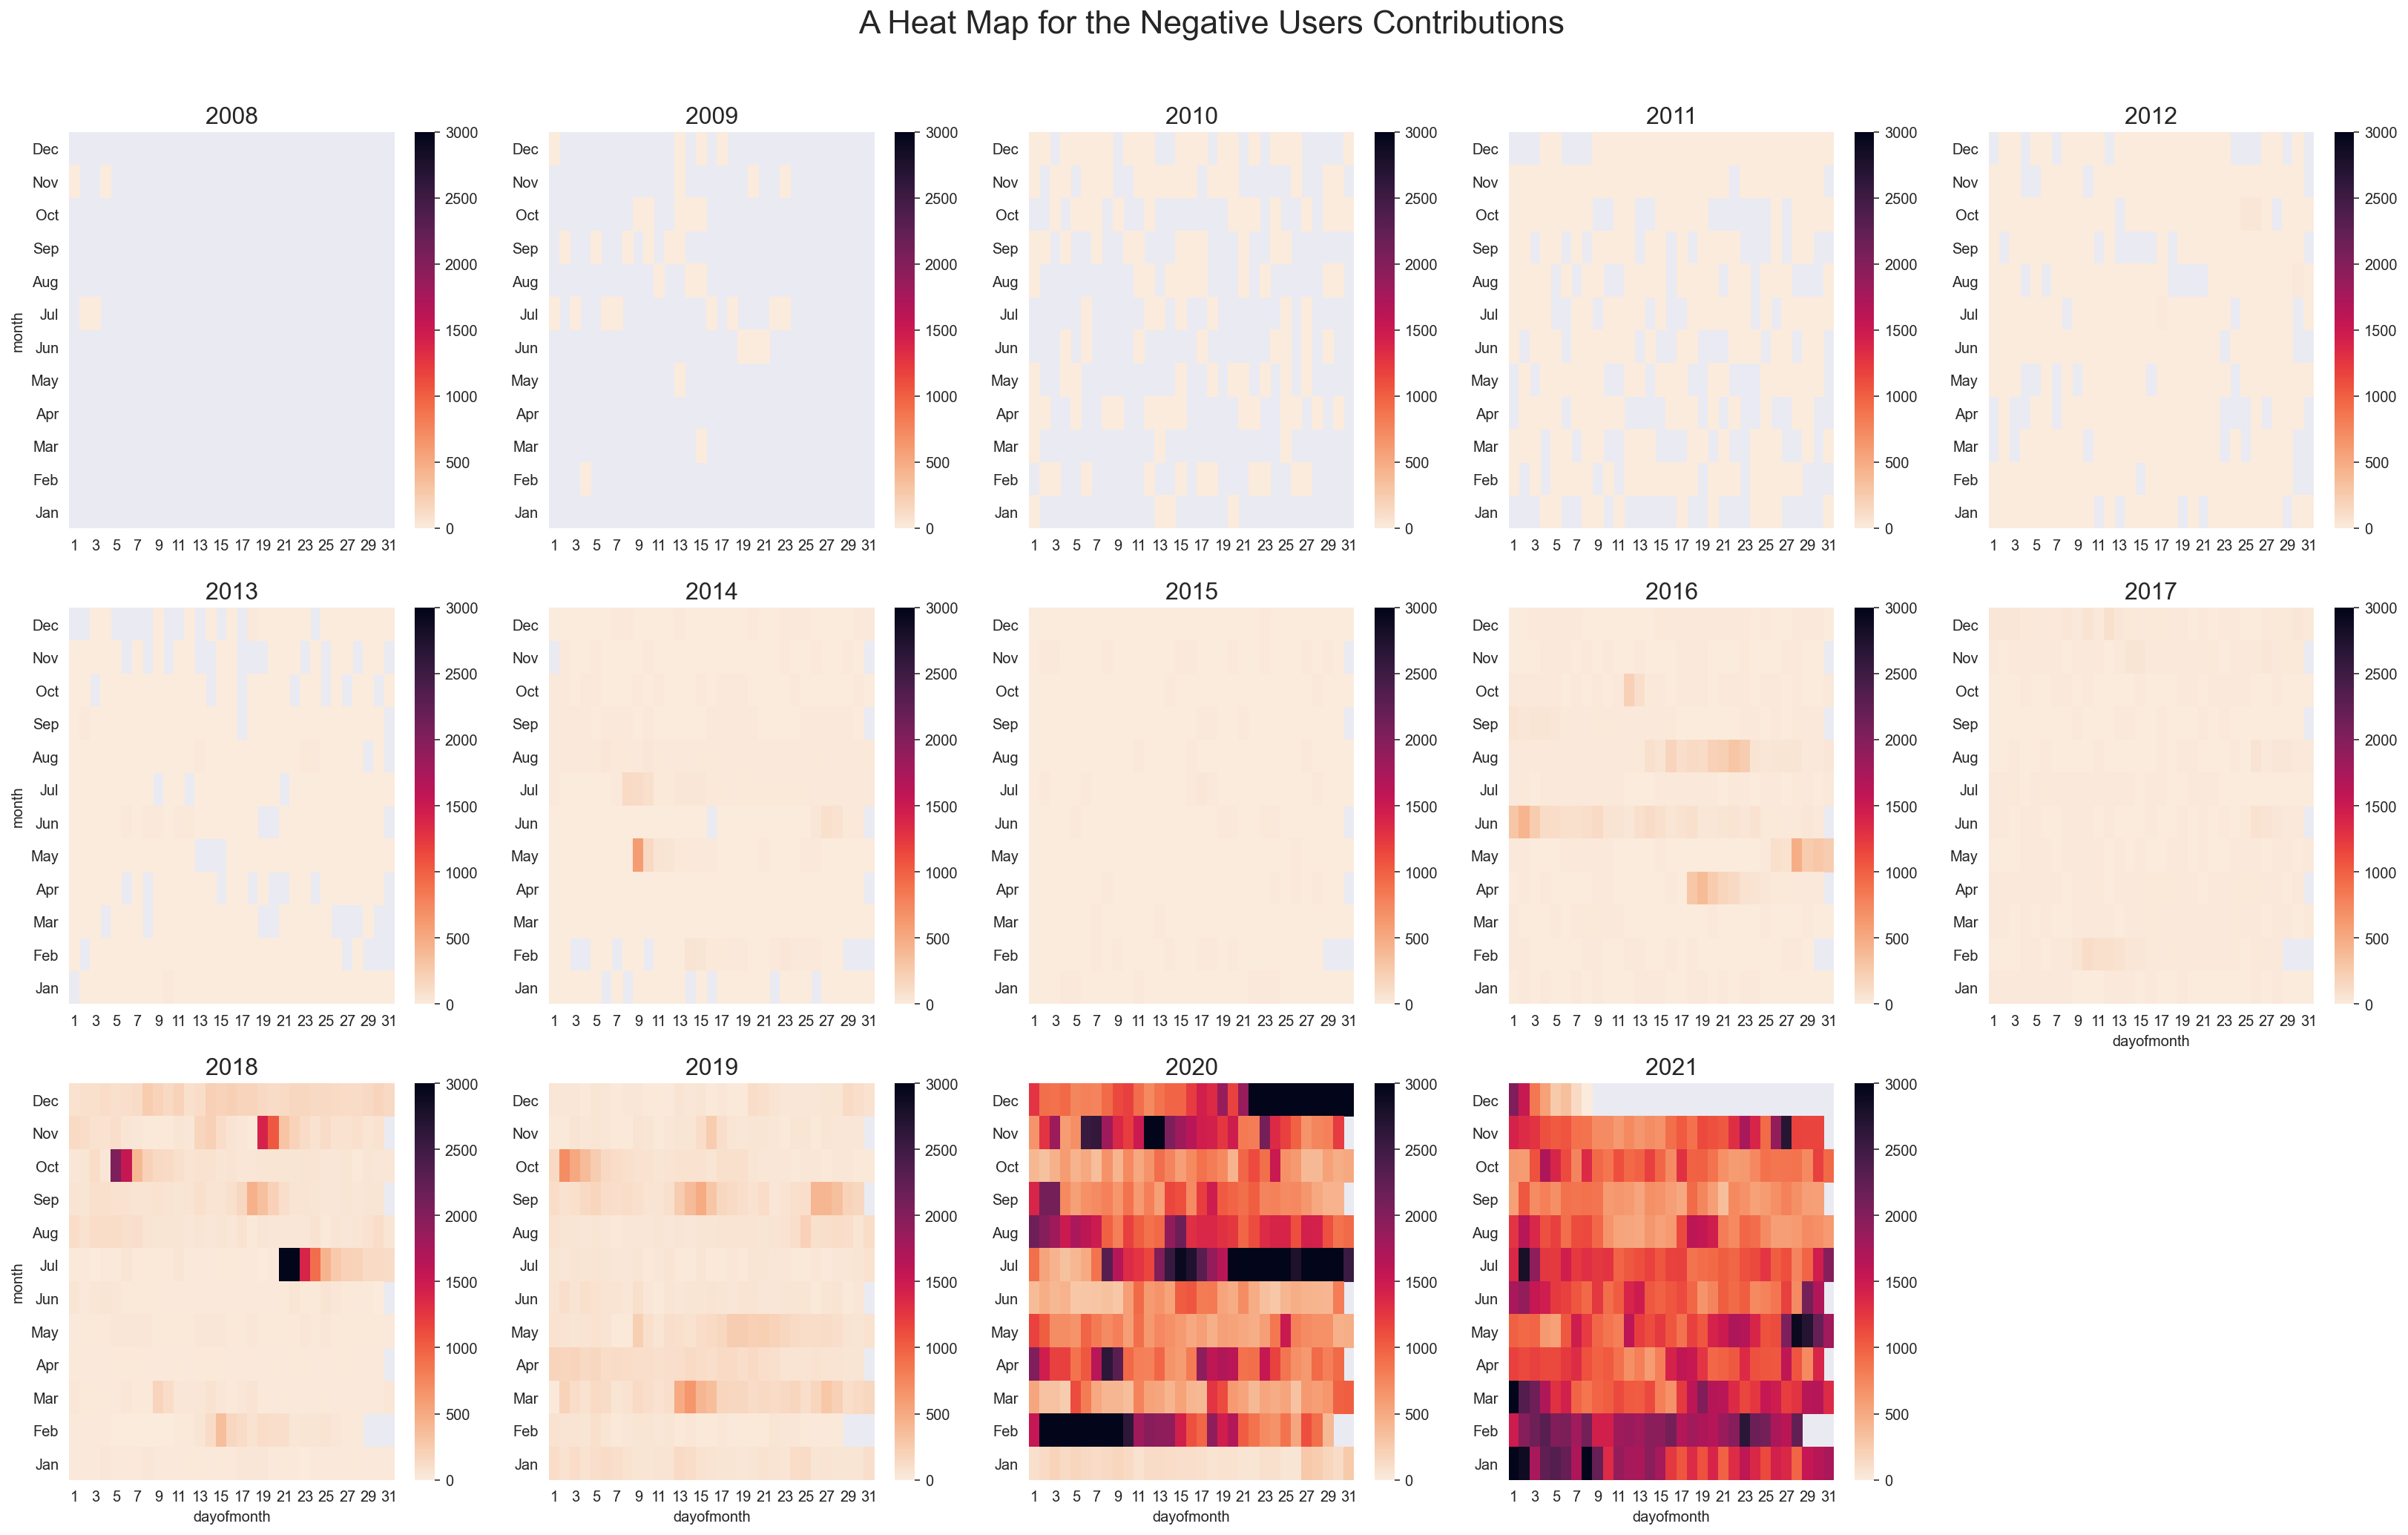

In [362]:
neg_users_daily = df_neg_users.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ncomments')

print('\nNote: The Peaks on Feb, Dec 2020\n')
title = 'A Heat Map for the Negative Users Contributions'
helpers.facet_heat(neg_users_daily, title, n_col=5, vmax=3000)

### Top Users with Negative Comments (All Contributions)

In [363]:
df_nneg_users = df_neg_users.groupby('username').agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'})

print(df_nneg_users.shape)
df_nneg_users = df_nneg_users.sort_values('ncomments', ascending=False)
df_nneg_users.head(15)

(228347, 4)


username  ncomments  nreplies   nlikes
85396            Johnny Depp      15986      16.0   2572.0
76537            JOHNNY DEPP       3921       0.0    726.0
163135          Stevie J Raw       3516     294.0   6242.0
99376         LaraCroftEyes1       3270      73.0   4445.0
117354        Michael Keaton       3148       0.0    556.0
146504            Rock Candy       2455     302.0   6078.0
103115          Lindsey Depp       2432     232.0   2626.0
145819           Rob's Rules       2023      60.0   2908.0
85481            Johnny depp       1885       0.0    124.0
23099          Binge Central       1762       0.0   2504.0
105120          Lorri Holder       1380     308.0   8743.0
43126              DarthN3ws       1166     317.0   5017.0
139216        PureSparkles22       1160    1369.0  32298.0
164231              Sunshine       1129     182.0   5241.0
127042  Nerdette's NewsStand       1024    1417.0   5474.0

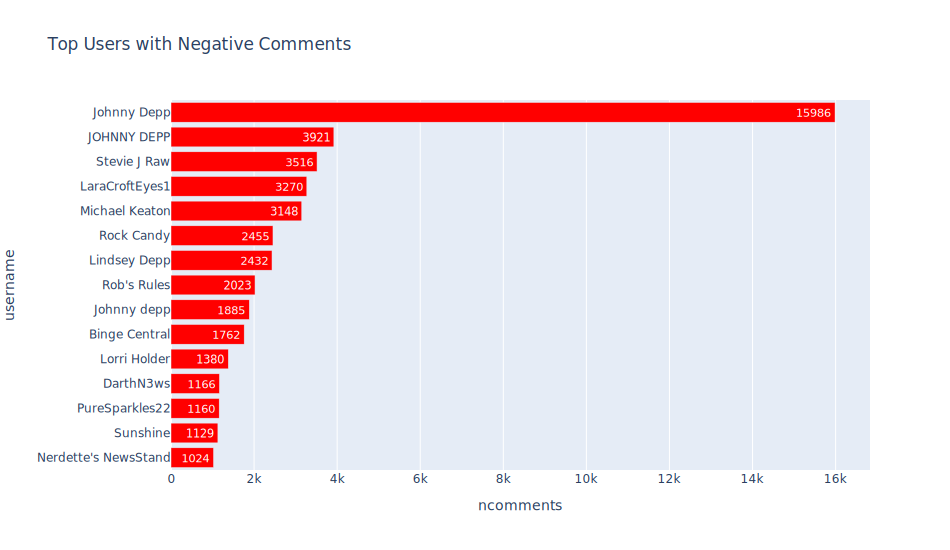

In [364]:
helpers.barh(df_nneg_users[['username', 'ncomments']].head(15), 'Top Users with Negative Comments', threshold=0)

### Negative Users Contributions on Each Date

In [365]:
df = df_neg_users.groupby(['date', 'username']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df.head(15)

date     username  ncomments  nlikes  nreplies
560870 2021-05-31  Johnny Depp        397    37.0       0.0
526957 2021-04-18  Johnny Depp        293    30.0       0.0
525281 2021-04-16  Johnny Depp        272    24.0       0.0
566952 2021-06-07  Johnny Depp        270    21.0       0.0
578552 2021-06-27  Johnny Depp        245    14.0       0.0
573529 2021-06-17  Johnny Depp        228     6.0       0.0
667405 2021-11-24  Johnny Depp        200    26.0       0.0
559777 2021-05-30  Johnny Depp        196    29.0       0.0
524725 2021-04-15  Johnny Depp        192    20.0       0.0
521059 2021-04-08  Johnny Depp        189    29.0       0.0
574057 2021-06-18  Johnny Depp        188     9.0       0.0
647298 2021-10-20  JOHNNY DEPP        185    33.0       0.0
613050 2021-08-14  Johnny Depp        185     7.0       0.0
655879 2021-11-04  JOHNNY DEPP        184    14.0       0.0
552305 2021-05-24  Johnny Depp        175    20.0       0.0

### Negative Users Comments Peak Dates

In [366]:
negative_users_dates = df_neg_users.groupby(['date']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

negative_users_dates.head(15)


date  ncomments    nlikes  nreplies
3569 2020-12-27      14273  185803.0    1117.0
3565 2020-12-23      12057  260685.0    2088.0
3568 2020-12-26      11034  172716.0     747.0
3566 2020-12-24      10714  246759.0    1438.0
3570 2020-12-28       9300  107477.0     932.0
3242 2020-02-04       8117  230962.0    5734.0
3571 2020-12-29       7818  104105.0    1163.0
3245 2020-02-07       6858  203291.0    5519.0
3572 2020-12-30       6353  109004.0    1007.0
3411 2020-07-22       6284  134947.0    3770.0
3246 2020-02-08       6214  173853.0    3282.0
3564 2020-12-22       5760  140640.0    1382.0
3567 2020-12-25       5683   98084.0     759.0
3243 2020-02-05       4837   97667.0    2971.0
3412 2020-07-23       4821  105511.0    3183.0

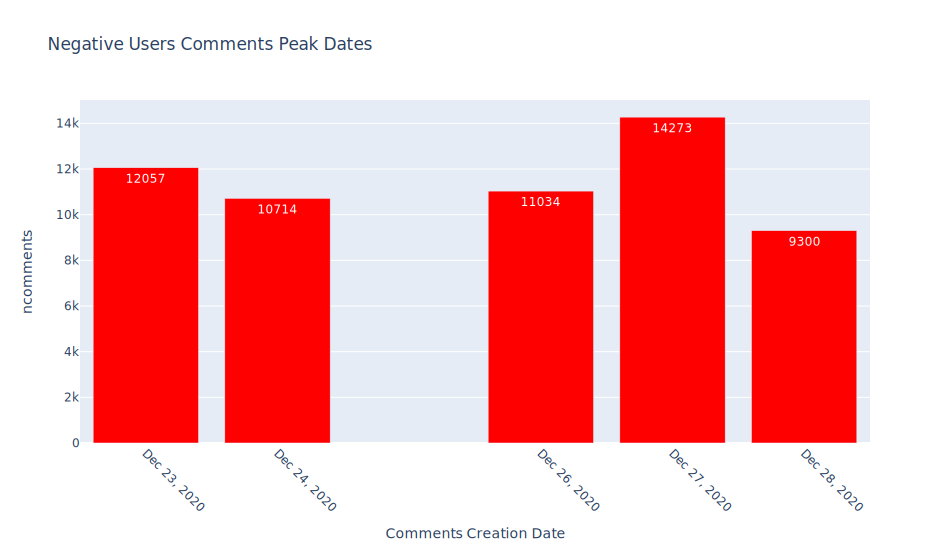

In [367]:
helpers.bar_peaks(negative_users_dates[['date', 'ncomments']].head(5), 
                  'Negative Users Comments Peak Dates', threshold=0)

<a id='top_comments'></a>
>## Most Repeated Comments
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments"><b>Most Repeated Comments</b></a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [368]:
df_comments.text.value_counts().head(30)

they won't believe you because you are a man she is not a victim                                                                                                                                                                                                                                                                                      43370
that's crazy                                                                                                                                                                                                                                                                                                                                           5968
#justiceforjohnnydepp                                                                                                                                                                                                                                                                                           

<a id='same'></a>
>## Same Text Same Date
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same"><b>Same Text Same Date</b></a></li>
 </ul>

In [369]:
df_comments.head(1)

video_id                 comment_etag            comment_id        text  \
0  DiXRVYRZchs  mvtTos5huTqXhtAs-JPzt7mls_A  UgjyORuX3p35VXgCoAEC  good work!   

        username              author_ch_id  nlikes                   p_dtime  \
0  Shocka Delica  UC6cJzw3ChENHVREKzpx1e3Q     9.0 2013-11-29 05:18:47+00:00   

                    u_dtime  nreplies moderation_status comment_reply  \
0 2013-11-29 05:18:47+00:00       1.0               NaN       comment   

  parent_id author_ch_url author_profile_image  year       date month  \
0      none          none                 none  2013 2013-11-29   Nov   

   dayofmonth  hour  
0          29     5

In [370]:
# print('\nThe Amplifications in the counts and number of likes on #justiceforjohnnydepp is quite obvious!!')
df_same = df_comments.groupby(["text", "date"]).agg({'comment_id':'count', 'nreplies':'sum', 'nlikes':'sum'}).reset_index()
df_same.rename(columns={'comment_id': 'ncomments'}, inplace=True) 
df_same.sort_values(["ncomments", 'date'], ascending=[False, True]).head(60)


text       date  \
1641232  they won't believe you because you are a man s... 2020-12-27   
1641231  they won't believe you because you are a man s... 2020-12-26   
1641233  they won't believe you because you are a man s... 2020-12-28   
1641228  they won't believe you because you are a man s... 2020-12-23   
1641229  they won't believe you because you are a man s... 2020-12-24   
1641234  they won't believe you because you are a man s... 2020-12-29   
1641235  they won't believe you because you are a man s... 2020-12-30   
1641230  they won't believe you because you are a man s... 2020-12-25   
1639882  they won't believe you because you are a man a... 2020-12-22   
1641236  they won't believe you because you are a man s... 2020-12-31   
1641237  they won't believe you because you are a man s... 2021-01-01   
1641238  they won't believe you because you are a man s... 2021-01-02   
1640216  they won't believe you because you are a man a... 2020-12-22   
1640217  they won't believe you because you are a man a... 2020-12-23   
1641239  they won't believe you because you are a man s... 2021-01-03   
1641240  they won't believe you because you are a man s... 2021-01-04   
1641241  they won't believe you because you are a man s... 2021-01-05   
1644678  they won't believe you because your a man she ... 2020-12-30   
1646192  they wont believe you because you are a man am... 2020-12-22   
1639508       they won't believe you because you are a man 2020-12-23   
1644677  they won't believe you because your a man she ... 2020-12-29   
1643059  they won't believe you because you are a man s... 2020-12-27   
1044277                                 justice for johnny 2020-12-22   
1552926                                       that's crazy 2021-03-03   
1643056  they won't believe you because you are a man s... 2020-12-24   
1641242  they won't believe you because you are a man s... 2021-01-06   
1639883  they won't believe you because you are a man a... 2020-12-23   
1646347  they wont believe you because you are a man sh... 2020-12-27   
520858                                    execute order 66 2020-12-22   
1643058  they won't believe you because you are a man s... 2020-12-26   
1646346  they wont believe you because you are a man sh... 2020-12-26   
1552916                                       that's crazy 2021-02-21   
1644583  they won't believe you because your a man ambe... 2020-12-22   
6951                                       #justicefordepp 2020-11-08   
1401859                                she is not a victim 2020-12-24   
1641243  they won't believe you because you are a man s... 2021-01-07   
1643055  they won't believe you because you are a man s... 2020-12-23   
1639507       they won't believe you because you are a man 2020-12-22   
1641244  they won't believe you because you are a man s... 2021-01-08   
578111                         good soldiers follow orders 2020-12-26   
1641249  they won't believe you because you are a man s... 2021-01-13   
7437                                     #justiceforjohnny 2020-12-22   
1642737  they won't believe you because you are a man s... 2020-12-27   
1044278                                 justice for johnny 2020-12-23   
1642736  they won't believe you because you are a man s... 2020-12-26   
1401858                                she is not a victim 2020-12-23   
1552928                                       that's crazy 2021-03-05   
1552933                                       that's crazy 2021-03-10   
1639509       they won't believe you because you are a man 2020-12-24   
1963694  your lies have been revealed to us you are not... 2021-01-01   
1552934                                       that's crazy 2021-03-11   
8456                                 #justiceforjohnnydepp 2020-12-24   
1876342                                                wow 2020-10-24   
1552927                                       that's crazy 2021-03-04   
7438                                   

<br>

### Check the NaNs in Usernames
The NaNs in username --> either means deleted or banned accounts

In [371]:
helpers.isnull(df_comments)

The number of NaNs in video_id: 0
The number of NaNs in comment_etag: 0
The number of NaNs in comment_id: 0
The number of NaNs in text: 0
The number of NaNs in username: 49
The number of NaNs in author_ch_id: 23
The number of NaNs in nlikes: 0
The number of NaNs in p_dtime: 0
The number of NaNs in u_dtime: 0
The number of NaNs in nreplies: 0
The number of NaNs in moderation_status: 2173771
The number of NaNs in comment_reply: 0
The number of NaNs in parent_id: 0
The number of NaNs in author_ch_url: 0
The number of NaNs in author_profile_image: 0
The number of NaNs in year: 0
The number of NaNs in date: 0
The number of NaNs in month: 0
The number of NaNs in dayofmonth: 0
The number of NaNs in hour: 0


In [372]:
df_comments[pd.isnull(df_comments.username)].head(60)

video_id                 comment_etag  \
6900     rB7ONnfIjaI  T5Sym8Qakf8hWNDKuPeFdG5Le00   
21725    Khwwml8xY_M  6V3P_cGTEeAgZUVR9EDr8-GRzXc   
34227    Yj6V_a1-EUA  D0EE6qUzbCSFYEQq-bFHggaNMps   
83652    Khwwml8xY_M  NKdXfJHh4B071resgmZGadwbN0U   
98756    N5gO_pciDDg  aiUUppeMkrevAdCAbV4Erp7JYQ4   
174831   Bz-TzGR9tP0  3voAEa8up7sH3L00sSghqHyoa-s   
174833   Bz-TzGR9tP0  9XWu8yHhnpkr4KR1xIZL37gW-q4   
178077   b9V3Pj47x4c  o78wGHUTzXfbxmIzORJUC6T3b3Q   
189131   WDkg3h8PCVU  wpuZenT3Kc9a_b7uiIHJOjGA9OU   
193153   WDkg3h8PCVU  psfskEv6cPlhKLI8K7EisTEdHZs   
208062   WDkg3h8PCVU  z85NnB1FGbP3MgXMryqlk15LRS0   
210314   WDkg3h8PCVU  JB9AAmp17Dqdvcz_aoUeSMsqVIA   
225019   WDkg3h8PCVU  v9oE2zX_mwFgmXHSyn1OTE-AX5I   
236098   WDkg3h8PCVU  HuRwkJ82kCBsU47O1fgy2S9haDE   
252847   Yj6V_a1-EUA  CNoYKwYHWktMLoD64SFoO9C_oro   
260602   2wcj6SrX4zw  9HVxw_d18NBMB5ikwKCQgEE36Mw   
262107   2wcj6SrX4zw  IlVCyF7U2QigqTNT8egSLQ4SzLI   
319775   SPQfyxpywps  -CkGc3iW7vNyEp3O231v9GKCS2Y   
342572   QzAnzrfsumY  1sLXJcToJWT02oqCeA4Updr0Prk   
428443   l_bsAVFnzOE  2J8pSaod5QH2F2NVLvqibdYSajk   
448035   JOP9nmzKDww  skb212ks-JYNe3qqjnnCzuDn2sw   
453481   4r8UJv97GjM  02NuZo444qVYJYvN6acZLXxYndA   
576589   TJK8q0N5kA4  aONvcGPfCMdZd8C8t5X1xhHNopE   
614324   5jOeRgb0hGo  pZBeMiMGbz13RBlYW1iW8dstVWU   
737521   uretrfMA-Io  Z5mNZU3Tgl0vjCO_yiA_DiwA2ZQ   
761349   6qEgXqmSwl8  7S-msd5hBZI7eCTSVCVeGhHxiQE   
785259   uC9qU3X1JgM  pJutJ-Fm4yQCfLylbMIcTuKUTUw   
857835   eYz4kjukJDc  XJs0555rtgWLpY8QNBQ3v2xMCGI   
871433   aca0KWoHtqQ  8wGegycg5kubpp6fZ0pboyaeOUc   
873333   aca0KWoHtqQ  WUCw3lAuDNbhTF9rtew0WacK5iQ   
873668   aca0KWoHtqQ  fpfqsn3Lelui1pZCKjwX6zP0tsg   
942552   uVfBxa57Kno  BCjk96rc_IDRS09AjysvVVudi2A   
1012255  pOHE1uyjCpQ  L0cSwu0S0ON0D9l9jY3LNSuGpgY   
1047973  pRItnG3P7-Q  s6dGHjVF48etAs9Lo0LTRt59Ewo   
1062419  oXx2TczveMI  N3uuUR8zO-Z5UNRTV5ixlZbrCgo   
1098506  vyUUHAdlsHs  0--ceKacFRQVr_2mWeiFwBR6lVE   
1295344  D_4FyvAVUvg  a8Y58fkbzwtKRRD5YdM4na0mKYU   
1456550  3SRwK0jf7UA  ScYpvhQ-D7bDE2FzDuE3yWMe3iQ   
1487830  o4Yzj-m_SBk  cciyHGcDDoNw0JD2O7fkLCywFkw   
1545153  5Ny1vJpYkgc  oX1sqqUhVkNl5olskrlRGa5CyPQ   
1571789  qmVG4In74us  8RuEZFX2P2BbawzpNPsodhH5sGA   
1571797  qmVG4In74us  hEG4mfV1nxzn_s33JmkDkn3ICVw   
1595038  kyFLRXSxgPw  RlxP2Z7oU8BE9nhP10iXjHHbC3c   
1626725  wT3RhIJZu4k  GstsOtq4iJ9sI4vzCz_0SX_2Ptc   
1628996  TgzXR1xX-qI  qowWpC9L2dkmGDRjoRFdtEWw-yg   
1656618  o-3UAYI2AFM  1c-3M090JUXSsCmS0L9Yj8suJg0   
1767104  SPQfyxpywps  vq3Jox3o4fO9oGplvchzesy3osM   
1809896  JOP9nmzKDww  C7Md6SMSQFZOOHSOF34diyPQ7j4   
2097869  oTLrAKo7bCc  J_FVmr45wSWgWDqhS80YL3aeSdQ   

                                                comment_id  \
6900                            UgwvRMnTy9QEqXKy0AZ4AaABAg   
21725                                 Ugjw3ibwcjfpgngCoAEC   
34227                                 UgjC56ujVvK3yngCoAEC   
83652                                 Ugit6l1WoEh2PHgCoAEC   
98756                                 Ugi2kXFHNlN0IXgCoAEC   
174831                          UgwjDOflopkfsqVK0qx4AaABAg   
174833                          UgwJwhrP3B4pQ3XyTiV4AaABAg   
178077                          UgwO02f14C36oG9MLgh4AaABAg   
189131                          UgyytpCTmOIxOpJaU114AaABAg   
193153                          Ugw9WXuGLPZE7WdJOB14AaABAg   
208062                          UgwkJWzB2H9e0xsQr6F4AaABAg   
210314                          UgwdCg6OUk8BYIYdfYt4AaABAg   
225019                          UgzC_BgbiwNQ9mxK2IJ4AaABAg   
236098                          UgwciViHu7X1-395Xp94AaABAg   
252847                          Ugxqt23PDnQJJn9cI0Z4AaABAg   
260602                          UgwhuRRCqzc9b8ZYyLl4AaABAg   
262107                          Ugwe6cqtiSlL285msrh4AaABAg   
319775                          UgyUewFeyOkDN8xbhbl4AaABAg   
342572                          Ugxt7UMRK8gtGiJZbKl4AaABAg   
428443                          UgxlZs-lx9UZ9VN-INp4AaABAg   
448035                          Ugy8uFWgAzURwCnFPmZ4AaABAg 

In [373]:
df_comments[pd.isnull(df_comments.username)].text.value_counts()

nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  2
american women are nearly lost                                                                                                                                                                                                                                                                                                                                                                                                                                                                        1
i love you guys im your 

<br>

In [374]:
# To Save the negative commented users in a dictionary pkl file
with open('negative_users.pkl', 'wb') as f:
    pickle.dump(neg_users, f)

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK

<br>